In [11]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import glob
import matplotlib.ticker as ticker
import pandas as pd

%matplotlib inline
# plt.style.use('seaborn-whitegrid')

months=['01-Janeiro','02-Fevereiro','03-Marco','04-Abril','05-Maio','06-Junho','07-Julho',
        '08-Agosto','09-Setembro','10-Outubro','11-Novembro','12-Dezembro']
pasta_desm='/home/andre/Desktop/Resultados_3/Saidas/Controle'
pasta_umida=pasta_desm+'/Umida'
# months_u=['01-Janeiro','02-Fevereiro','03-Marco','04-Abril','05-Maio','06-Junho','07-Julho']
months_u=['01-Janeiro','02-Fevereiro','03-Marco','04-Abril','05-Maio','06-Junho']
pasta_seca=pasta_desm+'/Seca'
# months_s=['09-Setembro','10-Outubro','11-Novembro']
months_s=['08-Agosto','09-Setembro','10-Outubro','11-Novembro']
# months_tra=['08-Agosto', '12-Dezembro']
months_tra=['07-Julho', '12-Dezembro']

UTCs=['11UTC','12UTC','13UTC','14UTC','15UTC','16UTC','17UTC','18UTC','19UTC','20UTC']
cols=['sat','wavelenght','site','season','year','julian','hhmmss','sza','vza','ref063',
      'ref390','temp','reff','phase','locnoon','tcw','thi']
sites=['PR','AT']

# Thresholds para SZA, temp e vis para o grupo DESM
lim_sza=75.0
lim_vis=0.30
lim_temp=284.15

# Numero de bins para os histogramas
# num_bin=40

# Cores para os três grupos:
cor = ['blue','g','red']

# Lista com os dados das horas:
horas_local=[7.75,8.75,9.75,10.75,11.75,12.75,13.75,14.75,15.75,16.75]

In [12]:
################################################ ANÁLISE POR ESTAÇÃO - EVOLUÇÃO TEMPORAL #################################
######################################################### ESTAÇÂO UMIDA ##################################################
# Pegando os dados de cada mês (todos os 4 Janeiros, 4 Fevereiros, etc) e em cada UTC:
# Obs: Todos os dados dos 4 anos para cada UTC juntos (UTC "quadrianual") -> 2012+2013+2014+2015
# Para site 1 e...
temp_U11_s0_um = pd.Series()
temp_U12_s0_um = pd.Series()
temp_U13_s0_um = pd.Series()
temp_U14_s0_um = pd.Series()
temp_U15_s0_um = pd.Series()
temp_U16_s0_um = pd.Series()
temp_U17_s0_um = pd.Series()
temp_U18_s0_um = pd.Series()
temp_U19_s0_um = pd.Series()
temp_U20_s0_um = pd.Series()
reff_U11_s0_um = pd.Series()
reff_U12_s0_um = pd.Series()
reff_U13_s0_um = pd.Series()
reff_U14_s0_um = pd.Series()
reff_U15_s0_um = pd.Series()
reff_U16_s0_um = pd.Series()
reff_U17_s0_um = pd.Series()
reff_U18_s0_um = pd.Series()
reff_U19_s0_um = pd.Series()
reff_U20_s0_um = pd.Series()
vis_U11_s0_um = pd.Series()
vis_U12_s0_um = pd.Series()
vis_U13_s0_um = pd.Series()
vis_U14_s0_um = pd.Series()
vis_U15_s0_um = pd.Series()
vis_U16_s0_um = pd.Series()
vis_U17_s0_um = pd.Series()
vis_U18_s0_um = pd.Series()
vis_U19_s0_um = pd.Series()
vis_U20_s0_um = pd.Series()
ir_U11_s0_um = pd.Series()
ir_U12_s0_um = pd.Series()
ir_U13_s0_um = pd.Series()
ir_U14_s0_um = pd.Series()
ir_U15_s0_um = pd.Series()
ir_U16_s0_um = pd.Series()
ir_U17_s0_um = pd.Series()
ir_U18_s0_um = pd.Series()
ir_U19_s0_um = pd.Series()
ir_U20_s0_um = pd.Series()
# ....site 2
temp_U11_s1_um = pd.Series()
temp_U12_s1_um = pd.Series()
temp_U13_s1_um = pd.Series()
temp_U14_s1_um = pd.Series()
temp_U15_s1_um = pd.Series()
temp_U16_s1_um = pd.Series()
temp_U17_s1_um = pd.Series()
temp_U18_s1_um = pd.Series()
temp_U19_s1_um = pd.Series()
temp_U20_s1_um = pd.Series()
reff_U11_s1_um = pd.Series()
reff_U12_s1_um = pd.Series()
reff_U13_s1_um = pd.Series()
reff_U14_s1_um = pd.Series()
reff_U15_s1_um = pd.Series()
reff_U16_s1_um = pd.Series()
reff_U17_s1_um = pd.Series()
reff_U18_s1_um = pd.Series()
reff_U19_s1_um = pd.Series()
reff_U20_s1_um = pd.Series()
vis_U11_s1_um = pd.Series()
vis_U12_s1_um = pd.Series()
vis_U13_s1_um = pd.Series()
vis_U14_s1_um = pd.Series()
vis_U15_s1_um = pd.Series()
vis_U16_s1_um = pd.Series()
vis_U17_s1_um = pd.Series()
vis_U18_s1_um = pd.Series()
vis_U19_s1_um = pd.Series()
vis_U20_s1_um = pd.Series()
ir_U11_s1_um = pd.Series()
ir_U12_s1_um = pd.Series()
ir_U13_s1_um = pd.Series()
ir_U14_s1_um = pd.Series()
ir_U15_s1_um = pd.Series()
ir_U16_s1_um = pd.Series()
ir_U17_s1_um = pd.Series()
ir_U18_s1_um = pd.Series()
ir_U19_s1_um = pd.Series()
ir_U20_s1_um = pd.Series()

for i in range(len(months_u)):
    print 'Umida: Acessando {}'.format(months_u[i])
    for j in range(len(UTCs)):
        print 'UTC {}:'.format(UTCs[j])
        caminho_u=sorted(glob.glob(pasta_umida+'/'+months_u[i]+'/'+UTCs[j]+'/*final.csv'))
        for file in caminho_u:
            dadosu = pd.read_csv(file, skiprows=1, sep=",", names=cols, na_values=["-9999"])
            bom_s0 = (dadosu.ref063<=1.0)&(dadosu.ref063>=lim_vis)&(dadosu.temp<=lim_temp)&(dadosu.site==str(sites[0]))&(dadosu.reff>0)&(dadosu.reff<=60)&(dadosu.sza<=lim_sza)
            bom_s1 = (dadosu.ref063<=1.0)&(dadosu.ref063>=lim_vis)&(dadosu.temp<=lim_temp)&(dadosu.site==str(sites[1]))&(dadosu.reff>0)&(dadosu.reff<=60)&(dadosu.sza<=lim_sza)
            te_s0 = (dadosu.temp[bom_s0])-273.15
            te_s1 = (dadosu.temp[bom_s1])-273.15
            ir_s0 = (dadosu.ref390[bom_s0])*100
            ir_s1 = (dadosu.ref390[bom_s1])*100
            vi_s0 = (dadosu.ref063[bom_s0])*100
            vi_s1 = (dadosu.ref063[bom_s1])*100
            rf_s0 = (dadosu.reff[bom_s0])
            rf_s1 = (dadosu.reff[bom_s1])
            print 'len(te_s0)={}'.format(len(te_s0))
            print 'len(te_s1)={}'.format(len(te_s1))
            if UTCs[j]==UTCs[0]:
                temp_U11_s0_um = temp_U11_s0_um.append(te_s0)
                temp_U11_s1_um = temp_U11_s1_um.append(te_s1)
                ir_U11_s0_um = ir_U11_s0_um.append(ir_s0)
                ir_U11_s1_um = ir_U11_s1_um.append(ir_s1)
                reff_U11_s0_um = reff_U11_s0_um.append(rf_s0)
                reff_U11_s1_um = reff_U11_s1_um.append(rf_s1)
                vis_U11_s0_um = vis_U11_s0_um.append(vi_s0)
                vis_U11_s1_um = vis_U11_s1_um.append(vi_s1)
            if UTCs[j]==UTCs[1]:
                temp_U12_s0_um = temp_U12_s0_um.append(te_s0)
                temp_U12_s1_um = temp_U12_s1_um.append(te_s1)
                ir_U12_s0_um = ir_U12_s0_um.append(ir_s0)
                ir_U12_s1_um = ir_U12_s1_um.append(ir_s1)
                reff_U12_s0_um = reff_U12_s0_um.append(rf_s0)
                reff_U12_s1_um = reff_U12_s1_um.append(rf_s1)
                vis_U12_s0_um = vis_U12_s0_um.append(vi_s0)
                vis_U12_s1_um = vis_U12_s1_um.append(vi_s1)
            if UTCs[j]==UTCs[2]:
                temp_U13_s0_um = temp_U13_s0_um.append(te_s0)
                temp_U13_s1_um = temp_U13_s1_um.append(te_s1)
                ir_U13_s0_um = ir_U13_s0_um.append(ir_s0)
                ir_U13_s1_um = ir_U13_s1_um.append(ir_s1)
                reff_U13_s0_um = reff_U13_s0_um.append(rf_s0)
                reff_U13_s1_um = reff_U13_s1_um.append(rf_s1)
                vis_U13_s0_um = vis_U13_s0_um.append(vi_s0)
                vis_U13_s1_um = vis_U13_s1_um.append(vi_s1)
            if UTCs[j]==UTCs[3]:
                temp_U14_s0_um = temp_U14_s0_um.append(te_s0)
                temp_U14_s1_um = temp_U14_s1_um.append(te_s1)
                ir_U14_s0_um = ir_U14_s0_um.append(ir_s0)
                ir_U14_s1_um = ir_U14_s1_um.append(ir_s1)
                reff_U14_s0_um = reff_U14_s0_um.append(rf_s0)
                reff_U14_s1_um = reff_U14_s1_um.append(rf_s1)
                vis_U14_s0_um = vis_U14_s0_um.append(vi_s0)
                vis_U14_s1_um = vis_U14_s1_um.append(vi_s1)      
            if UTCs[j]==UTCs[4]:
                temp_U15_s0_um = temp_U15_s0_um.append(te_s0)
                temp_U15_s1_um = temp_U15_s1_um.append(te_s1)
                ir_U15_s0_um = ir_U15_s0_um.append(ir_s0)
                ir_U15_s1_um = ir_U15_s1_um.append(ir_s1)
                reff_U15_s0_um = reff_U15_s0_um.append(rf_s0)
                reff_U15_s1_um = reff_U15_s1_um.append(rf_s1)
                vis_U15_s0_um = vis_U15_s0_um.append(vi_s0)
                vis_U15_s1_um = vis_U15_s1_um.append(vi_s1)
            if UTCs[j]==UTCs[5]:
                temp_U16_s0_um = temp_U16_s0_um.append(te_s0)
                temp_U16_s1_um = temp_U16_s1_um.append(te_s1)
                ir_U16_s0_um = ir_U16_s0_um.append(ir_s0)
                ir_U16_s1_um = ir_U16_s1_um.append(ir_s1)
                reff_U16_s0_um = reff_U16_s0_um.append(rf_s0)
                reff_U16_s1_um = reff_U16_s1_um.append(rf_s1)
                vis_U16_s0_um = vis_U16_s0_um.append(vi_s0)
                vis_U16_s1_um = vis_U16_s1_um.append(vi_s1)
            if UTCs[j]==UTCs[6]:
                temp_U17_s0_um = temp_U17_s0_um.append(te_s0)
                temp_U17_s1_um = temp_U17_s1_um.append(te_s1)
                ir_U17_s0_um = ir_U17_s0_um.append(ir_s0)
                ir_U17_s1_um = ir_U17_s1_um.append(ir_s1)
                reff_U17_s0_um = reff_U17_s0_um.append(rf_s0)
                reff_U17_s1_um = reff_U17_s1_um.append(rf_s1)
                vis_U17_s0_um = vis_U17_s0_um.append(vi_s0)
                vis_U17_s1_um = vis_U17_s1_um.append(vi_s1)
            if UTCs[j]==UTCs[7]:
                temp_U18_s0_um = temp_U18_s0_um.append(te_s0)
                temp_U18_s1_um = temp_U18_s1_um.append(te_s1)
                ir_U18_s0_um = ir_U18_s0_um.append(ir_s0)
                ir_U18_s1_um = ir_U18_s1_um.append(ir_s1)
                reff_U18_s0_um = reff_U18_s0_um.append(rf_s0)
                reff_U18_s1_um = reff_U18_s1_um.append(rf_s1)
                vis_U18_s0_um = vis_U18_s0_um.append(vi_s0)
                vis_U18_s1_um = vis_U18_s1_um.append(vi_s1)
            if UTCs[j]==UTCs[8]:
                temp_U19_s0_um = temp_U19_s0_um.append(te_s0)
                temp_U19_s1_um = temp_U19_s1_um.append(te_s1)
                ir_U19_s0_um = ir_U19_s0_um.append(ir_s0)
                ir_U19_s1_um = ir_U19_s1_um.append(ir_s1)
                reff_U19_s0_um = reff_U19_s0_um.append(rf_s0)
                reff_U19_s1_um = reff_U19_s1_um.append(rf_s1)
                vis_U19_s0_um = vis_U19_s0_um.append(vi_s0)
                vis_U19_s1_um = vis_U19_s1_um.append(vi_s1)
            if UTCs[j]==UTCs[9]:
                temp_U20_s0_um = temp_U20_s0_um.append(te_s0)
                temp_U20_s1_um = temp_U20_s1_um.append(te_s1)
                ir_U20_s0_um = ir_U20_s0_um.append(ir_s0)
                ir_U20_s1_um = ir_U20_s1_um.append(ir_s1)
                reff_U20_s0_um = reff_U20_s0_um.append(rf_s0)
                reff_U20_s1_um = reff_U20_s1_um.append(rf_s1)
                vis_U20_s0_um = vis_U20_s0_um.append(vi_s0)
                vis_U20_s1_um = vis_U20_s1_um.append(vi_s1)   
print 'Tamanho Total U11_s0_um={}'.format(len(temp_U11_s0_um))                
print 'Tamanho Total U12_s0_um={}'.format(len(temp_U12_s0_um))
print 'Tamanho Total U13_s0_um={}'.format(len(temp_U13_s0_um))
print 'Tamanho Total U14_s0_um={}'.format(len(temp_U14_s0_um))
print 'Tamanho Total U15_s0_um={}'.format(len(temp_U15_s0_um))
print 'Tamanho Total U16_s0_um={}'.format(len(temp_U16_s0_um))
print 'Tamanho Total U17_s0_um={}'.format(len(temp_U17_s0_um))
print 'Tamanho Total U18_s0_um={}'.format(len(temp_U18_s0_um))
print 'Tamanho Total U19_s0_um={}'.format(len(temp_U19_s0_um))
print 'Tamanho Total U20_s0_um={}'.format(len(temp_U20_s0_um))
print 'Tamanho Total U11_s1_um={}'.format(len(temp_U11_s1_um))
print 'Tamanho Total U12_s1_um={}'.format(len(temp_U12_s1_um))
print 'Tamanho Total U13_s1_um={}'.format(len(temp_U13_s1_um))
print 'Tamanho Total U14_s1_um={}'.format(len(temp_U14_s1_um))
print 'Tamanho Total U15_s1_um={}'.format(len(temp_U15_s1_um))
print 'Tamanho Total U16_s1_um={}'.format(len(temp_U16_s1_um))
print 'Tamanho Total U17_s1_um={}'.format(len(temp_U17_s1_um))
print 'Tamanho Total U18_s1_um={}'.format(len(temp_U18_s1_um))
print 'Tamanho Total U19_s1_um={}'.format(len(temp_U19_s1_um))
print 'Tamanho Total U20_s1_um={}'.format(len(temp_U20_s1_um))
print 'Finalizado!'

Umida: Acessando 01-Janeiro
UTC 11UTC:
len(te_s0)=77652
len(te_s1)=69887
UTC 12UTC:
len(te_s0)=83410
len(te_s1)=63925
UTC 13UTC:
len(te_s0)=73740
len(te_s1)=59035
UTC 14UTC:
len(te_s0)=80540
len(te_s1)=61543
UTC 15UTC:
len(te_s0)=70115
len(te_s1)=60990
UTC 16UTC:
len(te_s0)=66197
len(te_s1)=63002
UTC 17UTC:
len(te_s0)=63762
len(te_s1)=64312
UTC 18UTC:
len(te_s0)=64134
len(te_s1)=63663
UTC 19UTC:
len(te_s0)=66100
len(te_s1)=61567
UTC 20UTC:
len(te_s0)=65181
len(te_s1)=49533
Umida: Acessando 02-Fevereiro
UTC 11UTC:
len(te_s0)=4168
len(te_s1)=95426
UTC 12UTC:
len(te_s0)=81899
len(te_s1)=87419
UTC 13UTC:
len(te_s0)=74663
len(te_s1)=86039
UTC 14UTC:
len(te_s0)=76531
len(te_s1)=89408
UTC 15UTC:
len(te_s0)=73791
len(te_s1)=82756
UTC 16UTC:
len(te_s0)=70006
len(te_s1)=81599
UTC 17UTC:
len(te_s0)=66108
len(te_s1)=80330
UTC 18UTC:
len(te_s0)=65046
len(te_s1)=75930
UTC 19UTC:
len(te_s0)=66267
len(te_s1)=70911
UTC 20UTC:
len(te_s0)=67061
len(te_s1)=58011
Umida: Acessando 03-Marco
UTC 11UTC:
len(te

In [13]:
######################################################### ESTAÇÂO SECA ##################################################
# site 1 e...
temp_U11_s0_se = pd.Series()
temp_U12_s0_se = pd.Series()
temp_U13_s0_se = pd.Series()
temp_U14_s0_se = pd.Series()
temp_U15_s0_se = pd.Series()
temp_U16_s0_se = pd.Series()
temp_U17_s0_se = pd.Series()
temp_U18_s0_se = pd.Series()
temp_U19_s0_se = pd.Series()
temp_U20_s0_se = pd.Series()
reff_U11_s0_se = pd.Series()
reff_U12_s0_se = pd.Series()
reff_U13_s0_se = pd.Series()
reff_U14_s0_se = pd.Series()
reff_U15_s0_se = pd.Series()
reff_U16_s0_se = pd.Series()
reff_U17_s0_se = pd.Series()
reff_U18_s0_se = pd.Series()
reff_U19_s0_se = pd.Series()
reff_U20_s0_se = pd.Series()
vis_U11_s0_se = pd.Series()
vis_U12_s0_se = pd.Series()
vis_U13_s0_se = pd.Series()
vis_U14_s0_se = pd.Series()
vis_U15_s0_se = pd.Series()
vis_U16_s0_se = pd.Series()
vis_U17_s0_se = pd.Series()
vis_U18_s0_se = pd.Series()
vis_U19_s0_se = pd.Series()
vis_U20_s0_se = pd.Series()
ir_U11_s0_se = pd.Series()
ir_U12_s0_se = pd.Series()
ir_U13_s0_se = pd.Series()
ir_U14_s0_se = pd.Series()
ir_U15_s0_se = pd.Series()
ir_U16_s0_se = pd.Series()
ir_U17_s0_se = pd.Series()
ir_U18_s0_se = pd.Series()
ir_U19_s0_se = pd.Series()
ir_U20_s0_se = pd.Series()
# ....site 2
temp_U11_s1_se = pd.Series()
temp_U12_s1_se = pd.Series()
temp_U13_s1_se = pd.Series()
temp_U14_s1_se = pd.Series()
temp_U15_s1_se = pd.Series()
temp_U16_s1_se = pd.Series()
temp_U17_s1_se = pd.Series()
temp_U18_s1_se = pd.Series()
temp_U19_s1_se = pd.Series()
temp_U20_s1_se = pd.Series()
reff_U11_s1_se = pd.Series()
reff_U12_s1_se = pd.Series()
reff_U13_s1_se = pd.Series()
reff_U14_s1_se = pd.Series()
reff_U15_s1_se = pd.Series()
reff_U16_s1_se = pd.Series()
reff_U17_s1_se = pd.Series()
reff_U18_s1_se = pd.Series()
reff_U19_s1_se = pd.Series()
reff_U20_s1_se = pd.Series()
vis_U11_s1_se = pd.Series()
vis_U12_s1_se = pd.Series()
vis_U13_s1_se = pd.Series()
vis_U14_s1_se = pd.Series()
vis_U15_s1_se = pd.Series()
vis_U16_s1_se = pd.Series()
vis_U17_s1_se = pd.Series()
vis_U18_s1_se = pd.Series()
vis_U19_s1_se = pd.Series()
vis_U20_s1_se = pd.Series()
ir_U11_s1_se = pd.Series()
ir_U12_s1_se = pd.Series()
ir_U13_s1_se = pd.Series()
ir_U14_s1_se = pd.Series()
ir_U15_s1_se = pd.Series()
ir_U16_s1_se = pd.Series()
ir_U17_s1_se = pd.Series()
ir_U18_s1_se = pd.Series()
ir_U19_s1_se = pd.Series()
ir_U20_s1_se = pd.Series()

for i in range(len(months_s)):
    print 'Seca: Acessando {}'.format(months_s[i])
    for j in range(len(UTCs)):
        print 'UTC {}:'.format(UTCs[j])
        caminho_s=sorted(glob.glob(pasta_seca+'/'+months_s[i]+'/'+UTCs[j]+'/*final.csv'))
        for file in caminho_s:
            dadoss = pd.read_csv(file, skiprows=1, sep=",", names=cols, na_values=["-9999"])
            bom_s0s = (dadoss.ref063<=1.0)&(dadoss.ref063>=lim_vis)&(dadoss.temp<=lim_temp)&(dadoss.site==str(sites[0]))&(dadoss.reff>0)&(dadoss.reff<=60)&(dadoss.sza<=lim_sza)
            bom_s1s = (dadoss.ref063<=1.0)&(dadoss.ref063>=lim_vis)&(dadoss.temp<=lim_temp)&(dadoss.site==str(sites[1]))&(dadoss.reff>0)&(dadoss.reff<=60)&(dadoss.sza<=lim_sza) 
            te_s0s = (dadoss.temp[bom_s0s])-273.15
            te_s1s = (dadoss.temp[bom_s1s])-273.15
            ir_s0s = (dadoss.ref390[bom_s0s])*100
            ir_s1s = (dadoss.ref390[bom_s1s])*100
            vi_s0s = (dadoss.ref063[bom_s0s])*100
            vi_s1s = (dadoss.ref063[bom_s1s])*100
            rf_s0s = (dadoss.reff[bom_s0s])
            rf_s1s = (dadoss.reff[bom_s1s])
            print 'len(te_s0s)={}'.format(len(te_s0s))
            print 'len(te_s1s)={}'.format(len(te_s1s))
            if UTCs[j]==UTCs[0]:
                temp_U11_s0_se = temp_U11_s0_se.append(te_s0s)
                temp_U11_s1_se = temp_U11_s1_se.append(te_s1s)
                ir_U11_s0_se = ir_U11_s0_se.append(ir_s0s)
                ir_U11_s1_se = ir_U11_s1_se.append(ir_s1s)
                reff_U11_s0_se = reff_U11_s0_se.append(rf_s0s)
                reff_U11_s1_se = reff_U11_s1_se.append(rf_s1s)
                vis_U11_s0_se = vis_U11_s0_se.append(vi_s0s)
                vis_U11_s1_se = vis_U11_s1_se.append(vi_s1s)
            if UTCs[j]==UTCs[1]:
                temp_U12_s0_se = temp_U12_s0_se.append(te_s0s)
                temp_U12_s1_se = temp_U12_s1_se.append(te_s1s)
                ir_U12_s0_se = ir_U12_s0_se.append(ir_s0s)
                ir_U12_s1_se = ir_U12_s1_se.append(ir_s1s)
                reff_U12_s0_se = reff_U12_s0_se.append(rf_s0s)
                reff_U12_s1_se = reff_U12_s1_se.append(rf_s1s)
                vis_U12_s0_se = vis_U12_s0_se.append(vi_s0s)
                vis_U12_s1_se = vis_U12_s1_se.append(vi_s1s)
            if UTCs[j]==UTCs[2]:
                temp_U13_s0_se = temp_U13_s0_se.append(te_s0s)
                temp_U13_s1_se = temp_U13_s1_se.append(te_s1s)
                ir_U13_s0_se = ir_U13_s0_se.append(ir_s0s)
                ir_U13_s1_se = ir_U13_s1_se.append(ir_s1s)
                reff_U13_s0_se = reff_U13_s0_se.append(rf_s0s)
                reff_U13_s1_se = reff_U13_s1_se.append(rf_s1s)
                vis_U13_s0_se = vis_U13_s0_se.append(vi_s0s)
                vis_U13_s1_se = vis_U13_s1_se.append(vi_s1s)
            if UTCs[j]==UTCs[3]:
                temp_U14_s0_se = temp_U14_s0_se.append(te_s0s)
                temp_U14_s1_se = temp_U14_s1_se.append(te_s1s)
                ir_U14_s0_se = ir_U14_s0_se.append(ir_s0s)
                ir_U14_s1_se = ir_U14_s1_se.append(ir_s1s)
                reff_U14_s0_se = reff_U14_s0_se.append(rf_s0s)
                reff_U14_s1_se = reff_U14_s1_se.append(rf_s1s)
                vis_U14_s0_se = vis_U14_s0_se.append(vi_s0s)
                vis_U14_s1_se = vis_U14_s1_se.append(vi_s1s)      
            if UTCs[j]==UTCs[4]:
                temp_U15_s0_se = temp_U15_s0_se.append(te_s0s)
                temp_U15_s1_se = temp_U15_s1_se.append(te_s1s)
                ir_U15_s0_se = ir_U15_s0_se.append(ir_s0s)
                ir_U15_s1_se = ir_U15_s1_se.append(ir_s1s)
                reff_U15_s0_se = reff_U15_s0_se.append(rf_s0s)
                reff_U15_s1_se = reff_U15_s1_se.append(rf_s1s)
                vis_U15_s0_se = vis_U15_s0_se.append(vi_s0s)
                vis_U15_s1_se = vis_U15_s1_se.append(vi_s1s)
            if UTCs[j]==UTCs[5]:
                temp_U16_s0_se = temp_U16_s0_se.append(te_s0s)
                temp_U16_s1_se = temp_U16_s1_se.append(te_s1s)
                ir_U16_s0_se = ir_U16_s0_se.append(ir_s0s)
                ir_U16_s1_se = ir_U16_s1_se.append(ir_s1s)
                reff_U16_s0_se = reff_U16_s0_se.append(rf_s0s)
                reff_U16_s1_se = reff_U16_s1_se.append(rf_s1s)
                vis_U16_s0_se = vis_U16_s0_se.append(vi_s0s)
                vis_U16_s1_se = vis_U16_s1_se.append(vi_s1s)
            if UTCs[j]==UTCs[6]:
                temp_U17_s0_se = temp_U17_s0_se.append(te_s0s)
                temp_U17_s1_se = temp_U17_s1_se.append(te_s1s)
                ir_U17_s0_se = ir_U17_s0_se.append(ir_s0s)
                ir_U17_s1_se = ir_U17_s1_se.append(ir_s1s)
                reff_U17_s0_se = reff_U17_s0_se.append(rf_s0s)
                reff_U17_s1_se = reff_U17_s1_se.append(rf_s1s)
                vis_U17_s0_se = vis_U17_s0_se.append(vi_s0s)
                vis_U17_s1_se = vis_U17_s1_se.append(vi_s1s)
            if UTCs[j]==UTCs[7]:
                temp_U18_s0_se = temp_U18_s0_se.append(te_s0s)
                temp_U18_s1_se = temp_U18_s1_se.append(te_s1s)
                ir_U18_s0_se = ir_U18_s0_se.append(ir_s0s)
                ir_U18_s1_se = ir_U18_s1_se.append(ir_s1s)
                reff_U18_s0_se = reff_U18_s0_se.append(rf_s0s)
                reff_U18_s1_se = reff_U18_s1_se.append(rf_s1s)
                vis_U18_s0_se = vis_U18_s0_se.append(vi_s0s)
                vis_U18_s1_se = vis_U18_s1_se.append(vi_s1s)
            if UTCs[j]==UTCs[8]:
                temp_U19_s0_se = temp_U19_s0_se.append(te_s0s)
                temp_U19_s1_se = temp_U19_s1_se.append(te_s1s)
                ir_U19_s0_se = ir_U19_s0_se.append(ir_s0s)
                ir_U19_s1_se = ir_U19_s1_se.append(ir_s1s)
                reff_U19_s0_se = reff_U19_s0_se.append(rf_s0s)
                reff_U19_s1_se = reff_U19_s1_se.append(rf_s1s)
                vis_U19_s0_se = vis_U19_s0_se.append(vi_s0s)
                vis_U19_s1_se = vis_U19_s1_se.append(vi_s1s)
            if UTCs[j]==UTCs[9]:
                temp_U20_s0_se = temp_U20_s0_se.append(te_s0s)
                temp_U20_s1_se = temp_U20_s1_se.append(te_s1s)
                ir_U20_s0_se = ir_U20_s0_se.append(ir_s0s)
                ir_U20_s1_se = ir_U20_s1_se.append(ir_s1s)
                reff_U20_s0_se = reff_U20_s0_se.append(rf_s0s)
                reff_U20_s1_se = reff_U20_s1_se.append(rf_s1s)
                vis_U20_s0_se = vis_U20_s0_se.append(vi_s0s)
                vis_U20_s1_se = vis_U20_s1_se.append(vi_s1s)              
print 'Tamanho Total U11_s0_se={}'.format(len(temp_U11_s0_se))
print 'Tamanho Total U12_s0_se={}'.format(len(temp_U12_s0_se))
print 'Tamanho Total U13_s0_se={}'.format(len(temp_U13_s0_se))
print 'Tamanho Total U14_s0_se={}'.format(len(temp_U14_s0_se))
print 'Tamanho Total U15_s0_se={}'.format(len(temp_U15_s0_se))
print 'Tamanho Total U16_s0_se={}'.format(len(temp_U16_s0_se))
print 'Tamanho Total U17_s0_se={}'.format(len(temp_U17_s0_se))
print 'Tamanho Total U18_s0_se={}'.format(len(temp_U18_s0_se))
print 'Tamanho Total U19_s0_se={}'.format(len(temp_U19_s0_se))
print 'Tamanho Total U20_s0_se={}'.format(len(temp_U20_s0_se))
print 'Tamanho Total U11_s1_se={}'.format(len(temp_U11_s1_se))
print 'Tamanho Total U12_s1_se={}'.format(len(temp_U12_s1_se))
print 'Tamanho Total U13_s1_se={}'.format(len(temp_U13_s1_se))
print 'Tamanho Total U14_s1_se={}'.format(len(temp_U14_s1_se))
print 'Tamanho Total U15_s1_se={}'.format(len(temp_U15_s1_se))
print 'Tamanho Total U16_s1_se={}'.format(len(temp_U16_s1_se))
print 'Tamanho Total U17_s1_se={}'.format(len(temp_U17_s1_se))
print 'Tamanho Total U18_s1_se={}'.format(len(temp_U18_s1_se))
print 'Tamanho Total U19_s1_se={}'.format(len(temp_U19_s1_se))
print 'Tamanho Total U20_s1_se={}'.format(len(temp_U20_s1_se))
print 'Finalizado!'

Seca: Acessando 08-Agosto
UTC 11UTC:
len(te_s0s)=52342
len(te_s1s)=23111
UTC 12UTC:
len(te_s0s)=57855
len(te_s1s)=21451
UTC 13UTC:
len(te_s0s)=53609
len(te_s1s)=22389
UTC 14UTC:
len(te_s0s)=51902
len(te_s1s)=23556
UTC 15UTC:
len(te_s0s)=50467
len(te_s1s)=29007
UTC 16UTC:
len(te_s0s)=50734
len(te_s1s)=30995
UTC 17UTC:
len(te_s0s)=48978
len(te_s1s)=31377
UTC 18UTC:
len(te_s0s)=46468
len(te_s1s)=34348
UTC 19UTC:
len(te_s0s)=44588
len(te_s1s)=36583
UTC 20UTC:
len(te_s0s)=42744
len(te_s1s)=29315
Seca: Acessando 09-Setembro
UTC 11UTC:
len(te_s0s)=37708
len(te_s1s)=14142
UTC 12UTC:
len(te_s0s)=26942
len(te_s1s)=14017
UTC 13UTC:
len(te_s0s)=23366
len(te_s1s)=11669
UTC 14UTC:
len(te_s0s)=21409
len(te_s1s)=10864
UTC 15UTC:
len(te_s0s)=28901
len(te_s1s)=15044
UTC 16UTC:
len(te_s0s)=32483
len(te_s1s)=17783
UTC 17UTC:
len(te_s0s)=30379
len(te_s1s)=17270
UTC 18UTC:
len(te_s0s)=36996
len(te_s1s)=23690
UTC 19UTC:
len(te_s0s)=42091
len(te_s1s)=26746
UTC 20UTC:
len(te_s0s)=50741
len(te_s1s)=18011
Seca: 

In [14]:
######################################################### TRANSIÇÃO 1 ####################################################
# site 1 e...
temp_U11_s0_t1 = pd.Series()
temp_U12_s0_t1 = pd.Series()
temp_U13_s0_t1 = pd.Series()
temp_U14_s0_t1 = pd.Series()
temp_U15_s0_t1 = pd.Series()
temp_U16_s0_t1 = pd.Series()
temp_U17_s0_t1 = pd.Series()
temp_U18_s0_t1 = pd.Series()
temp_U19_s0_t1 = pd.Series()
temp_U20_s0_t1 = pd.Series()
reff_U11_s0_t1 = pd.Series()
reff_U12_s0_t1 = pd.Series()
reff_U13_s0_t1 = pd.Series()
reff_U14_s0_t1 = pd.Series()
reff_U15_s0_t1 = pd.Series()
reff_U16_s0_t1 = pd.Series()
reff_U17_s0_t1 = pd.Series()
reff_U18_s0_t1 = pd.Series()
reff_U19_s0_t1 = pd.Series()
reff_U20_s0_t1 = pd.Series()
vis_U11_s0_t1 = pd.Series()
vis_U12_s0_t1 = pd.Series()
vis_U13_s0_t1 = pd.Series()
vis_U14_s0_t1 = pd.Series()
vis_U15_s0_t1 = pd.Series()
vis_U16_s0_t1 = pd.Series()
vis_U17_s0_t1 = pd.Series()
vis_U18_s0_t1 = pd.Series()
vis_U19_s0_t1 = pd.Series()
vis_U20_s0_t1 = pd.Series()
ir_U11_s0_t1 = pd.Series()
ir_U12_s0_t1 = pd.Series()
ir_U13_s0_t1 = pd.Series()
ir_U14_s0_t1 = pd.Series()
ir_U15_s0_t1 = pd.Series()
ir_U16_s0_t1 = pd.Series()
ir_U17_s0_t1 = pd.Series()
ir_U18_s0_t1 = pd.Series()
ir_U19_s0_t1 = pd.Series()
ir_U20_s0_t1 = pd.Series()
# ....site 2
temp_U11_s1_t1 = pd.Series()
temp_U12_s1_t1 = pd.Series()
temp_U13_s1_t1 = pd.Series()
temp_U14_s1_t1 = pd.Series()
temp_U15_s1_t1 = pd.Series()
temp_U16_s1_t1 = pd.Series()
temp_U17_s1_t1 = pd.Series()
temp_U18_s1_t1 = pd.Series()
temp_U19_s1_t1 = pd.Series()
temp_U20_s1_t1 = pd.Series()
reff_U11_s1_t1 = pd.Series()
reff_U12_s1_t1 = pd.Series()
reff_U13_s1_t1 = pd.Series()
reff_U14_s1_t1 = pd.Series()
reff_U15_s1_t1 = pd.Series()
reff_U16_s1_t1 = pd.Series()
reff_U17_s1_t1 = pd.Series()
reff_U18_s1_t1 = pd.Series()
reff_U19_s1_t1 = pd.Series()
reff_U20_s1_t1 = pd.Series()
vis_U11_s1_t1 = pd.Series()
vis_U12_s1_t1 = pd.Series()
vis_U13_s1_t1 = pd.Series()
vis_U14_s1_t1 = pd.Series()
vis_U15_s1_t1 = pd.Series()
vis_U16_s1_t1 = pd.Series()
vis_U17_s1_t1 = pd.Series()
vis_U18_s1_t1 = pd.Series()
vis_U19_s1_t1 = pd.Series()
vis_U20_s1_t1 = pd.Series()
ir_U11_s1_t1 = pd.Series()
ir_U12_s1_t1 = pd.Series()
ir_U13_s1_t1 = pd.Series()
ir_U14_s1_t1 = pd.Series()
ir_U15_s1_t1 = pd.Series()
ir_U16_s1_t1 = pd.Series()
ir_U17_s1_t1 = pd.Series()
ir_U18_s1_t1 = pd.Series()
ir_U19_s1_t1 = pd.Series()
ir_U20_s1_t1 = pd.Series()

for j in range(len(UTCs)):
    print 'UTC {}:'.format(UTCs[j])
    caminho_s=sorted(glob.glob(pasta_desm+'/'+months_tra[0]+'/'+UTCs[j]+'/*final.csv'))
    for file in caminho_s:
        dados_t1 = pd.read_csv(file, skiprows=1, sep=",", names=cols, na_values=["-9999"])
        bom_s0_t1 = (dados_t1.ref063<=1.0)&(dados_t1.ref063>=lim_vis)&(dados_t1.temp<=lim_temp)&(dados_t1.site==str(sites[0]))&(dados_t1.reff>0)&(dados_t1.reff<=60)&(dados_t1.sza<=lim_sza)
        bom_s1_t1 = (dados_t1.ref063<=1.0)&(dados_t1.ref063>=lim_vis)&(dados_t1.temp<=lim_temp)&(dados_t1.site==str(sites[1]))&(dados_t1.reff>0)&(dados_t1.reff<=60)&(dados_t1.sza<=lim_sza)       
        te_s0_t1 = (dados_t1.temp[bom_s0_t1])-273.15
        te_s1_t1 = (dados_t1.temp[bom_s1_t1])-273.15
        ir_s0_t1 = (dados_t1.ref390[bom_s0_t1])*100
        ir_s1_t1 = (dados_t1.ref390[bom_s1_t1])*100
        vi_s0_t1 = (dados_t1.ref063[bom_s0_t1])*100
        vi_s1_t1 = (dados_t1.ref063[bom_s1_t1])*100
        rf_s0_t1 = (dados_t1.reff[bom_s0_t1])
        rf_s1_t1 = (dados_t1.reff[bom_s1_t1])
        print 'len(te_s0_t1)={}'.format(len(te_s0_t1))
        print 'len(te_s1_t1)={}'.format(len(te_s1_t1))
        if UTCs[j]==UTCs[0]:
            temp_U11_s0_t1 = temp_U11_s0_t1.append(te_s0_t1)
            temp_U11_s1_t1 = temp_U11_s1_t1.append(te_s1_t1)
            ir_U11_s0_t1 = ir_U11_s0_t1.append(ir_s0_t1)
            ir_U11_s1_t1 = ir_U11_s1_t1.append(ir_s1_t1)
            reff_U11_s0_t1 = reff_U11_s0_t1.append(rf_s0_t1)
            reff_U11_s1_t1 = reff_U11_s1_t1.append(rf_s1_t1)
            vis_U11_s0_t1 = vis_U11_s0_t1.append(vi_s0_t1)
            vis_U11_s1_t1 = vis_U11_s1_t1.append(vi_s1_t1)
        if UTCs[j]==UTCs[1]:
            temp_U12_s0_t1 = temp_U12_s0_t1.append(te_s0_t1)
            temp_U12_s1_t1 = temp_U12_s1_t1.append(te_s1_t1)
            ir_U12_s0_t1 = ir_U12_s0_t1.append(ir_s0_t1)
            ir_U12_s1_t1 = ir_U12_s1_t1.append(ir_s1_t1)
            reff_U12_s0_t1 = reff_U12_s0_t1.append(rf_s0_t1)
            reff_U12_s1_t1 = reff_U12_s1_t1.append(rf_s1_t1)
            vis_U12_s0_t1 = vis_U12_s0_t1.append(vi_s0_t1)
            vis_U12_s1_t1 = vis_U12_s1_t1.append(vi_s1_t1)
        if UTCs[j]==UTCs[2]:
            temp_U13_s0_t1 = temp_U13_s0_t1.append(te_s0_t1)
            temp_U13_s1_t1 = temp_U13_s1_t1.append(te_s1_t1)
            ir_U13_s0_t1 = ir_U13_s0_t1.append(ir_s0_t1)
            ir_U13_s1_t1 = ir_U13_s1_t1.append(ir_s1_t1)
            reff_U13_s0_t1 = reff_U13_s0_t1.append(rf_s0_t1)
            reff_U13_s1_t1 = reff_U13_s1_t1.append(rf_s1_t1)
            vis_U13_s0_t1 = vis_U13_s0_t1.append(vi_s0_t1)
            vis_U13_s1_t1 = vis_U13_s1_t1.append(vi_s1_t1)
        if UTCs[j]==UTCs[3]:
            temp_U14_s0_t1 = temp_U14_s0_t1.append(te_s0_t1)
            temp_U14_s1_t1 = temp_U14_s1_t1.append(te_s1_t1)
            ir_U14_s0_t1 = ir_U14_s0_t1.append(ir_s0_t1)
            ir_U14_s1_t1 = ir_U14_s1_t1.append(ir_s1_t1)
            reff_U14_s0_t1 = reff_U14_s0_t1.append(rf_s0_t1)
            reff_U14_s1_t1 = reff_U14_s1_t1.append(rf_s1_t1)
            vis_U14_s0_t1 = vis_U14_s0_t1.append(vi_s0_t1)
            vis_U14_s1_t1 = vis_U14_s1_t1.append(vi_s1_t1)
        if UTCs[j]==UTCs[4]:
            temp_U15_s0_t1 = temp_U15_s0_t1.append(te_s0_t1)
            temp_U15_s1_t1 = temp_U15_s1_t1.append(te_s1_t1)
            ir_U15_s0_t1 = ir_U15_s0_t1.append(ir_s0_t1)
            ir_U15_s1_t1 = ir_U15_s1_t1.append(ir_s1_t1)
            reff_U15_s0_t1 = reff_U15_s0_t1.append(rf_s0_t1)
            reff_U15_s1_t1 = reff_U15_s1_t1.append(rf_s1_t1)
            vis_U15_s0_t1 = vis_U15_s0_t1.append(vi_s0_t1)
            vis_U15_s1_t1 = vis_U15_s1_t1.append(vi_s1_t1)
        if UTCs[j]==UTCs[5]:
            temp_U16_s0_t1 = temp_U16_s0_t1.append(te_s0_t1)
            temp_U16_s1_t1 = temp_U16_s1_t1.append(te_s1_t1)
            ir_U16_s0_t1 = ir_U16_s0_t1.append(ir_s0_t1)
            ir_U16_s1_t1 = ir_U16_s1_t1.append(ir_s1_t1)
            reff_U16_s0_t1 = reff_U16_s0_t1.append(rf_s0_t1)
            reff_U16_s1_t1 = reff_U16_s1_t1.append(rf_s1_t1)
            vis_U16_s0_t1 = vis_U16_s0_t1.append(vi_s0_t1)
            vis_U16_s1_t1 = vis_U16_s1_t1.append(vi_s1_t1)
        if UTCs[j]==UTCs[6]:
            temp_U17_s0_t1 = temp_U17_s0_t1.append(te_s0_t1)
            temp_U17_s1_t1 = temp_U17_s1_t1.append(te_s1_t1)
            ir_U17_s0_t1 = ir_U17_s0_t1.append(ir_s0_t1)
            ir_U17_s1_t1 = ir_U17_s1_t1.append(ir_s1_t1)
            reff_U17_s0_t1 = reff_U17_s0_t1.append(rf_s0_t1)
            reff_U17_s1_t1 = reff_U17_s1_t1.append(rf_s1_t1)
            vis_U17_s0_t1 = vis_U17_s0_t1.append(vi_s0_t1)
            vis_U17_s1_t1 = vis_U17_s1_t1.append(vi_s1_t1)
        if UTCs[j]==UTCs[7]:
            temp_U18_s0_t1 = temp_U18_s0_t1.append(te_s0_t1)
            temp_U18_s1_t1 = temp_U18_s1_t1.append(te_s1_t1)
            ir_U18_s0_t1 = ir_U18_s0_t1.append(ir_s0_t1)
            ir_U18_s1_t1 = ir_U18_s1_t1.append(ir_s1_t1)
            reff_U18_s0_t1 = reff_U18_s0_t1.append(rf_s0_t1)
            reff_U18_s1_t1 = reff_U18_s1_t1.append(rf_s1_t1)
            vis_U18_s0_t1 = vis_U18_s0_t1.append(vi_s0_t1)
            vis_U18_s1_t1 = vis_U18_s1_t1.append(vi_s1_t1)
        if UTCs[j]==UTCs[8]:
            temp_U19_s0_t1 = temp_U19_s0_t1.append(te_s0_t1)
            temp_U19_s1_t1 = temp_U19_s1_t1.append(te_s1_t1)
            ir_U19_s0_t1 = ir_U19_s0_t1.append(ir_s0_t1)
            ir_U19_s1_t1 = ir_U19_s1_t1.append(ir_s1_t1)
            reff_U19_s0_t1 = reff_U19_s0_t1.append(rf_s0_t1)
            reff_U19_s1_t1 = reff_U19_s1_t1.append(rf_s1_t1)
            vis_U19_s0_t1 = vis_U19_s0_t1.append(vi_s0_t1)
            vis_U19_s1_t1 = vis_U19_s1_t1.append(vi_s1_t1)
        if UTCs[j]==UTCs[9]:
            temp_U20_s0_t1 = temp_U20_s0_t1.append(te_s0_t1)
            temp_U20_s1_t1 = temp_U20_s1_t1.append(te_s1_t1)
            ir_U20_s0_t1 = ir_U20_s0_t1.append(ir_s0_t1)
            ir_U20_s1_t1 = ir_U20_s1_t1.append(ir_s1_t1)
            reff_U20_s0_t1 = reff_U20_s0_t1.append(rf_s0_t1)
            reff_U20_s1_t1 = reff_U20_s1_t1.append(rf_s1_t1)
            vis_U20_s0_t1 = vis_U20_s0_t1.append(vi_s0_t1)
            vis_U20_s1_t1 = vis_U20_s1_t1.append(vi_s1_t1)     
print u'Transição 1 - Finalizado {}'.format(months_tra[0])                
print 'Tamanho Total U11_s0_t1={}'.format(len(temp_U11_s0_t1))
print 'Tamanho Total U12_s0_t1={}'.format(len(temp_U12_s0_t1))
print 'Tamanho Total U13_s0_t1={}'.format(len(temp_U13_s0_t1))
print 'Tamanho Total U14_s0_t1={}'.format(len(temp_U14_s0_t1))
print 'Tamanho Total U15_s0_t1={}'.format(len(temp_U15_s0_t1))
print 'Tamanho Total U16_s0_t1={}'.format(len(temp_U16_s0_t1))
print 'Tamanho Total U17_s0_t1={}'.format(len(temp_U17_s0_t1))
print 'Tamanho Total U18_s0_t1={}'.format(len(temp_U18_s0_t1))
print 'Tamanho Total U19_s0_t1={}'.format(len(temp_U19_s0_t1))
print 'Tamanho Total U20_s0_t1={}'.format(len(temp_U20_s0_t1))
print 'Tamanho Total U11_s1_t1={}'.format(len(temp_U11_s1_t1))
print 'Tamanho Total U12_s1_t1={}'.format(len(temp_U12_s1_t1))
print 'Tamanho Total U13_s1_t1={}'.format(len(temp_U13_s1_t1))
print 'Tamanho Total U14_s1_t1={}'.format(len(temp_U14_s1_t1))
print 'Tamanho Total U15_s1_t1={}'.format(len(temp_U15_s1_t1))
print 'Tamanho Total U16_s1_t1={}'.format(len(temp_U16_s1_t1))
print 'Tamanho Total U17_s1_t1={}'.format(len(temp_U17_s1_t1))
print 'Tamanho Total U18_s1_t1={}'.format(len(temp_U18_s1_t1))
print 'Tamanho Total U19_s1_t1={}'.format(len(temp_U19_s1_t1))
print 'Tamanho Total U20_s1_t1={}'.format(len(temp_U20_s1_t1))
print 'Finalizado!'

UTC 11UTC:
len(te_s0_t1)=35293
len(te_s1_t1)=28976
UTC 12UTC:
len(te_s0_t1)=58774
len(te_s1_t1)=22876
UTC 13UTC:
len(te_s0_t1)=55929
len(te_s1_t1)=23096
UTC 14UTC:
len(te_s0_t1)=59653
len(te_s1_t1)=24937
UTC 15UTC:
len(te_s0_t1)=58725
len(te_s1_t1)=30125
UTC 16UTC:
len(te_s0_t1)=49043
len(te_s1_t1)=40487
UTC 17UTC:
len(te_s0_t1)=46673
len(te_s1_t1)=37624
UTC 18UTC:
len(te_s0_t1)=49150
len(te_s1_t1)=48749
UTC 19UTC:
len(te_s0_t1)=48579
len(te_s1_t1)=50098
UTC 20UTC:
len(te_s0_t1)=42889
len(te_s1_t1)=35322
Transição 1 - Finalizado 07-Julho
Tamanho Total U11_s0_t1=35293
Tamanho Total U12_s0_t1=58774
Tamanho Total U13_s0_t1=55929
Tamanho Total U14_s0_t1=59653
Tamanho Total U15_s0_t1=58725
Tamanho Total U16_s0_t1=49043
Tamanho Total U17_s0_t1=46673
Tamanho Total U18_s0_t1=49150
Tamanho Total U19_s0_t1=48579
Tamanho Total U20_s0_t1=42889
Tamanho Total U11_s1_t1=28976
Tamanho Total U12_s1_t1=22876
Tamanho Total U13_s1_t1=23096
Tamanho Total U14_s1_t1=24937
Tamanho Total U15_s1_t1=30125
Tamanh

In [15]:
######################################################### TRANSIÇÃO 2 ####################################################
# site 1 e...
temp_U11_s0_t2 = pd.Series()
temp_U12_s0_t2 = pd.Series()
temp_U13_s0_t2 = pd.Series()
temp_U14_s0_t2 = pd.Series()
temp_U15_s0_t2 = pd.Series()
temp_U16_s0_t2 = pd.Series()
temp_U17_s0_t2 = pd.Series()
temp_U18_s0_t2 = pd.Series()
temp_U19_s0_t2 = pd.Series()
temp_U20_s0_t2 = pd.Series()
reff_U11_s0_t2 = pd.Series()
reff_U12_s0_t2 = pd.Series()
reff_U13_s0_t2 = pd.Series()
reff_U14_s0_t2 = pd.Series()
reff_U15_s0_t2 = pd.Series()
reff_U16_s0_t2 = pd.Series()
reff_U17_s0_t2 = pd.Series()
reff_U18_s0_t2 = pd.Series()
reff_U19_s0_t2 = pd.Series()
reff_U20_s0_t2 = pd.Series()
vis_U11_s0_t2 = pd.Series()
vis_U12_s0_t2 = pd.Series()
vis_U13_s0_t2 = pd.Series()
vis_U14_s0_t2 = pd.Series()
vis_U15_s0_t2 = pd.Series()
vis_U16_s0_t2 = pd.Series()
vis_U17_s0_t2 = pd.Series()
vis_U18_s0_t2 = pd.Series()
vis_U19_s0_t2 = pd.Series()
vis_U20_s0_t2 = pd.Series()
ir_U11_s0_t2 = pd.Series()
ir_U12_s0_t2 = pd.Series()
ir_U13_s0_t2 = pd.Series()
ir_U14_s0_t2 = pd.Series()
ir_U15_s0_t2 = pd.Series()
ir_U16_s0_t2 = pd.Series()
ir_U17_s0_t2 = pd.Series()
ir_U18_s0_t2 = pd.Series()
ir_U19_s0_t2 = pd.Series()
ir_U20_s0_t2 = pd.Series()
# ....site 2
temp_U11_s1_t2 = pd.Series()
temp_U12_s1_t2 = pd.Series()
temp_U13_s1_t2 = pd.Series()
temp_U14_s1_t2 = pd.Series()
temp_U15_s1_t2 = pd.Series()
temp_U16_s1_t2 = pd.Series()
temp_U17_s1_t2 = pd.Series()
temp_U18_s1_t2 = pd.Series()
temp_U19_s1_t2 = pd.Series()
temp_U20_s1_t2 = pd.Series()
reff_U11_s1_t2 = pd.Series()
reff_U12_s1_t2 = pd.Series()
reff_U13_s1_t2 = pd.Series()
reff_U14_s1_t2 = pd.Series()
reff_U15_s1_t2 = pd.Series()
reff_U16_s1_t2 = pd.Series()
reff_U17_s1_t2 = pd.Series()
reff_U18_s1_t2 = pd.Series()
reff_U19_s1_t2 = pd.Series()
reff_U20_s1_t2 = pd.Series()
vis_U11_s1_t2 = pd.Series()
vis_U12_s1_t2 = pd.Series()
vis_U13_s1_t2 = pd.Series()
vis_U14_s1_t2 = pd.Series()
vis_U15_s1_t2 = pd.Series()
vis_U16_s1_t2 = pd.Series()
vis_U17_s1_t2 = pd.Series()
vis_U18_s1_t2 = pd.Series()
vis_U19_s1_t2 = pd.Series()
vis_U20_s1_t2 = pd.Series()
ir_U11_s1_t2 = pd.Series()
ir_U12_s1_t2 = pd.Series()
ir_U13_s1_t2 = pd.Series()
ir_U14_s1_t2 = pd.Series()
ir_U15_s1_t2 = pd.Series()
ir_U16_s1_t2 = pd.Series()
ir_U17_s1_t2 = pd.Series()
ir_U18_s1_t2 = pd.Series()
ir_U19_s1_t2 = pd.Series()
ir_U20_s1_t2 = pd.Series()

for j in range(len(UTCs)):
    print 'UTC {}:'.format(UTCs[j])
    caminho_s=sorted(glob.glob(pasta_desm+'/'+months_tra[1]+'/'+UTCs[j]+'/*final.csv'))
    for file in caminho_s:
        dados_t2 = pd.read_csv(file, skiprows=1, sep=",", names=cols, na_values=["-9999"])
        bom_s0_t2 = (dados_t2.ref063<=1.0)&(dados_t2.ref063>=lim_vis)&(dados_t2.temp<=lim_temp)&(dados_t2.site==str(sites[0]))&(dados_t2.reff>0)&(dados_t2.reff<=60)&(dados_t2.sza<=lim_sza)
        bom_s1_t2 = (dados_t2.ref063<=1.0)&(dados_t2.ref063>=lim_vis)&(dados_t2.temp<=lim_temp)&(dados_t2.site==str(sites[1]))&(dados_t2.reff>0)&(dados_t2.reff<=60)&(dados_t2.sza<=lim_sza)
        te_s0_t2 = (dados_t2.temp[bom_s0_t2])-273.15
        te_s1_t2 = (dados_t2.temp[bom_s1_t2])-273.15
        ir_s0_t2 = (dados_t2.ref390[bom_s0_t2])*100
        ir_s1_t2 = (dados_t2.ref390[bom_s1_t2])*100
        vi_s0_t2 = (dados_t2.ref063[bom_s0_t2])*100
        vi_s1_t2 = (dados_t2.ref063[bom_s1_t2])*100
        rf_s0_t2 = (dados_t2.reff[bom_s0_t2])
        rf_s1_t2 = (dados_t2.reff[bom_s1_t2])
        print 'len(te_s0_t2)={}'.format(len(te_s0_t2))
        print 'len(te_s1_t2)={}'.format(len(te_s1_t2))
        if UTCs[j]==UTCs[0]:
            temp_U11_s0_t2 = temp_U11_s0_t2.append(te_s0_t2)
            temp_U11_s1_t2 = temp_U11_s1_t2.append(te_s1_t2)
            ir_U11_s0_t2 = ir_U11_s0_t2.append(ir_s0_t2)
            ir_U11_s1_t2 = ir_U11_s1_t2.append(ir_s1_t2)
            reff_U11_s0_t2 = reff_U11_s0_t2.append(rf_s0_t2)
            reff_U11_s1_t2 = reff_U11_s1_t2.append(rf_s1_t2)
            vis_U11_s0_t2 = vis_U11_s0_t2.append(vi_s0_t2)
            vis_U11_s1_t2 = vis_U11_s1_t2.append(vi_s1_t2)
        if UTCs[j]==UTCs[1]:
            temp_U12_s0_t2 = temp_U12_s0_t2.append(te_s0_t2)
            temp_U12_s1_t2 = temp_U12_s1_t2.append(te_s1_t2)
            ir_U12_s0_t2 = ir_U12_s0_t2.append(ir_s0_t2)
            ir_U12_s1_t2 = ir_U12_s1_t2.append(ir_s1_t2)
            reff_U12_s0_t2 = reff_U12_s0_t2.append(rf_s0_t2)
            reff_U12_s1_t2 = reff_U12_s1_t2.append(rf_s1_t2)
            vis_U12_s0_t2 = vis_U12_s0_t2.append(vi_s0_t2)
            vis_U12_s1_t2 = vis_U12_s1_t2.append(vi_s1_t2)
        if UTCs[j]==UTCs[2]:
            temp_U13_s0_t2 = temp_U13_s0_t2.append(te_s0_t2)
            temp_U13_s1_t2 = temp_U13_s1_t2.append(te_s1_t2)
            ir_U13_s0_t2 = ir_U13_s0_t2.append(ir_s0_t2)
            ir_U13_s1_t2 = ir_U13_s1_t2.append(ir_s1_t2)
            reff_U13_s0_t2 = reff_U13_s0_t2.append(rf_s0_t2)
            reff_U13_s1_t2 = reff_U13_s1_t2.append(rf_s1_t2)
            vis_U13_s0_t2 = vis_U13_s0_t2.append(vi_s0_t2)
            vis_U13_s1_t2 = vis_U13_s1_t2.append(vi_s1_t2)
        if UTCs[j]==UTCs[3]:
            temp_U14_s0_t2 = temp_U14_s0_t2.append(te_s0_t2)
            temp_U14_s1_t2 = temp_U14_s1_t2.append(te_s1_t2)
            ir_U14_s0_t2 = ir_U14_s0_t2.append(ir_s0_t2)
            ir_U14_s1_t2 = ir_U14_s1_t2.append(ir_s1_t2)
            reff_U14_s0_t2 = reff_U14_s0_t2.append(rf_s0_t2)
            reff_U14_s1_t2 = reff_U14_s1_t2.append(rf_s1_t2)
            vis_U14_s0_t2 = vis_U14_s0_t2.append(vi_s0_t2)
            vis_U14_s1_t2 = vis_U14_s1_t2.append(vi_s1_t2)
        if UTCs[j]==UTCs[4]:
            temp_U15_s0_t2 = temp_U15_s0_t2.append(te_s0_t2)
            temp_U15_s1_t2 = temp_U15_s1_t2.append(te_s1_t2)
            ir_U15_s0_t2 = ir_U15_s0_t2.append(ir_s0_t2)
            ir_U15_s1_t2 = ir_U15_s1_t2.append(ir_s1_t2)
            reff_U15_s0_t2 = reff_U15_s0_t2.append(rf_s0_t2)
            reff_U15_s1_t2 = reff_U15_s1_t2.append(rf_s1_t2)
            vis_U15_s0_t2 = vis_U15_s0_t2.append(vi_s0_t2)
            vis_U15_s1_t2 = vis_U15_s1_t2.append(vi_s1_t2)
        if UTCs[j]==UTCs[5]:
            temp_U16_s0_t2 = temp_U16_s0_t2.append(te_s0_t2)
            temp_U16_s1_t2 = temp_U16_s1_t2.append(te_s1_t2)
            ir_U16_s0_t2 = ir_U16_s0_t2.append(ir_s0_t2)
            ir_U16_s1_t2 = ir_U16_s1_t2.append(ir_s1_t2)
            reff_U16_s0_t2 = reff_U16_s0_t2.append(rf_s0_t2)
            reff_U16_s1_t2 = reff_U16_s1_t2.append(rf_s1_t2)
            vis_U16_s0_t2 = vis_U16_s0_t2.append(vi_s0_t2)
            vis_U16_s1_t2 = vis_U16_s1_t2.append(vi_s1_t2)
        if UTCs[j]==UTCs[6]:
            temp_U17_s0_t2 = temp_U17_s0_t2.append(te_s0_t2)
            temp_U17_s1_t2 = temp_U17_s1_t2.append(te_s1_t2)
            ir_U17_s0_t2 = ir_U17_s0_t2.append(ir_s0_t2)
            ir_U17_s1_t2 = ir_U17_s1_t2.append(ir_s1_t2)
            reff_U17_s0_t2 = reff_U17_s0_t2.append(rf_s0_t2)
            reff_U17_s1_t2 = reff_U17_s1_t2.append(rf_s1_t2)
            vis_U17_s0_t2 = vis_U17_s0_t2.append(vi_s0_t2)
            vis_U17_s1_t2 = vis_U17_s1_t2.append(vi_s1_t2)
        if UTCs[j]==UTCs[7]:
            temp_U18_s0_t2 = temp_U18_s0_t2.append(te_s0_t2)
            temp_U18_s1_t2 = temp_U18_s1_t2.append(te_s1_t2)
            ir_U18_s0_t2 = ir_U18_s0_t2.append(ir_s0_t2)
            ir_U18_s1_t2 = ir_U18_s1_t2.append(ir_s1_t2)
            reff_U18_s0_t2 = reff_U18_s0_t2.append(rf_s0_t2)
            reff_U18_s1_t2 = reff_U18_s1_t2.append(rf_s1_t2)
            vis_U18_s0_t2 = vis_U18_s0_t2.append(vi_s0_t2)
            vis_U18_s1_t2 = vis_U18_s1_t2.append(vi_s1_t2)
        if UTCs[j]==UTCs[8]:
            temp_U19_s0_t2 = temp_U19_s0_t2.append(te_s0_t2)
            temp_U19_s1_t2 = temp_U19_s1_t2.append(te_s1_t2)
            ir_U19_s0_t2 = ir_U19_s0_t2.append(ir_s0_t2)
            ir_U19_s1_t2 = ir_U19_s1_t2.append(ir_s1_t2)
            reff_U19_s0_t2 = reff_U19_s0_t2.append(rf_s0_t2)
            reff_U19_s1_t2 = reff_U19_s1_t2.append(rf_s1_t2)
            vis_U19_s0_t2 = vis_U19_s0_t2.append(vi_s0_t2)
            vis_U19_s1_t2 = vis_U19_s1_t2.append(vi_s1_t2)
        if UTCs[j]==UTCs[9]:
            temp_U20_s0_t2 = temp_U20_s0_t2.append(te_s0_t2)
            temp_U20_s1_t2 = temp_U20_s1_t2.append(te_s1_t2)
            ir_U20_s0_t2 = ir_U20_s0_t2.append(ir_s0_t2)
            ir_U20_s1_t2 = ir_U20_s1_t2.append(ir_s1_t2)
            reff_U20_s0_t2 = reff_U20_s0_t2.append(rf_s0_t2)
            reff_U20_s1_t2 = reff_U20_s1_t2.append(rf_s1_t2)
            vis_U20_s0_t2 = vis_U20_s0_t2.append(vi_s0_t2)
            vis_U20_s1_t2 = vis_U20_s1_t2.append(vi_s1_t2)            
print u'Transição 1 - Finalizado {}'.format(months_tra[1])                
print 'Tamanho Total U11_s0_t2={}'.format(len(temp_U11_s0_t2))
print 'Tamanho Total U12_s0_t2={}'.format(len(temp_U12_s0_t2))
print 'Tamanho Total U13_s0_t2={}'.format(len(temp_U13_s0_t2))
print 'Tamanho Total U14_s0_t2={}'.format(len(temp_U14_s0_t2))
print 'Tamanho Total U15_s0_t2={}'.format(len(temp_U15_s0_t2))
print 'Tamanho Total U16_s0_t2={}'.format(len(temp_U16_s0_t2))
print 'Tamanho Total U17_s0_t2={}'.format(len(temp_U17_s0_t2))
print 'Tamanho Total U18_s0_t2={}'.format(len(temp_U18_s0_t2))
print 'Tamanho Total U19_s0_t2={}'.format(len(temp_U19_s0_t2))
print 'Tamanho Total U20_s0_t2={}'.format(len(temp_U20_s0_t2))
print 'Tamanho Total U11_s1_t2={}'.format(len(temp_U11_s1_t2))
print 'Tamanho Total U12_s1_t2={}'.format(len(temp_U12_s1_t2))
print 'Tamanho Total U13_s1_t2={}'.format(len(temp_U13_s1_t2))
print 'Tamanho Total U14_s1_t2={}'.format(len(temp_U14_s1_t2))
print 'Tamanho Total U15_s1_t2={}'.format(len(temp_U15_s1_t2))
print 'Tamanho Total U16_s1_t2={}'.format(len(temp_U16_s1_t2))
print 'Tamanho Total U17_s1_t2={}'.format(len(temp_U17_s1_t2))
print 'Tamanho Total U18_s1_t2={}'.format(len(temp_U18_s1_t2))
print 'Tamanho Total U19_s1_t2={}'.format(len(temp_U19_s1_t2))
print 'Tamanho Total U20_s1_t2={}'.format(len(temp_U20_s1_t2))
print 'Finalizado!'

UTC 11UTC:
len(te_s0_t2)=56418
len(te_s1_t2)=56236
UTC 12UTC:
len(te_s0_t2)=54229
len(te_s1_t2)=49132
UTC 13UTC:
len(te_s0_t2)=47739
len(te_s1_t2)=43545
UTC 14UTC:
len(te_s0_t2)=47043
len(te_s1_t2)=44264
UTC 15UTC:
len(te_s0_t2)=46986
len(te_s1_t2)=43253
UTC 16UTC:
len(te_s0_t2)=48400
len(te_s1_t2)=44425
UTC 17UTC:
len(te_s0_t2)=48785
len(te_s1_t2)=49075
UTC 18UTC:
len(te_s0_t2)=52864
len(te_s1_t2)=44013
UTC 19UTC:
len(te_s0_t2)=53991
len(te_s1_t2)=44292
UTC 20UTC:
len(te_s0_t2)=55805
len(te_s1_t2)=32186
Transição 1 - Finalizado 12-Dezembro
Tamanho Total U11_s0_t2=56418
Tamanho Total U12_s0_t2=54229
Tamanho Total U13_s0_t2=47739
Tamanho Total U14_s0_t2=47043
Tamanho Total U15_s0_t2=46986
Tamanho Total U16_s0_t2=48400
Tamanho Total U17_s0_t2=48785
Tamanho Total U18_s0_t2=52864
Tamanho Total U19_s0_t2=53991
Tamanho Total U20_s0_t2=55805
Tamanho Total U11_s1_t2=56236
Tamanho Total U12_s1_t2=49132
Tamanho Total U13_s1_t2=43545
Tamanho Total U14_s1_t2=44264
Tamanho Total U15_s1_t2=43253
Tam

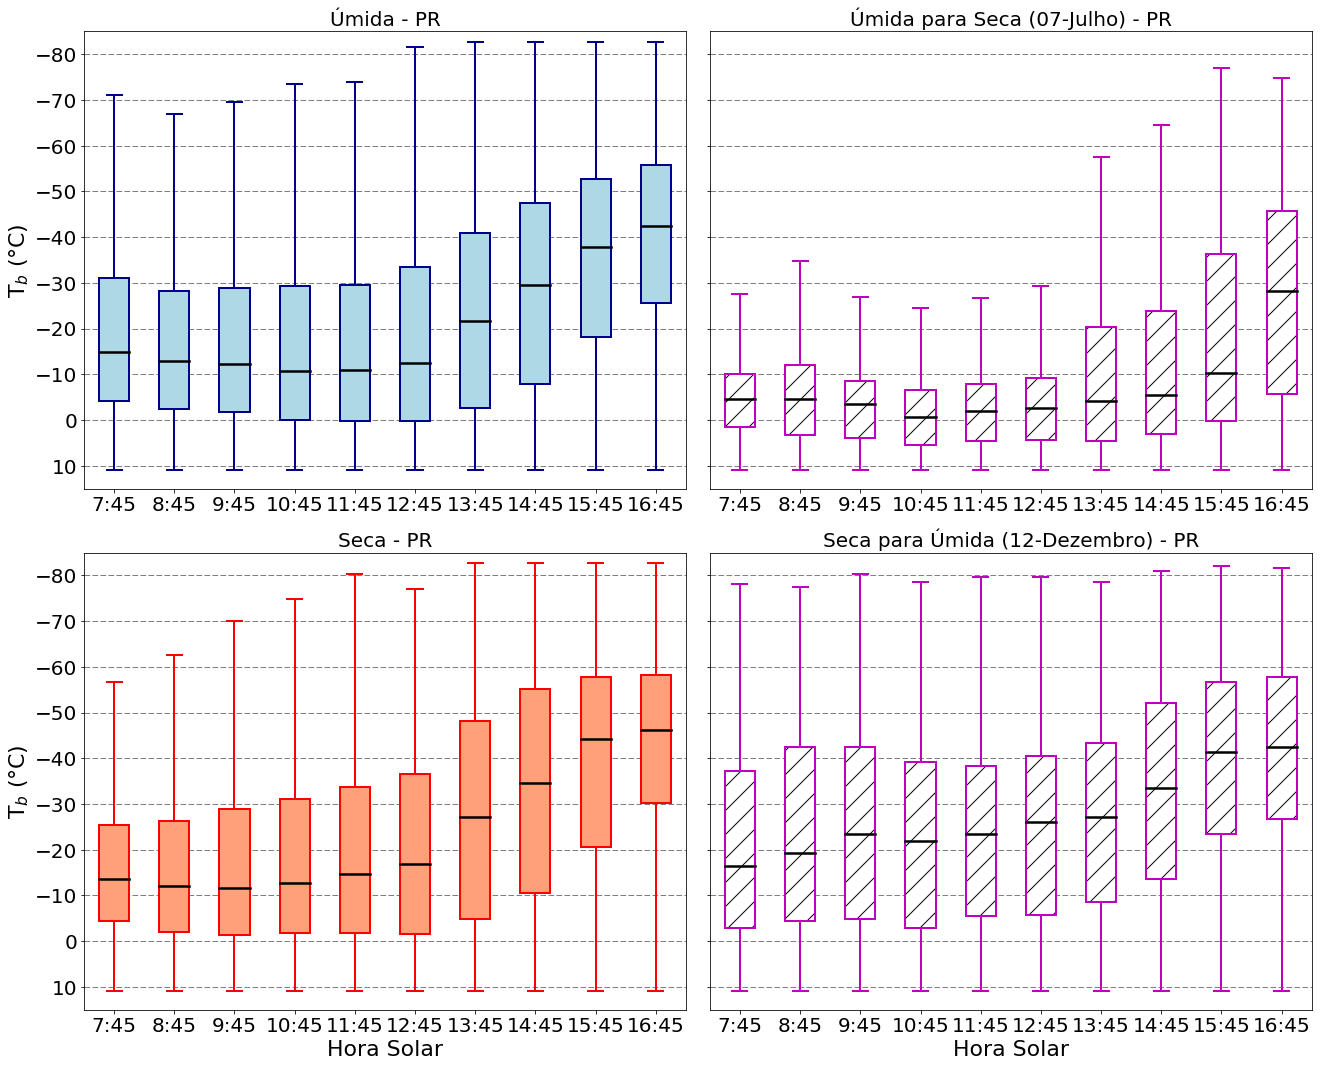

In [16]:
########################################################### BOXPLOTS #####################################################
######################### BOXPLOT TEMP SITE 1 ################
fig, axes = plt.subplots(2, 2, figsize=(22, 18), sharey=True)
plt.subplots_adjust(wspace=0.04, hspace=0.14)
yl = [15,-85]
tam_eixos = 20
divis_eixos = 10
grossura_grid = 1.0
grossura_line = 2.0
# Boxplot em função do UTC para a UMIDA do site 1:
temp_s0_um = [temp_U11_s0_um.values, temp_U12_s0_um.values, temp_U13_s0_um.values, temp_U14_s0_um.values, temp_U15_s0_um.values, 
              temp_U16_s0_um.values, temp_U17_s0_um.values, temp_U18_s0_um.values, temp_U19_s0_um.values, 
              temp_U20_s0_um.values]
temp_bp_s0_um = axes[0, 0].boxplot(temp_s0_um, showfliers=False, patch_artist=True)
axes[0, 0].grid(b=True, axis='y', linestyle='--', linewidth=grossura_grid, color='grey')
axes[0, 0].set_ylabel(u'T$_b$ ($\degree$C)', fontsize=tam_eixos+2)
axes[0, 0].tick_params(labelsize=tam_eixos)
axes[0, 0].yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
axes[0, 0].set_xticklabels(['7:45','8:45','9:45','10:45','11:45','12:45','13:45','14:45','15:45','16:45'])
axes[0, 0].set_ylim(yl)
axes[0, 0].set_title(u'Úmida - {}'.format(str(sites[0])), fontsize=tam_eixos)
for box in temp_bp_s0_um['boxes']:
    box.set(color='darkblue', linewidth=grossura_line)
    box.set(facecolor='lightblue')
for whisker in temp_bp_s0_um['whiskers']:
    whisker.set(color='darkblue', linewidth=grossura_line)
for cap in temp_bp_s0_um['caps']:
    cap.set(color='darkblue', linewidth=grossura_line)
for median in temp_bp_s0_um['medians']:
    median.set(color='k', linewidth=grossura_line+0.5)
# Boxplot em função do UTC para a TRANSIÇÂO 1 do site 1:
temp_s0_t1 = [temp_U11_s0_t1.values, temp_U12_s0_t1.values, temp_U13_s0_t1.values, temp_U14_s0_t1.values, temp_U15_s0_t1.values, 
              temp_U16_s0_t1.values, temp_U17_s0_t1.values, temp_U18_s0_t1.values, temp_U19_s0_t1.values, 
              temp_U20_s0_t1.values]
temp_bp_s0_t1 = axes[0, 1].boxplot(temp_s0_t1, showfliers=False, patch_artist=True)
axes[0, 1].grid(b=True, axis='y', linestyle='--', linewidth=grossura_grid, color='grey')
axes[0, 1].tick_params(labelsize=tam_eixos)
axes[0, 1].yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
axes[0, 1].set_xticklabels(['7:45','8:45','9:45','10:45','11:45','12:45','13:45','14:45','15:45','16:45'])
axes[0, 1].set_ylim(yl)
axes[0, 1].set_title(u'Úmida para Seca ({}) - {}'.format(str(months_tra[0]),str(sites[0])), fontsize=tam_eixos)
for box in temp_bp_s0_t1['boxes']:
    box.set(color='m', linewidth=grossura_line)
#     box.set(facecolor='thistle')
    box.set(facecolor='white')
    box.set(hatch = '/')
for whisker in temp_bp_s0_t1['whiskers']:
    whisker.set(color='m', linewidth=grossura_line)
for cap in temp_bp_s0_t1['caps']:
    cap.set(color='m', linewidth=grossura_line)
for median in temp_bp_s0_t1['medians']:
    median.set(color='k', linewidth=grossura_line+0.5)
# Boxplot em função do UTC para a SECA do site 1:
temp_s0_se = [temp_U11_s0_se.values, temp_U12_s0_se.values, temp_U13_s0_se.values, temp_U14_s0_se.values, temp_U15_s0_se.values,
              temp_U16_s0_se.values, temp_U17_s0_se.values, temp_U18_s0_se.values, temp_U19_s0_se.values, 
              temp_U20_s0_se.values]
temp_bp_s0_se = axes[1, 0].boxplot(temp_s0_se, showfliers=False, patch_artist=True)
axes[1, 0].tick_params(labelsize=tam_eixos)
axes[1, 0].grid(b=True, axis='y', linestyle='--', linewidth=grossura_grid, color='grey')
axes[1, 0].set_ylabel(u'T$_b$ ($\degree$C)', fontsize=tam_eixos+2)
axes[1, 0].set_xlabel(u'Hora Solar', fontsize=tam_eixos+2)
axes[1, 0].yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
axes[1, 0].set_xticklabels(['7:45','8:45','9:45','10:45','11:45','12:45','13:45','14:45','15:45','16:45'])
axes[1, 0].set_ylim(yl)
axes[1, 0].set_title(u'Seca - {}'.format(str(sites[0])), fontsize=tam_eixos)
for box in temp_bp_s0_se['boxes']:
    box.set(color='red', linewidth=grossura_line)
    box.set(facecolor='lightsalmon')
for whisker in temp_bp_s0_se['whiskers']:
    whisker.set(color='red', linewidth=grossura_line)
for cap in temp_bp_s0_se['caps']:
    cap.set(color='red', linewidth=grossura_line)
for median in temp_bp_s0_se['medians']:
    median.set(color='k', linewidth=grossura_line+0.5)
# Boxplot em função do UTC para a TRANSIÇÂO 2 do site 1:
temp_s0_t2 = [temp_U11_s0_t2.values, temp_U12_s0_t2.values, temp_U13_s0_t2.values, temp_U14_s0_t2.values, temp_U15_s0_t2.values, 
              temp_U16_s0_t2.values, temp_U17_s0_t2.values, temp_U18_s0_t2.values, temp_U19_s0_t2.values, 
              temp_U20_s0_t2.values]
temp_bp_s0_t2 = axes[1, 1].boxplot(temp_s0_t2, showfliers=False, patch_artist=True)
axes[1, 1].grid(b=True, axis='y', linestyle='--', linewidth=grossura_grid, color='grey')
axes[1, 1].tick_params(labelsize=tam_eixos)
axes[1, 1].set_xlabel(u'Hora Solar', fontsize=tam_eixos+2)
axes[1, 1].yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
axes[1, 1].set_xticklabels(['7:45','8:45','9:45','10:45','11:45','12:45','13:45','14:45','15:45','16:45'])
axes[1, 1].set_ylim(yl)
axes[1, 1].set_title(u'Seca para Úmida ({}) - {}'.format(str(months_tra[1]),str(sites[0])), fontsize=tam_eixos)
for box in temp_bp_s0_t2['boxes']:
    box.set(color='m', linewidth=grossura_line)
#     box.set(facecolor='thistle')
    box.set(facecolor='white')
    box.set(hatch = '/')
for whisker in temp_bp_s0_t2['whiskers']:
    whisker.set(color='m', linewidth=grossura_line)
for cap in temp_bp_s0_t2['caps']:
    cap.set(color='m', linewidth=grossura_line)
for median in temp_bp_s0_t2['medians']:
    median.set(color='k', linewidth=grossura_line+0.5)   
fig.savefig('/home/andre/Desktop/Resultados_3/Plotagens/Medianas_Temp_'+str(sites[0])+'.png', 
            orientation='landscape', bbox_inches='tight', dpi=100)
# plt.close(fig)

######################### BOXPLOT VIS SITE 1 ################
fig, axes = plt.subplots(2, 2, figsize=(22, 18), sharey=True)
plt.subplots_adjust(wspace=0.04, hspace=0.14)
yl = [25,105]
tam_eixos = 20
divis_eixos = 8
grossura_grid = 1.0
grossura_line = 2.0
# Boxplot em função do UTC para a UMIDA do site 1:
vis_s0_um = [vis_U11_s0_um.values, vis_U12_s0_um.values, vis_U13_s0_um.values, vis_U14_s0_um.values, vis_U15_s0_um.values, 
             vis_U16_s0_um.values, vis_U17_s0_um.values, vis_U18_s0_um.values, vis_U19_s0_um.values, 
             vis_U20_s0_um.values]
vis_bp_s0_um = axes[0, 0].boxplot(vis_s0_um, showfliers=False, patch_artist=True)
axes[0, 0].grid(b=True, axis='y', linestyle='--', linewidth=grossura_grid, color='grey')
axes[0, 0].set_ylabel(u'Refletância Ch. 1 - VIS (%)', fontsize=tam_eixos+2)
axes[0, 0].tick_params(labelsize=tam_eixos)
axes[0, 0].yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
axes[0, 0].set_xticklabels(['7:45','8:45','9:45','10:45','11:45','12:45','13:45','14:45','15:45','16:45'])
axes[0, 0].set_ylim(yl)
axes[0, 0].set_title(u'Úmida - {}'.format(str(sites[0])), fontsize=tam_eixos)
for box in vis_bp_s0_um['boxes']:
    box.set(color='darkblue', linewidth=grossura_line)
    box.set(facecolor='lightblue')
for whisker in vis_bp_s0_um['whiskers']:
    whisker.set(color='darkblue', linewidth=grossura_line)
for cap in vis_bp_s0_um['caps']:
    cap.set(color='darkblue', linewidth=grossura_line)
for median in vis_bp_s0_um['medians']:
    median.set(color='k', linewidth=grossura_line+0.5)
# Boxplot em função do UTC para a TRANSIÇÂO 1 do site 1:
vis_s0_t1 = [vis_U11_s0_t1.values, vis_U12_s0_t1.values, vis_U13_s0_t1.values, vis_U14_s0_t1.values, vis_U15_s0_t1.values, 
             vis_U16_s0_t1.values, vis_U17_s0_t1.values, vis_U18_s0_t1.values, vis_U19_s0_t1.values, 
             vis_U20_s0_t1.values]
vis_bp_s0_t1 = axes[0, 1].boxplot(vis_s0_t1, showfliers=False, patch_artist=True)
axes[0, 1].grid(b=True, axis='y', linestyle='--', linewidth=grossura_grid, color='grey')
axes[0, 1].tick_params(labelsize=tam_eixos)
axes[0, 1].yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
axes[0, 1].set_xticklabels(['7:45', '8:45','9:45','10:45','11:45','12:45','13:45','14:45','15:45','16:45'])
axes[0, 1].set_ylim(yl)
axes[0, 1].set_title(u'Úmida para Seca ({}) - {}'.format(str(months_tra[0]),str(sites[0])), fontsize=tam_eixos)
for box in vis_bp_s0_t1['boxes']:
    box.set(color='m', linewidth=grossura_line)
#     box.set(facecolor='thistle')
    box.set(facecolor='white')
    box.set(hatch = '/')
for whisker in vis_bp_s0_t1['whiskers']:
    whisker.set(color='m', linewidth=grossura_line)
for cap in vis_bp_s0_t1['caps']:
    cap.set(color='m', linewidth=grossura_line)
for median in vis_bp_s0_t1['medians']:
    median.set(color='k', linewidth=grossura_line+0.5)
# Boxplot em função do UTC para a SECA do site 1:
vis_s0_se = [vis_U11_s0_se.values, vis_U12_s0_se.values, vis_U13_s0_se.values, vis_U14_s0_se.values, vis_U15_s0_se.values, 
             vis_U16_s0_se.values, vis_U17_s0_se.values, vis_U18_s0_se.values, vis_U19_s0_se.values, 
             vis_U20_s0_se.values]
vis_bp_s0_se = axes[1, 0].boxplot(vis_s0_se, showfliers=False, patch_artist=True)
axes[1, 0].tick_params(labelsize=tam_eixos)
axes[1, 0].grid(b=True, axis='y', linestyle='--', linewidth=grossura_grid, color='grey')
axes[1, 0].set_ylabel(u'Refletância Ch. 1 - VIS (%)', fontsize=tam_eixos+2)
axes[1, 0].set_xlabel(u'Hora Solar', fontsize=tam_eixos+2)
axes[1, 0].yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
axes[1, 0].set_xticklabels(['7:45','8:45','9:45','10:45','11:45','12:45','13:45','14:45','15:45','16:45'])
axes[1, 0].set_ylim(yl)
axes[1, 0].set_title(u'Seca - {}'.format(str(sites[0])), fontsize=tam_eixos)
for box in vis_bp_s0_se['boxes']:
    box.set(color='red', linewidth=grossura_line)
    box.set(facecolor='lightsalmon')
for whisker in vis_bp_s0_se['whiskers']:
    whisker.set(color='red', linewidth=grossura_line)
for cap in vis_bp_s0_se['caps']:
    cap.set(color='red', linewidth=grossura_line)
for median in vis_bp_s0_se['medians']:
    median.set(color='k', linewidth=grossura_line+0.5)
# Boxplot em função do UTC para a TRANSIÇÂO 2 do site 1:
vis_s0_t2 = [vis_U11_s0_t2.values, vis_U12_s0_t2.values, vis_U13_s0_t2.values, vis_U14_s0_t2.values, vis_U15_s0_t2.values, 
             vis_U16_s0_t2.values, vis_U17_s0_t2.values, vis_U18_s0_t2.values, vis_U19_s0_t2.values, 
             vis_U20_s0_t2.values]
vis_bp_s0_t2 = axes[1, 1].boxplot(vis_s0_t2, showfliers=False, patch_artist=True)
axes[1, 1].grid(b=True, axis='y', linestyle='--', linewidth=grossura_grid, color='grey')
axes[1, 1].tick_params(labelsize=tam_eixos)
axes[1, 1].set_xlabel(u'Hora Solar', fontsize=tam_eixos+2)
axes[1, 1].yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
axes[1, 1].set_xticklabels(['7:45', '8:45','9:45','10:45','11:45','12:45','13:45','14:45','15:45','16:45'])
axes[1, 1].set_ylim(yl)
axes[1, 1].set_title(u'Seca para Úmida ({}) - {}'.format(str(months_tra[1]),str(sites[0])), fontsize=tam_eixos)
for box in vis_bp_s0_t2['boxes']:
    box.set(color='m', linewidth=grossura_line)
#     box.set(facecolor='thistle')
    box.set(facecolor='white')
    box.set(hatch = '/')
for whisker in vis_bp_s0_t2['whiskers']:
    whisker.set(color='m', linewidth=grossura_line)
for cap in vis_bp_s0_t2['caps']:
    cap.set(color='m', linewidth=grossura_line)
for median in vis_bp_s0_t2['medians']:
    median.set(color='k', linewidth=grossura_line+0.5)  
fig.savefig('/home/andre/Desktop/Resultados_3/Plotagens/Medianas_vis_'+str(sites[0])+'.png', 
            orientation='landscape', bbox_inches='tight', dpi=100)
plt.close(fig)

######################### BOXPLOT reff SITE 1 ################
fig, axes = plt.subplots(2, 2, figsize=(22, 18), sharey=True)
plt.subplots_adjust(wspace=0.04, hspace=0.14)
yl = [0,50]
tam_eixos = 20
divis_eixos = 10
grossura_grid = 1.0
grossura_line = 2.0
# Boxplot em função do UTC para a UMIDA do site 1:
reff_s0_um = [reff_U11_s0_um.values, reff_U12_s0_um.values, reff_U13_s0_um.values, reff_U14_s0_um.values, reff_U15_s0_um.values, 
              reff_U16_s0_um.values, reff_U17_s0_um.values, reff_U18_s0_um.values, reff_U19_s0_um.values, 
              reff_U20_s0_um.values]
reff_bp_s0_um = axes[0, 0].boxplot(reff_s0_um, showfliers=False, patch_artist=True)
axes[0, 0].grid(b=True, axis='y', linestyle='--', linewidth=grossura_grid, color='grey')
axes[0, 0].set_ylabel(u'r$_e$$_f$$_f$ ($\mu$m)', fontsize=tam_eixos+2)
axes[0, 0].tick_params(labelsize=tam_eixos)
axes[0, 0].yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
axes[0, 0].set_xticklabels(['7:45','8:45','9:45','10:45','11:45','12:45','13:45','14:45','15:45','16:45'])
axes[0, 0].set_ylim(yl)
axes[0, 0].set_title(u'Úmida - {}'.format(str(sites[0])), fontsize=tam_eixos)
for box in reff_bp_s0_um['boxes']:
    box.set(color='darkblue', linewidth=grossura_line)
    box.set(facecolor='lightblue')
for whisker in reff_bp_s0_um['whiskers']:
    whisker.set(color='darkblue', linewidth=grossura_line)
for cap in reff_bp_s0_um['caps']:
    cap.set(color='darkblue', linewidth=grossura_line)
for median in reff_bp_s0_um['medians']:
    median.set(color='k', linewidth=grossura_line+0.5)
# Boxplot em função do UTC para a TRANSIÇÂO 1 do site 1:
reff_s0_t1 = [reff_U11_s0_t1.values, reff_U12_s0_t1.values, reff_U13_s0_t1.values, reff_U14_s0_t1.values, reff_U15_s0_t1.values, 
              reff_U16_s0_t1.values, reff_U17_s0_t1.values, reff_U18_s0_t1.values, reff_U19_s0_t1.values, 
              reff_U20_s0_t1.values]
reff_bp_s0_t1 = axes[0, 1].boxplot(reff_s0_t1, showfliers=False, patch_artist=True)
axes[0, 1].grid(b=True, axis='y', linestyle='--', linewidth=grossura_grid, color='grey')
axes[0, 1].tick_params(labelsize=tam_eixos)
axes[0, 1].yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
axes[0, 1].set_xticklabels(['7:45','8:45','9:45','10:45','11:45','12:45','13:45','14:45','15:45','16:45'])
axes[0, 1].set_ylim(yl)
axes[0, 1].set_title(u'Úmida para Seca ({}) - {}'.format(str(months_tra[0]),str(sites[0])), fontsize=tam_eixos)
for box in reff_bp_s0_t1['boxes']:
    box.set(color='m', linewidth=grossura_line)
#     box.set(facecolor='thistle')
    box.set(facecolor='white')
    box.set(hatch = '/')
for whisker in reff_bp_s0_t1['whiskers']:
    whisker.set(color='m', linewidth=grossura_line)
for cap in reff_bp_s0_t1['caps']:
    cap.set(color='m', linewidth=grossura_line)
for median in reff_bp_s0_t1['medians']:
    median.set(color='k', linewidth=grossura_line+0.5)
# Boxplot em função do UTC para a SECA do site 1:
reff_s0_se = [reff_U11_s0_se.values, reff_U12_s0_se.values, reff_U13_s0_se.values, reff_U14_s0_se.values, reff_U15_s0_se.values, 
              reff_U16_s0_se.values, reff_U17_s0_se.values, reff_U18_s0_se.values, reff_U19_s0_se.values, 
              reff_U20_s0_se.values]
reff_bp_s0_se = axes[1, 0].boxplot(reff_s0_se, showfliers=False, patch_artist=True)
axes[1, 0].tick_params(labelsize=tam_eixos)
axes[1, 0].grid(b=True, axis='y', linestyle='--', linewidth=grossura_grid, color='grey')
axes[1, 0].set_ylabel(u'r$_e$$_f$$_f$ ($\mu$m)', fontsize=tam_eixos+2)
axes[1, 0].set_xlabel(u'Hora Solar', fontsize=tam_eixos+2)
axes[1, 0].yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
axes[1, 0].set_xticklabels(['7:45','8:45','9:45','10:45','11:45','12:45','13:45','14:45','15:45','16:45'])
axes[1, 0].set_ylim(yl)
axes[1, 0].set_title(u'Seca - {}'.format(str(sites[0])), fontsize=tam_eixos)
for box in reff_bp_s0_se['boxes']:
    box.set(color='red', linewidth=grossura_line)
    box.set(facecolor='lightsalmon')
for whisker in reff_bp_s0_se['whiskers']:
    whisker.set(color='red', linewidth=grossura_line)
for cap in reff_bp_s0_se['caps']:
    cap.set(color='red', linewidth=grossura_line)
for median in reff_bp_s0_se['medians']:
    median.set(color='k', linewidth=grossura_line+0.5)
# Boxplot em função do UTC para a TRANSIÇÂO 2 do site 1:
reff_s0_t2 = [reff_U11_s0_t2.values, reff_U12_s0_t2.values, reff_U13_s0_t2.values, reff_U14_s0_t2.values, reff_U15_s0_t2.values, 
              reff_U16_s0_t2.values, reff_U17_s0_t2.values, reff_U18_s0_t2.values, reff_U19_s0_t2.values, 
              reff_U20_s0_t2.values]
reff_bp_s0_t2 = axes[1, 1].boxplot(reff_s0_t2, showfliers=False, patch_artist=True)
axes[1, 1].grid(b=True, axis='y', linestyle='--', linewidth=grossura_grid, color='grey')
axes[1, 1].tick_params(labelsize=tam_eixos)
axes[1, 1].set_xlabel(u'Hora Solar', fontsize=tam_eixos+2)
axes[1, 1].yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
axes[1, 1].set_xticklabels(['7:45','8:45','9:45','10:45','11:45','12:45','13:45','14:45','15:45','16:45'])
axes[1, 1].set_ylim(yl)
axes[1, 1].set_title(u'Seca para Úmida ({}) - {}'.format(str(months_tra[1]),str(sites[0])), fontsize=tam_eixos)
for box in reff_bp_s0_t2['boxes']:
    box.set(color='m', linewidth=grossura_line)
#     box.set(facecolor='thistle')
    box.set(facecolor='white')
    box.set(hatch = '/')
for whisker in reff_bp_s0_t2['whiskers']:
    whisker.set(color='m', linewidth=grossura_line)
for cap in reff_bp_s0_t2['caps']:
    cap.set(color='m', linewidth=grossura_line)
for median in reff_bp_s0_t2['medians']:
    median.set(color='k', linewidth=grossura_line+0.5)  
fig.savefig('/home/andre/Desktop/Resultados_3/Plotagens/Medianas_reff_'+str(sites[0])+'.png', 
            orientation='landscape', bbox_inches='tight', dpi=100)
plt.close(fig)

######################### BOXPLOT IR SITE 1 ################
fig, axes = plt.subplots(2, 2, figsize=(22, 18), sharey=True)
plt.subplots_adjust(wspace=0.04, hspace=0.14)
yl = [-5,45]
tam_eixos = 20
divis_eixos = 10
grossura_grid = 1.0
grossura_line = 2.0
# Boxplot em função do UTC para a UMIDA do site 1:
ir_s0_um = [ir_U11_s0_um.values, ir_U12_s0_um.values, ir_U13_s0_um.values, ir_U14_s0_um.values, ir_U15_s0_um.values,
            ir_U16_s0_um.values, ir_U17_s0_um.values, ir_U18_s0_um.values, ir_U19_s0_um.values, 
            ir_U20_s0_um.values]
ir_bp_s0_um = axes[0, 0].boxplot(ir_s0_um, showfliers=False, patch_artist=True)
axes[0, 0].grid(b=True, axis='y', linestyle='--', linewidth=grossura_grid, color='grey')
axes[0, 0].set_ylabel(u'Refletância Ch. 2 - IR (%)', fontsize=tam_eixos+2)
axes[0, 0].tick_params(labelsize=tam_eixos)
axes[0, 0].yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
axes[0, 0].set_xticklabels(['7:45','8:45','9:45','10:45','11:45','12:45','13:45','14:45','15:45','16:45'])
axes[0, 0].set_ylim(yl)
axes[0, 0].set_title(u'Úmida - {}'.format(str(sites[0])), fontsize=tam_eixos)
for box in ir_bp_s0_um['boxes']:
    box.set(color='darkblue', linewidth=grossura_line)
    box.set(facecolor='lightblue')
for whisker in ir_bp_s0_um['whiskers']:
    whisker.set(color='darkblue', linewidth=grossura_line)
for cap in ir_bp_s0_um['caps']:
    cap.set(color='darkblue', linewidth=grossura_line)
for median in ir_bp_s0_um['medians']:
    median.set(color='k', linewidth=grossura_line+0.5)
# Boxplot em função do UTC para a TRANSIÇÂO 1 do site 1:
ir_s0_t1 = [ir_U11_s0_t1.values, ir_U12_s0_t1.values, ir_U13_s0_t1.values, ir_U14_s0_t1.values, ir_U15_s0_t1.values, 
            ir_U16_s0_t1.values, ir_U17_s0_t1.values, ir_U18_s0_t1.values, ir_U19_s0_t1.values, 
            ir_U20_s0_t1.values]
ir_bp_s0_t1 = axes[0, 1].boxplot(ir_s0_t1, showfliers=False, patch_artist=True)
axes[0, 1].grid(b=True, axis='y', linestyle='--', linewidth=grossura_grid, color='grey')
axes[0, 1].tick_params(labelsize=tam_eixos)
axes[0, 1].yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
axes[0, 1].set_xticklabels(['7:45','8:45','9:45','10:45','11:45','12:45','13:45','14:45','15:45','16:45'])
axes[0, 1].set_ylim(yl)
axes[0, 1].set_title(u'Úmida para Seca ({}) - {}'.format(str(months_tra[0]),str(sites[0])), fontsize=tam_eixos)
for box in ir_bp_s0_t1['boxes']:
    box.set(color='m', linewidth=grossura_line)
#     box.set(facecolor='thistle')
    box.set(facecolor='white')
    box.set(hatch = '/')
for whisker in ir_bp_s0_t1['whiskers']:
    whisker.set(color='m', linewidth=grossura_line)
for cap in ir_bp_s0_t1['caps']:
    cap.set(color='m', linewidth=grossura_line)
for median in ir_bp_s0_t1['medians']:
    median.set(color='k', linewidth=grossura_line+0.5)
# Boxplot em função do UTC para a SECA do site 1:
ir_s0_se = [ir_U11_s0_se.values, ir_U12_s0_se.values, ir_U13_s0_se.values, ir_U14_s0_se.values, ir_U15_s0_se.values, 
            ir_U16_s0_se.values, ir_U17_s0_se.values, ir_U18_s0_se.values, ir_U19_s0_se.values, 
            ir_U20_s0_se.values]
ir_bp_s0_se = axes[1, 0].boxplot(ir_s0_se, showfliers=False, patch_artist=True)
axes[1, 0].tick_params(labelsize=tam_eixos)
axes[1, 0].grid(b=True, axis='y', linestyle='--', linewidth=grossura_grid, color='grey')
axes[1, 0].set_ylabel(u'Refletância Ch. 2 - IR (%)', fontsize=tam_eixos+2)
axes[1, 0].set_xlabel(u'Hora Solar', fontsize=tam_eixos+2)
axes[1, 0].yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
axes[1, 0].set_xticklabels(['7:45','8:45','9:45','10:45','11:45','12:45','13:45','14:45','15:45','16:45'])
axes[1, 0].set_ylim(yl)
axes[1, 0].set_title(u'Seca - {}'.format(str(sites[0])), fontsize=tam_eixos)
for box in ir_bp_s0_se['boxes']:
    box.set(color='red', linewidth=grossura_line)
    box.set(facecolor='lightsalmon')
for whisker in ir_bp_s0_se['whiskers']:
    whisker.set(color='red', linewidth=grossura_line)
for cap in ir_bp_s0_se['caps']:
    cap.set(color='red', linewidth=grossura_line)
for median in ir_bp_s0_se['medians']:
    median.set(color='k', linewidth=grossura_line+0.5)
# Boxplot em função do UTC para a TRANSIÇÂO 2 do site 1:
ir_s0_t2 = [ir_U11_s0_t2.values, ir_U12_s0_t2.values, ir_U13_s0_t2.values, ir_U14_s0_t2.values, ir_U15_s0_t2.values, 
            ir_U16_s0_t2.values, ir_U17_s0_t2.values, ir_U18_s0_t2.values, ir_U19_s0_t2.values, 
            ir_U20_s0_t2.values]
ir_bp_s0_t2 = axes[1, 1].boxplot(ir_s0_t2, showfliers=False, patch_artist=True)
axes[1, 1].grid(b=True, axis='y', linestyle='--', linewidth=grossura_grid, color='grey')
axes[1, 1].tick_params(labelsize=tam_eixos)
axes[1, 1].set_xlabel(u'Hora Solar', fontsize=tam_eixos+2)
axes[1, 1].yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
axes[1, 1].set_xticklabels(['7:45','8:45','9:45','10:45','11:45','12:45','13:45','14:45','15:45','16:45'])
axes[1, 1].set_ylim(yl)
axes[1, 1].set_title(u'Seca para Úmida ({}) - {}'.format(str(months_tra[1]),str(sites[0])), fontsize=tam_eixos)
for box in ir_bp_s0_t2['boxes']:
    box.set(color='m', linewidth=grossura_line)
#     box.set(facecolor='thistle')
    box.set(facecolor='white')
    box.set(hatch = '/')
for whisker in ir_bp_s0_t2['whiskers']:
    whisker.set(color='m', linewidth=grossura_line)
for cap in ir_bp_s0_t2['caps']:
    cap.set(color='m', linewidth=grossura_line)
for median in ir_bp_s0_t2['medians']:
    median.set(color='k', linewidth=grossura_line+0.5) 
fig.savefig('/home/andre/Desktop/Resultados_3/Plotagens/Medianas_ir_'+str(sites[0])+'.png', 
            orientation='landscape', bbox_inches='tight', dpi=100)
plt.close(fig)

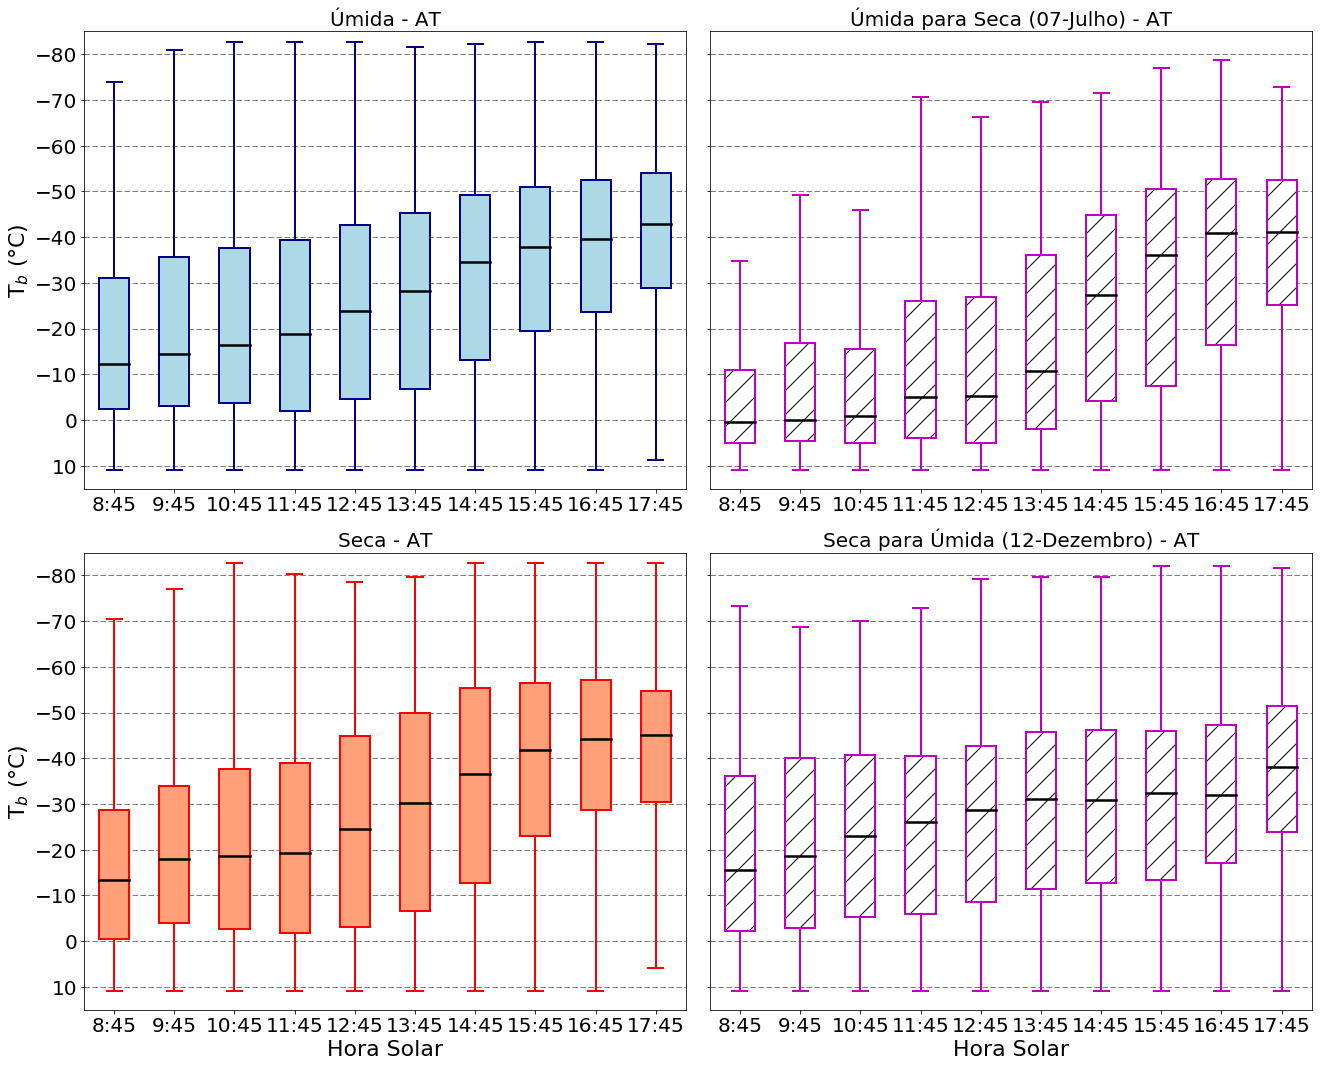

In [17]:
######################### BOXPLOT TEMP SITE 2 ################
fig, axes = plt.subplots(2, 2, figsize=(22, 18), sharey=True)
plt.subplots_adjust(wspace=0.04, hspace=0.14)
yl = [15,-85]
tam_eixos = 20
divis_eixos = 10
grossura_grid = 1.0
grossura_line = 2.0
# Boxplot em função do UTC para a UMIDA do site 2:
temp_s1_um = [temp_U11_s1_um.values, temp_U12_s1_um.values, temp_U13_s1_um.values, temp_U14_s1_um.values, temp_U15_s1_um.values, 
              temp_U16_s1_um.values, temp_U17_s1_um.values, temp_U18_s1_um.values, temp_U19_s1_um.values, 
              temp_U20_s1_um.values]
temp_bp_s1_um = axes[0, 0].boxplot(temp_s1_um, showfliers=False, patch_artist=True)
axes[0, 0].grid(b=True, axis='y', linestyle='--', linewidth=grossura_grid, color='grey')
axes[0, 0].set_ylabel(u'T$_b$ ($\degree$C)', fontsize=tam_eixos+2)
axes[0, 0].tick_params(labelsize=tam_eixos)
axes[0, 0].yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
axes[0, 0].set_xticklabels(['8:45','9:45','10:45','11:45','12:45','13:45','14:45','15:45','16:45','17:45'])
axes[0, 0].set_ylim(yl)
axes[0, 0].set_title(u'Úmida - {}'.format(str(sites[1])), fontsize=tam_eixos)
for box in temp_bp_s1_um['boxes']:
    box.set(color='darkblue', linewidth=grossura_line)
    box.set(facecolor='lightblue')
for whisker in temp_bp_s1_um['whiskers']:
    whisker.set(color='darkblue', linewidth=grossura_line)
for cap in temp_bp_s1_um['caps']:
    cap.set(color='darkblue', linewidth=grossura_line)
for median in temp_bp_s1_um['medians']:
    median.set(color='k', linewidth=grossura_line+0.5)
# Boxplot em função do UTC para a TRANSIÇÂO 1 do site 2:
temp_s1_t1 = [temp_U11_s1_t1.values, temp_U12_s1_t1.values, temp_U13_s1_t1.values, temp_U14_s1_t1.values, temp_U15_s1_t1.values, 
              temp_U16_s1_t1.values, temp_U17_s1_t1.values, temp_U18_s1_t1.values, temp_U19_s1_t1.values, 
              temp_U20_s1_t1.values]
temp_bp_s1_t1 = axes[0, 1].boxplot(temp_s1_t1, showfliers=False, patch_artist=True)
axes[0, 1].grid(b=True, axis='y', linestyle='--', linewidth=grossura_grid, color='grey')
axes[0, 1].tick_params(labelsize=tam_eixos)
axes[0, 1].yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
axes[0, 1].set_xticklabels(['8:45','9:45','10:45','11:45','12:45','13:45','14:45','15:45','16:45','17:45'])
axes[0, 1].set_ylim(yl)
axes[0, 1].set_title(u'Úmida para Seca ({}) - {}'.format(str(months_tra[0]),str(sites[1])), fontsize=tam_eixos)
for box in temp_bp_s1_t1['boxes']:
    box.set(color='m', linewidth=grossura_line)
#     box.set(facecolor='thistle')
    box.set(facecolor='white')
    box.set(hatch = '/')
for whisker in temp_bp_s1_t1['whiskers']:
    whisker.set(color='m', linewidth=grossura_line)
for cap in temp_bp_s1_t1['caps']:
    cap.set(color='m', linewidth=grossura_line)
for median in temp_bp_s1_t1['medians']:
    median.set(color='k', linewidth=grossura_line+0.5)
# Boxplot em função do UTC para a SECA do site 2:
temp_s1_se = [temp_U11_s1_se.values, temp_U12_s1_se.values, temp_U13_s1_se.values, temp_U14_s1_se.values, temp_U15_s1_se.values,
              temp_U16_s1_se.values, temp_U17_s1_se.values, temp_U18_s1_se.values, temp_U19_s1_se.values, 
              temp_U20_s1_se.values]
temp_bp_s1_se = axes[1, 0].boxplot(temp_s1_se, showfliers=False, patch_artist=True)
axes[1, 0].tick_params(labelsize=tam_eixos)
axes[1, 0].grid(b=True, axis='y', linestyle='--', linewidth=grossura_grid, color='grey')
axes[1, 0].set_ylabel(u'T$_b$ ($\degree$C)', fontsize=tam_eixos+2)
axes[1, 0].set_xlabel(u'Hora Solar', fontsize=tam_eixos+2)
axes[1, 0].yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
axes[1, 0].set_xticklabels(['8:45','9:45','10:45','11:45','12:45','13:45','14:45','15:45','16:45','17:45'])
axes[1, 0].set_ylim(yl)
axes[1, 0].set_title(u'Seca - {}'.format(str(sites[1])), fontsize=tam_eixos)
for box in temp_bp_s1_se['boxes']:
    box.set(color='red', linewidth=grossura_line)
    box.set(facecolor='lightsalmon')
for whisker in temp_bp_s1_se['whiskers']:
    whisker.set(color='red', linewidth=grossura_line)
for cap in temp_bp_s1_se['caps']:
    cap.set(color='red', linewidth=grossura_line)
for median in temp_bp_s1_se['medians']:
    median.set(color='k', linewidth=grossura_line+0.5)
# Boxplot em função do UTC para a TRANSIÇÂO 2 do site 2:
temp_s1_t2 = [temp_U11_s1_t2.values, temp_U12_s1_t2.values, temp_U13_s1_t2.values, temp_U14_s1_t2.values, temp_U15_s1_t2.values, 
              temp_U16_s1_t2.values, temp_U17_s1_t2.values, temp_U18_s1_t2.values, temp_U19_s1_t2.values, 
              temp_U20_s1_t2.values]
temp_bp_s1_t2 = axes[1, 1].boxplot(temp_s1_t2, showfliers=False, patch_artist=True)
axes[1, 1].grid(b=True, axis='y', linestyle='--', linewidth=grossura_grid, color='grey')
axes[1, 1].tick_params(labelsize=tam_eixos)
axes[1, 1].set_xlabel(u'Hora Solar', fontsize=tam_eixos+2)
axes[1, 1].yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
axes[1, 1].set_xticklabels(['8:45','9:45','10:45','11:45','12:45','13:45','14:45','15:45','16:45','17:45'])
axes[1, 1].set_ylim(yl)
axes[1, 1].set_title(u'Seca para Úmida ({}) - {}'.format(str(months_tra[1]),str(sites[1])), fontsize=tam_eixos)
for box in temp_bp_s1_t2['boxes']:
    box.set(color='m', linewidth=grossura_line)
#     box.set(facecolor='thistle')
    box.set(facecolor='white')
    box.set(hatch = '/')
for whisker in temp_bp_s1_t2['whiskers']:
    whisker.set(color='m', linewidth=grossura_line)
for cap in temp_bp_s1_t2['caps']:
    cap.set(color='m', linewidth=grossura_line)
for median in temp_bp_s1_t2['medians']:
    median.set(color='k', linewidth=grossura_line+0.5)   
fig.savefig('/home/andre/Desktop/Resultados_3/Plotagens/Medianas_Temp_'+str(sites[1])+'.png', 
            orientation='landscape', bbox_inches='tight', dpi=100)
# plt.close(fig)

######################### BOXPLOT VIS SITE 2 ################
fig, axes = plt.subplots(2, 2, figsize=(22, 18), sharey=True)
plt.subplots_adjust(wspace=0.04, hspace=0.14)
yl = [25,105]
tam_eixos = 20
divis_eixos = 8
grossura_grid = 1.0
grossura_line = 2.0
# Boxplot em função do UTC para a UMIDA do site 2:
vis_s1_um = [vis_U11_s1_um.values, vis_U12_s1_um.values, vis_U13_s1_um.values, vis_U14_s1_um.values, vis_U15_s1_um.values, 
             vis_U16_s1_um.values, vis_U17_s1_um.values, vis_U18_s1_um.values, vis_U19_s1_um.values, 
             vis_U20_s1_um.values]
vis_bp_s1_um = axes[0, 0].boxplot(vis_s1_um, showfliers=False, patch_artist=True)
axes[0, 0].grid(b=True, axis='y', linestyle='--', linewidth=grossura_grid, color='grey')
axes[0, 0].set_ylabel(u'Refletância Ch. 1 - VIS (%)', fontsize=tam_eixos+2)
axes[0, 0].tick_params(labelsize=tam_eixos)
axes[0, 0].yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
axes[0, 0].set_xticklabels(['8:45','9:45','10:45','11:45','12:45','13:45','14:45','15:45','16:45','17:45'])
axes[0, 0].set_ylim(yl)
axes[0, 0].set_title(u'Úmida - {}'.format(str(sites[1])), fontsize=tam_eixos)
for box in vis_bp_s1_um['boxes']:
    box.set(color='darkblue', linewidth=grossura_line)
    box.set(facecolor='lightblue')
for whisker in vis_bp_s1_um['whiskers']:
    whisker.set(color='darkblue', linewidth=grossura_line)
for cap in vis_bp_s1_um['caps']:
    cap.set(color='darkblue', linewidth=grossura_line)
for median in vis_bp_s1_um['medians']:
    median.set(color='k', linewidth=grossura_line+0.5)
# Boxplot em função do UTC para a TRANSIÇÂO 1 do site 2:
vis_s1_t1 = [vis_U11_s1_t1.values, vis_U12_s1_t1.values, vis_U13_s1_t1.values, vis_U14_s1_t1.values, vis_U15_s1_t1.values, 
             vis_U16_s1_t1.values, vis_U17_s1_t1.values, vis_U18_s1_t1.values, vis_U19_s1_t1.values, 
             vis_U20_s1_t1.values]
vis_bp_s1_t1 = axes[0, 1].boxplot(vis_s1_t1, showfliers=False, patch_artist=True)
axes[0, 1].grid(b=True, axis='y', linestyle='--', linewidth=grossura_grid, color='grey')
axes[0, 1].tick_params(labelsize=tam_eixos)
axes[0, 1].yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
axes[0, 1].set_xticklabels(['8:45','9:45','10:45','11:45','12:45','13:45','14:45','15:45','16:45','17:45'])
axes[0, 1].set_ylim(yl)
axes[0, 1].set_title(u'Úmida para Seca ({}) - {}'.format(str(months_tra[0]),str(sites[1])), fontsize=tam_eixos)
for box in vis_bp_s1_t1['boxes']:
    box.set(color='m', linewidth=grossura_line)
#     box.set(facecolor='thistle')
    box.set(facecolor='white')
    box.set(hatch = '/')
for whisker in vis_bp_s1_t1['whiskers']:
    whisker.set(color='m', linewidth=grossura_line)
for cap in vis_bp_s1_t1['caps']:
    cap.set(color='m', linewidth=grossura_line)
for median in vis_bp_s1_t1['medians']:
    median.set(color='k', linewidth=grossura_line+0.5)
# Boxplot em função do UTC para a SECA do site 2:
vis_s1_se = [vis_U11_s1_se.values, vis_U12_s1_se.values, vis_U13_s1_se.values, vis_U14_s1_se.values, vis_U15_s1_se.values, 
             vis_U16_s1_se.values, vis_U17_s1_se.values, vis_U18_s1_se.values, vis_U19_s1_se.values, 
             vis_U20_s1_se.values]
vis_bp_s1_se = axes[1, 0].boxplot(vis_s1_se, showfliers=False, patch_artist=True)
axes[1, 0].tick_params(labelsize=tam_eixos)
axes[1, 0].grid(b=True, axis='y', linestyle='--', linewidth=grossura_grid, color='grey')
axes[1, 0].set_ylabel(u'Refletância Ch. 1 - VIS (%)', fontsize=tam_eixos+2)
axes[1, 0].set_xlabel(u'Hora Solar', fontsize=tam_eixos+2)
axes[1, 0].yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
axes[1, 0].set_xticklabels(['8:45','9:45','10:45','11:45','12:45','13:45','14:45','15:45','16:45','17:45'])
axes[1, 0].set_ylim(yl)
axes[1, 0].set_title(u'Seca - {}'.format(str(sites[1])), fontsize=tam_eixos)
for box in vis_bp_s1_se['boxes']:
    box.set(color='red', linewidth=grossura_line)
    box.set(facecolor='lightsalmon')
for whisker in vis_bp_s1_se['whiskers']:
    whisker.set(color='red', linewidth=grossura_line)
for cap in vis_bp_s1_se['caps']:
    cap.set(color='red', linewidth=grossura_line)
for median in vis_bp_s1_se['medians']:
    median.set(color='k', linewidth=grossura_line+0.5)
# Boxplot em função do UTC para a TRANSIÇÂO 2 do site 2:
vis_s1_t2 = [vis_U11_s1_t2.values, vis_U12_s1_t2.values, vis_U13_s1_t2.values, vis_U14_s1_t2.values, vis_U15_s1_t2.values, 
             vis_U16_s1_t2.values, vis_U17_s1_t2.values, vis_U18_s1_t2.values, vis_U19_s1_t2.values, 
             vis_U20_s1_t2.values]
vis_bp_s1_t2 = axes[1, 1].boxplot(vis_s1_t2, showfliers=False, patch_artist=True)
axes[1, 1].grid(b=True, axis='y', linestyle='--', linewidth=grossura_grid, color='grey')
axes[1, 1].tick_params(labelsize=tam_eixos)
axes[1, 1].set_xlabel(u'Hora Solar', fontsize=tam_eixos+2)
axes[1, 1].yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
axes[1, 1].set_xticklabels(['8:45','9:45','10:45','11:45','12:45','13:45','14:45','15:45','16:45','17:45'])
axes[1, 1].set_ylim(yl)
axes[1, 1].set_title(u'Seca para Úmida ({}) - {}'.format(str(months_tra[1]),str(sites[1])), fontsize=tam_eixos)
for box in vis_bp_s1_t2['boxes']:
    box.set(color='m', linewidth=grossura_line)
#     box.set(facecolor='thistle')
    box.set(facecolor='white')
    box.set(hatch = '/')
for whisker in vis_bp_s1_t2['whiskers']:
    whisker.set(color='m', linewidth=grossura_line)
for cap in vis_bp_s1_t2['caps']:
    cap.set(color='m', linewidth=grossura_line)
for median in vis_bp_s1_t2['medians']:
    median.set(color='k', linewidth=grossura_line+0.5)  
fig.savefig('/home/andre/Desktop/Resultados_3/Plotagens/Medianas_vis_'+str(sites[1])+'.png', 
            orientation='landscape', bbox_inches='tight', dpi=100)
plt.close(fig)

######################### BOXPLOT reff SITE 2 ################
fig, axes = plt.subplots(2, 2, figsize=(22, 18), sharey=True)
plt.subplots_adjust(wspace=0.04, hspace=0.14)
yl = [0,50]
tam_eixos = 20
divis_eixos = 10
grossura_grid = 1.0
grossura_line = 2.0
# Boxplot em função do UTC para a UMIDA do site 2:
reff_s1_um = [reff_U11_s1_um.values, reff_U12_s1_um.values, reff_U13_s1_um.values, reff_U14_s1_um.values, reff_U15_s1_um.values, 
              reff_U16_s1_um.values, reff_U17_s1_um.values, reff_U18_s1_um.values, reff_U19_s1_um.values, 
              reff_U20_s1_um.values]
reff_bp_s1_um = axes[0, 0].boxplot(reff_s1_um, showfliers=False, patch_artist=True)
axes[0, 0].grid(b=True, axis='y', linestyle='--', linewidth=grossura_grid, color='grey')
axes[0, 0].set_ylabel(u'r$_e$$_f$$_f$ ($\mu$m)', fontsize=tam_eixos+2)
axes[0, 0].tick_params(labelsize=tam_eixos)
axes[0, 0].yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
axes[0, 0].set_xticklabels(['8:45','9:45','10:45','11:45','12:45','13:45','14:45','15:45','16:45','17:45'])
axes[0, 0].set_ylim(yl)
axes[0, 0].set_title(u'Úmida - {}'.format(str(sites[1])), fontsize=tam_eixos)
for box in reff_bp_s1_um['boxes']:
    box.set(color='darkblue', linewidth=grossura_line)
    box.set(facecolor='lightblue')
for whisker in reff_bp_s1_um['whiskers']:
    whisker.set(color='darkblue', linewidth=grossura_line)
for cap in reff_bp_s1_um['caps']:
    cap.set(color='darkblue', linewidth=grossura_line)
for median in reff_bp_s1_um['medians']:
    median.set(color='k', linewidth=grossura_line+0.5)
# Boxplot em função do UTC para a TRANSIÇÂO 1 do site 2:
reff_s1_t1 = [reff_U11_s1_t1.values, reff_U12_s1_t1.values, reff_U13_s1_t1.values, reff_U14_s1_t1.values, reff_U15_s1_t1.values, 
              reff_U16_s1_t1.values, reff_U17_s1_t1.values, reff_U18_s1_t1.values, reff_U19_s1_t1.values, 
              reff_U20_s1_t1.values]
reff_bp_s1_t1 = axes[0, 1].boxplot(reff_s1_t1, showfliers=False, patch_artist=True)
axes[0, 1].grid(b=True, axis='y', linestyle='--', linewidth=grossura_grid, color='grey')
axes[0, 1].tick_params(labelsize=tam_eixos)
axes[0, 1].yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
axes[0, 1].set_xticklabels(['8:45','9:45','10:45','11:45','12:45','13:45','14:45','15:45','16:45','17:45'])
axes[0, 1].set_ylim(yl)
axes[0, 1].set_title(u'Úmida para Seca ({}) - {}'.format(str(months_tra[0]),str(sites[1])), fontsize=tam_eixos)
for box in reff_bp_s1_t1['boxes']:
    box.set(color='m', linewidth=grossura_line)
#     box.set(facecolor='thistle')
    box.set(facecolor='white')
    box.set(hatch = '/')
for whisker in reff_bp_s1_t1['whiskers']:
    whisker.set(color='m', linewidth=grossura_line)
for cap in reff_bp_s1_t1['caps']:
    cap.set(color='m', linewidth=grossura_line)
for median in reff_bp_s1_t1['medians']:
    median.set(color='k', linewidth=grossura_line+0.5)
# Boxplot em função do UTC para a SECA do site 2:
reff_s1_se = [reff_U11_s1_se.values, reff_U12_s1_se.values, reff_U13_s1_se.values, reff_U14_s1_se.values, reff_U15_s1_se.values, 
              reff_U16_s1_se.values, reff_U17_s1_se.values, reff_U18_s1_se.values, reff_U19_s1_se.values, 
              reff_U20_s1_se.values]
reff_bp_s1_se = axes[1, 0].boxplot(reff_s1_se, showfliers=False, patch_artist=True)
axes[1, 0].tick_params(labelsize=tam_eixos)
axes[1, 0].grid(b=True, axis='y', linestyle='--', linewidth=grossura_grid, color='grey')
axes[1, 0].set_ylabel(u'r$_e$$_f$$_f$ ($\mu$m)', fontsize=tam_eixos+2)
axes[1, 0].set_xlabel(u'Hora Solar', fontsize=tam_eixos+2)
axes[1, 0].yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
axes[1, 0].set_xticklabels(['8:45','9:45','10:45','11:45','12:45','13:45','14:45','15:45','16:45','17:45'])
axes[1, 0].set_ylim(yl)
axes[1, 0].set_title(u'Seca - {}'.format(str(sites[1])), fontsize=tam_eixos)
for box in reff_bp_s1_se['boxes']:
    box.set(color='red', linewidth=grossura_line)
    box.set(facecolor='lightsalmon')
for whisker in reff_bp_s1_se['whiskers']:
    whisker.set(color='red', linewidth=grossura_line)
for cap in reff_bp_s1_se['caps']:
    cap.set(color='red', linewidth=grossura_line)
for median in reff_bp_s1_se['medians']:
    median.set(color='k', linewidth=grossura_line+0.5)
# Boxplot em função do UTC para a TRANSIÇÂO 2 do site 2:
reff_s1_t2 = [reff_U11_s1_t2.values, reff_U12_s1_t2.values, reff_U13_s1_t2.values, reff_U14_s1_t2.values, reff_U15_s1_t2.values, 
              reff_U16_s1_t2.values, reff_U17_s1_t2.values, reff_U18_s1_t2.values, reff_U19_s1_t2.values, 
              reff_U20_s1_t2.values]
reff_bp_s1_t2 = axes[1, 1].boxplot(reff_s1_t2, showfliers=False, patch_artist=True)
axes[1, 1].grid(b=True, axis='y', linestyle='--', linewidth=grossura_grid, color='grey')
axes[1, 1].tick_params(labelsize=tam_eixos)
axes[1, 1].set_xlabel(u'Hora Solar', fontsize=tam_eixos+2)
axes[1, 1].yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
axes[1, 1].set_xticklabels(['8:45','9:45','10:45','11:45','12:45','13:45','14:45','15:45','16:45','17:45'])
axes[1, 1].set_ylim(yl)
axes[1, 1].set_title(u'Seca para Úmida ({}) - {}'.format(str(months_tra[1]),str(sites[1])), fontsize=tam_eixos)
for box in reff_bp_s1_t2['boxes']:
    box.set(color='m', linewidth=grossura_line)
#     box.set(facecolor='thistle')
    box.set(facecolor='white')
    box.set(hatch = '/')
for whisker in reff_bp_s1_t2['whiskers']:
    whisker.set(color='m', linewidth=grossura_line)
for cap in reff_bp_s1_t2['caps']:
    cap.set(color='m', linewidth=grossura_line)
for median in reff_bp_s1_t2['medians']:
    median.set(color='k', linewidth=grossura_line+0.5)  
fig.savefig('/home/andre/Desktop/Resultados_3/Plotagens/Medianas_reff_'+str(sites[1])+'.png', 
            orientation='landscape', bbox_inches='tight', dpi=100)
plt.close(fig)

######################### BOXPLOT IR SITE 2 ################
fig, axes = plt.subplots(2, 2, figsize=(22, 18), sharey=True)
plt.subplots_adjust(wspace=0.04, hspace=0.14)
yl = [-5,45]
tam_eixos = 20
divis_eixos = 10
grossura_grid = 1.0
grossura_line = 2.0
# Boxplot em função do UTC para a UMIDA do site 2:
ir_s1_um = [ir_U11_s1_um.values, ir_U12_s1_um.values, ir_U13_s1_um.values, ir_U14_s1_um.values, ir_U15_s1_um.values,
            ir_U16_s1_um.values, ir_U17_s1_um.values, ir_U18_s1_um.values, ir_U19_s1_um.values, 
            ir_U20_s1_um.values]
ir_bp_s1_um = axes[0, 0].boxplot(ir_s1_um, showfliers=False, patch_artist=True)
axes[0, 0].grid(b=True, axis='y', linestyle='--', linewidth=grossura_grid, color='grey')
axes[0, 0].set_ylabel(u'Refletância Ch. 2 - IR (%)', fontsize=tam_eixos+2)
axes[0, 0].tick_params(labelsize=tam_eixos)
axes[0, 0].yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
axes[0, 0].set_xticklabels(['8:45','9:45','10:45','11:45','12:45','13:45','14:45','15:45','16:45','17:45'])
axes[0, 0].set_ylim(yl)
axes[0, 0].set_title(u'Úmida - {}'.format(str(sites[1])), fontsize=tam_eixos)
for box in ir_bp_s1_um['boxes']:
    box.set(color='darkblue', linewidth=grossura_line)
    box.set(facecolor='lightblue')
for whisker in ir_bp_s1_um['whiskers']:
    whisker.set(color='darkblue', linewidth=grossura_line)
for cap in ir_bp_s1_um['caps']:
    cap.set(color='darkblue', linewidth=grossura_line)
for median in ir_bp_s1_um['medians']:
    median.set(color='k', linewidth=grossura_line+0.5)
# Boxplot em função do UTC para a TRANSIÇÂO 1 do site 2:
ir_s1_t1 = [ir_U11_s1_t1.values, ir_U12_s1_t1.values, ir_U13_s1_t1.values, ir_U14_s1_t1.values, ir_U15_s1_t1.values, 
            ir_U16_s1_t1.values, ir_U17_s1_t1.values, ir_U18_s1_t1.values, ir_U19_s1_t1.values, 
            ir_U20_s1_t1.values]
ir_bp_s1_t1 = axes[0, 1].boxplot(ir_s1_t1, showfliers=False, patch_artist=True)
axes[0, 1].grid(b=True, axis='y', linestyle='--', linewidth=grossura_grid, color='grey')
axes[0, 1].tick_params(labelsize=tam_eixos)
axes[0, 1].yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
axes[0, 1].set_xticklabels(['8:45','9:45','10:45','11:45','12:45','13:45','14:45','15:45','16:45','17:45'])
axes[0, 1].set_ylim(yl)
axes[0, 1].set_title(u'Úmida para Seca ({}) - {}'.format(str(months_tra[0]),str(sites[1])), fontsize=tam_eixos)
for box in ir_bp_s1_t1['boxes']:
    box.set(color='m', linewidth=grossura_line)
#     box.set(facecolor='thistle')
    box.set(facecolor='white')
    box.set(hatch = '/')
for whisker in ir_bp_s1_t1['whiskers']:
    whisker.set(color='m', linewidth=grossura_line)
for cap in ir_bp_s1_t1['caps']:
    cap.set(color='m', linewidth=grossura_line)
for median in ir_bp_s1_t1['medians']:
    median.set(color='k', linewidth=grossura_line+0.5)
# Boxplot em função do UTC para a SECA do site 2:
ir_s1_se = [ir_U11_s1_se.values, ir_U12_s1_se.values, ir_U13_s1_se.values, ir_U14_s1_se.values, ir_U15_s1_se.values, 
            ir_U16_s1_se.values, ir_U17_s1_se.values, ir_U18_s1_se.values, ir_U19_s1_se.values, 
            ir_U20_s1_se.values]
ir_bp_s1_se = axes[1, 0].boxplot(ir_s1_se, showfliers=False, patch_artist=True)
axes[1, 0].tick_params(labelsize=tam_eixos)
axes[1, 0].grid(b=True, axis='y', linestyle='--', linewidth=grossura_grid, color='grey')
axes[1, 0].set_ylabel(u'Refletância Ch. 2 - IR (%)', fontsize=tam_eixos+2)
axes[1, 0].set_xlabel(u'Hora Solar', fontsize=tam_eixos+2)
axes[1, 0].yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
axes[1, 0].set_xticklabels(['8:45','9:45','10:45','11:45','12:45','13:45','14:45','15:45','16:45','17:45'])
axes[1, 0].set_ylim(yl)
axes[1, 0].set_title(u'Seca - {}'.format(str(sites[1])), fontsize=tam_eixos)
for box in ir_bp_s1_se['boxes']:
    box.set(color='red', linewidth=grossura_line)
    box.set(facecolor='lightsalmon')
for whisker in ir_bp_s1_se['whiskers']:
    whisker.set(color='red', linewidth=grossura_line)
for cap in ir_bp_s1_se['caps']:
    cap.set(color='red', linewidth=grossura_line)
for median in ir_bp_s1_se['medians']:
    median.set(color='k', linewidth=grossura_line+0.5)
# Boxplot em função do UTC para a TRANSIÇÂO 2 do site 2:
ir_s1_t2 = [ir_U11_s1_t2.values, ir_U12_s1_t2.values, ir_U13_s1_t2.values, ir_U14_s1_t2.values, ir_U15_s1_t2.values, 
            ir_U16_s1_t2.values, ir_U17_s1_t2.values, ir_U18_s1_t2.values, ir_U19_s1_t2.values, 
            ir_U20_s1_t2.values]
ir_bp_s1_t2 = axes[1, 1].boxplot(ir_s1_t2, showfliers=False, patch_artist=True)
axes[1, 1].grid(b=True, axis='y', linestyle='--', linewidth=grossura_grid, color='grey')
axes[1, 1].tick_params(labelsize=tam_eixos)
axes[1, 1].set_xlabel(u'Hora Solar', fontsize=tam_eixos+2)
axes[1, 1].yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
axes[1, 1].set_xticklabels(['8:45','9:45','10:45','11:45','12:45','13:45','14:45','15:45','16:45','17:45'])
axes[1, 1].set_ylim(yl)
axes[1, 1].set_title(u'Seca para Úmida ({}) - {}'.format(str(months_tra[1]),str(sites[1])), fontsize=tam_eixos)
for box in ir_bp_s1_t2['boxes']:
    box.set(color='m', linewidth=grossura_line)
#     box.set(facecolor='thistle')
    box.set(facecolor='white')
    box.set(hatch = '/')
for whisker in ir_bp_s1_t2['whiskers']:
    whisker.set(color='m', linewidth=grossura_line)
for cap in ir_bp_s1_t2['caps']:
    cap.set(color='m', linewidth=grossura_line)
for median in ir_bp_s1_t2['medians']:
    median.set(color='k', linewidth=grossura_line+0.5) 
fig.savefig('/home/andre/Desktop/Resultados_3/Plotagens/Medianas_ir_'+str(sites[1])+'.png', 
            orientation='landscape', bbox_inches='tight', dpi=100)
plt.close(fig)

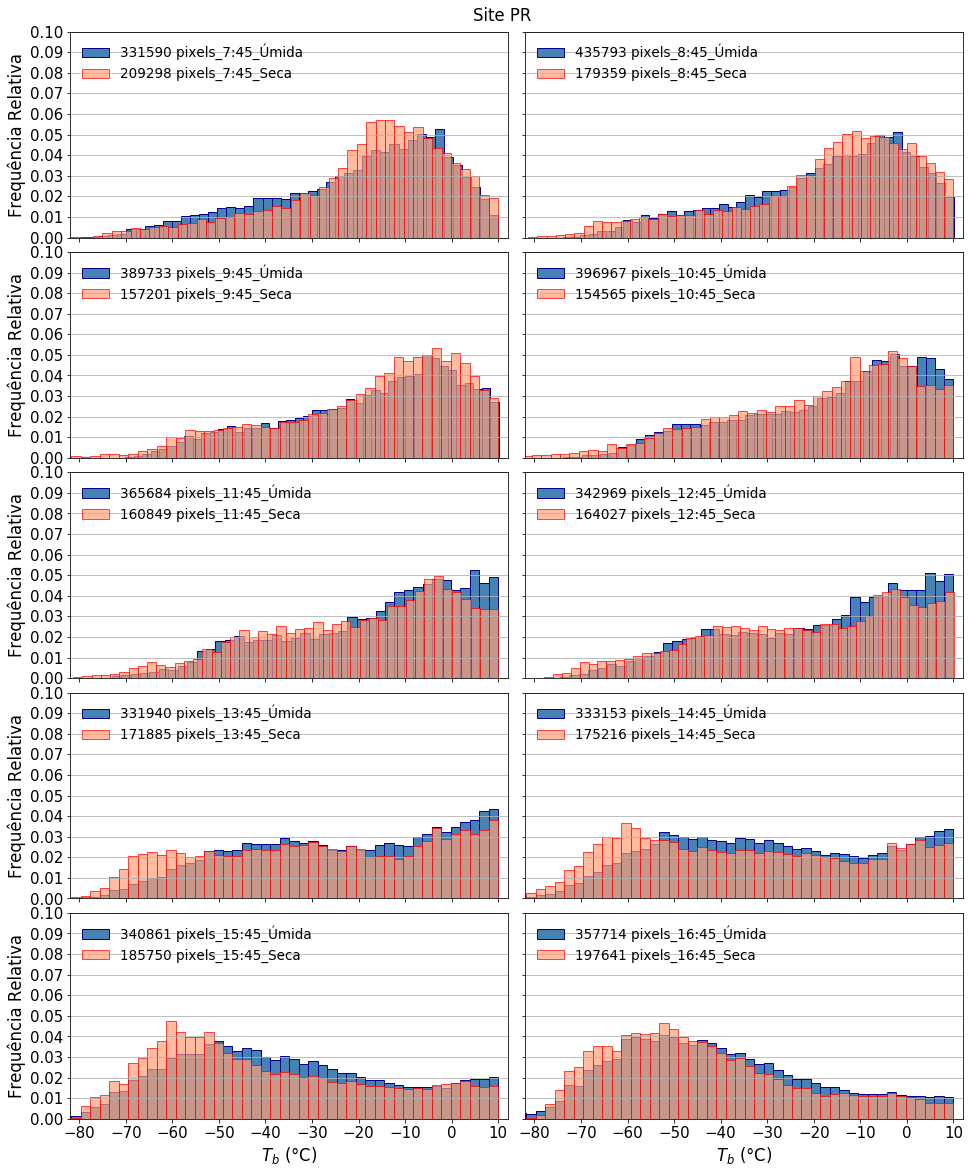

In [23]:
###################################### Hists Temp Site 1 #######################
numberofbins=47
yl = [0,0.10]
xl = [-82,12]
xyl = (xl[0], xl[1], yl[0], yl[1]) 
tam_eixos = 15
divis_eixos = 10
loc_legendas = 2
Y = 16
X = 20

# 7:45....
mymin7_s0_u=min([min(temp_U11_s0_um)])
mymax7_s0_u=max([max(temp_U11_s0_um)])
xbins7_s0_u=np.linspace(mymin7_s0_u, mymax7_s0_u, numberofbins)
mymin7_s0_s=min([min(temp_U11_s0_se)])
mymax7_s0_s=max([max(temp_U11_s0_se)])
xbins7_s0_s=np.linspace(mymin7_s0_s, mymax7_s0_s, numberofbins)
# 8:45....
mymin8_s0_u=min([min(temp_U12_s0_um)])
mymax8_s0_u=max([max(temp_U12_s0_um)])
xbins8_s0_u=np.linspace(mymin8_s0_u, mymax8_s0_u, numberofbins)
mymin8_s0_s=min([min(temp_U12_s0_se)])
mymax8_s0_s=max([max(temp_U12_s0_se)])
xbins8_s0_s=np.linspace(mymin8_s0_s, mymax8_s0_s, numberofbins)
# 9:45....
mymin9_s0_u=min([min(temp_U13_s0_um)])
mymax9_s0_u=max([max(temp_U13_s0_um)])
xbins9_s0_u=np.linspace(mymin9_s0_u, mymax9_s0_u, numberofbins)
mymin9_s0_s=min([min(temp_U13_s0_se)])
mymax9_s0_s=max([max(temp_U13_s0_se)])
xbins9_s0_s=np.linspace(mymin9_s0_s, mymax9_s0_s, numberofbins)
# 10:45....
mymin10_s0_u=min([min(temp_U14_s0_um)])
mymax10_s0_u=max([max(temp_U14_s0_um)])
xbins10_s0_u=np.linspace(mymin10_s0_u, mymax10_s0_u, numberofbins)
mymin10_s0_s=min([min(temp_U14_s0_se)])
mymax10_s0_s=max([max(temp_U14_s0_se)])
xbins10_s0_s=np.linspace(mymin10_s0_s, mymax10_s0_s, numberofbins)
# 11:45....
mymin11_s0_u=min([min(temp_U15_s0_um)])
mymax11_s0_u=max([max(temp_U15_s0_um)])
xbins11_s0_u=np.linspace(mymin11_s0_u, mymax11_s0_u, numberofbins)
mymin11_s0_s=min([min(temp_U15_s0_se)])
mymax11_s0_s=max([max(temp_U15_s0_se)])
xbins11_s0_s=np.linspace(mymin11_s0_s, mymax11_s0_s, numberofbins)
# 12:45....
mymin12_s0_u=min([min(temp_U16_s0_um)])
mymax12_s0_u=max([max(temp_U16_s0_um)])
xbins12_s0_u=np.linspace(mymin12_s0_u, mymax12_s0_u, numberofbins)
mymin12_s0_s=min([min(temp_U16_s0_se)])
mymax12_s0_s=max([max(temp_U16_s0_se)])
xbins12_s0_s=np.linspace(mymin12_s0_s, mymax12_s0_s, numberofbins)
# 13:45....
mymin13_s0_u=min([min(temp_U17_s0_um)])
mymax13_s0_u=max([max(temp_U17_s0_um)])
xbins13_s0_u=np.linspace(mymin13_s0_u, mymax13_s0_u, numberofbins)
mymin13_s0_s=min([min(temp_U17_s0_se)])
mymax13_s0_s=max([max(temp_U17_s0_se)])
xbins13_s0_s=np.linspace(mymin13_s0_s, mymax13_s0_s, numberofbins)
# 14:45....
mymin14_s0_u=min([min(temp_U18_s0_um)])
mymax14_s0_u=max([max(temp_U18_s0_um)])
xbins14_s0_u=np.linspace(mymin14_s0_u, mymax14_s0_u, numberofbins)
mymin14_s0_s=min([min(temp_U18_s0_se)])
mymax14_s0_s=max([max(temp_U18_s0_se)])
xbins14_s0_s=np.linspace(mymin14_s0_s, mymax14_s0_s, numberofbins)
# 15:45....
mymin15_s0_u=min([min(temp_U19_s0_um)])
mymax15_s0_u=max([max(temp_U19_s0_um)])
xbins15_s0_u=np.linspace(mymin15_s0_u, mymax15_s0_u, numberofbins)
mymin15_s0_s=min([min(temp_U19_s0_se)])
mymax15_s0_s=max([max(temp_U19_s0_se)])
xbins15_s0_s=np.linspace(mymin15_s0_s, mymax15_s0_s, numberofbins)
# 16:45....
mymin16_s0_u=min([min(temp_U20_s0_um)])
mymax16_s0_u=max([max(temp_U20_s0_um)])
xbins16_s0_u=np.linspace(mymin16_s0_u, mymax16_s0_u, numberofbins)
mymin16_s0_s=min([min(temp_U20_s0_se)])
mymax16_s0_s=max([max(temp_U20_s0_se)])
xbins16_s0_s=np.linspace(mymin16_s0_s, mymax16_s0_s, numberofbins)

# Histograma de freq. absoluta para 7:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax7_u = plt.subplot(5, 2, 1)
y7_u, bins7_u, patches7_u = ax7_u.hist(temp_U11_s0_um, bins=xbins7_s0_u, normed=False, alpha=1, cumulative=0)        
y7_u=y7_u/(y7_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax7_s = plt.subplot(5, 2, 1)
y7_s, bins7_s, patches7_s = ax7_s.hist(temp_U11_s0_se, bins=xbins7_s0_s, normed=False, alpha=1, cumulative=0)        
y7_s=y7_s/(y7_s.sum())
plt.clf()
# Histograma de freq. absoluta para 8:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax8_u = plt.subplot(5, 2, 2)
y8_u, bins8_u, patches8_u = ax8_u.hist(temp_U12_s0_um, bins=xbins8_s0_u, normed=False, alpha=1, cumulative=0)        
y8_u=y8_u/(y8_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax8_s = plt.subplot(5, 2, 2)
y8_s, bins8_s, patches8_s = ax8_s.hist(temp_U12_s0_se, bins=xbins8_s0_s, normed=False, alpha=1, cumulative=0)        
y8_s=y8_s/(y8_s.sum())
plt.clf()
# Histograma de freq. absoluta para 9:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax9_u = plt.subplot(5, 2, 3)
y9_u, bins9_u, patches9_u = ax9_u.hist(temp_U13_s0_um, bins=xbins9_s0_u, normed=False, alpha=1, cumulative=0)        
y9_u=y9_u/(y9_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax9_s = plt.subplot(5, 2, 3)
y9_s, bins9_s, patches9_s = ax9_s.hist(temp_U13_s0_se, bins=xbins9_s0_s, normed=False, alpha=1, cumulative=0)        
y9_s=y9_s/(y9_s.sum())
plt.clf()
# Histograma de freq. absoluta para 10:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax10_u = plt.subplot(5, 2, 4)
y10_u, bins10_u, patches10_u = ax10_u.hist(temp_U14_s0_um, bins=xbins10_s0_u, normed=False, alpha=1, cumulative=0)        
y10_u=y10_u/(y10_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax10_s = plt.subplot(5, 2, 4)
y10_s, bins10_s, patches10_s = ax10_s.hist(temp_U14_s0_se, bins=xbins10_s0_s, normed=False, alpha=1, cumulative=0)        
y10_s=y10_s/(y10_s.sum())
plt.clf()
# Histograma de freq. absoluta para 11:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax11_u = plt.subplot(5, 2, 5)
y11_u, bins11_u, patches11_u = ax11_u.hist(temp_U15_s0_um, bins=xbins11_s0_u, normed=False, alpha=1, cumulative=0)        
y11_u=y11_u/(y11_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax11_s = plt.subplot(5, 2, 5)
y11_s, bins11_s, patches11_s = ax11_s.hist(temp_U15_s0_se, bins=xbins11_s0_s, normed=False, alpha=1, cumulative=0)        
y11_s=y11_s/(y11_s.sum())
plt.clf()
# Histograma de freq. absoluta para 12:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax12_u = plt.subplot(5, 2, 6)
y12_u, bins12_u, patches12_u = ax12_u.hist(temp_U16_s0_um, bins=xbins12_s0_u, normed=False, alpha=1, cumulative=0)        
y12_u=y12_u/(y12_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax12_s = plt.subplot(5, 2, 6)
y12_s, bins12_s, patches12_s = ax12_s.hist(temp_U16_s0_se, bins=xbins12_s0_s, normed=False, alpha=1, cumulative=0)        
y12_s=y12_s/(y12_s.sum())
plt.clf()
# Histograma de freq. absoluta para 13:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax13_u = plt.subplot(5, 2, 7)
y13_u, bins13_u, patches13_u = ax13_u.hist(temp_U17_s0_um, bins=xbins13_s0_u, normed=False, alpha=1, cumulative=0)        
y13_u=y13_u/(y13_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax13_s = plt.subplot(5, 2, 7)
y13_s, bins13_s, patches13_s = ax13_s.hist(temp_U17_s0_se, bins=xbins13_s0_s, normed=False, alpha=1, cumulative=0)        
y13_s=y13_s/(y13_s.sum())
plt.clf()
# Histograma de freq. absoluta para 14:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax14_u = plt.subplot(5, 2, 8)
y14_u, bins14_u, patches14_u = ax14_u.hist(temp_U18_s0_um, bins=xbins14_s0_u, normed=False, alpha=1, cumulative=0)        
y14_u=y14_u/(y14_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax14_s = plt.subplot(5, 2, 8)
y14_s, bins14_s, patches14_s = ax14_s.hist(temp_U18_s0_se, bins=xbins14_s0_s, normed=False, alpha=1, cumulative=0)        
y14_s=y14_s/(y14_s.sum())
plt.clf()
# Histograma de freq. absoluta para 15:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax15_u = plt.subplot(5, 2, 9)
y15_u, bins15_u, patches15_u = ax15_u.hist(temp_U19_s0_um, bins=xbins15_s0_u, normed=False, alpha=1, cumulative=0)        
y15_u=y15_u/(y15_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax15_s = plt.subplot(5, 2, 9)
y15_s, bins15_s, patches15_s = ax15_s.hist(temp_U19_s0_se, bins=xbins15_s0_s, normed=False, alpha=1, cumulative=0)        
y15_s=y15_s/(y15_s.sum())
plt.clf()
# Histograma de freq. absoluta para 16:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax16_u = plt.subplot(5, 2, 10)
y16_u, bins16_u, patches16_u = ax16_u.hist(temp_U20_s0_um, bins=xbins16_s0_u, normed=False, alpha=1, cumulative=0)        
y16_u=y16_u/(y16_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax16_s = plt.subplot(5, 2, 10)
y16_s, bins16_s, patches16_s = ax16_s.hist(temp_U20_s0_se, bins=xbins16_s0_s, normed=False, alpha=1, cumulative=0)        
y16_s=y16_s/(y16_s.sum())
plt.clf()

# Colocando o título na figura toda
fig.suptitle('Site '+str(sites[0]), fontsize=tam_eixos+1.5, y='0.897')
fig.subplots_adjust(wspace=0.04, hspace=0.07)

# Histograma de freq. relativa para 7:45....
fig = plt.figure(1, figsize=(Y,X))
ax7_u = plt.subplot(5, 2, 1)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
ax7_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax7_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
plt.bar(bins7_u[:-1], y7_u, bins7_u[1]-bins7_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_7:45_Úmida'.format(len(temp_U11_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins7_s[:-1], y7_s, bins7_s[1]-bins7_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_7:45_Seca'.format(len(temp_U11_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax7_u.grid(True, axis='y')
ax7_u.set_xticklabels([])

# Histograma de freq. relativa para 8:45....
fig = plt.figure(1, figsize=(Y,X))
ax8_u = plt.subplot(5, 2, 2)
plt.axis(xyl)
ax8_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax8_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
plt.bar(bins8_u[:-1], y8_u, bins8_u[1]-bins8_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_8:45_Úmida'.format(len(temp_U12_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins8_s[:-1], y8_s, bins8_s[1]-bins8_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_8:45_Seca'.format(len(temp_U12_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax8_u.grid(True, axis='y')
ax8_u.set_xticklabels([])
ax8_u.set_yticklabels([])

# Histograma de freq. relativa para 9:45....
fig = plt.figure(1, figsize=(Y,X))
ax9_u = plt.subplot(5, 2, 3)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
ax9_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax9_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
plt.bar(bins9_u[:-1], y9_u, bins9_u[1]-bins9_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_9:45_Úmida'.format(len(temp_U13_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins9_s[:-1], y9_s, bins9_s[1]-bins9_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_9:45_Seca'.format(len(temp_U13_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax9_u.grid(True, axis='y')
ax9_u.set_xticklabels([])

# Histograma de freq. relativa para 10:45....
fig = plt.figure(1, figsize=(Y,X))
ax10_u = plt.subplot(5, 2, 4)
plt.axis(xyl)
ax10_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax10_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
plt.bar(bins10_u[:-1], y10_u, bins10_u[1]-bins10_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_10:45_Úmida'.format(len(temp_U14_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins10_s[:-1], y10_s, bins10_s[1]-bins10_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_10:45_Seca'.format(len(temp_U14_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax10_u.grid(True, axis='y')
ax10_u.set_xticklabels([])
ax10_u.set_yticklabels([])

# Histograma de freq. relativa para 11:45....
fig = plt.figure(1, figsize=(Y,X))
ax11_u = plt.subplot(5, 2, 5)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
ax11_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax11_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
plt.bar(bins11_u[:-1], y11_u, bins11_u[1]-bins11_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_11:45_Úmida'.format(len(temp_U15_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins11_s[:-1], y11_s, bins11_s[1]-bins11_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_11:45_Seca'.format(len(temp_U15_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax11_u.grid(True, axis='y')
ax11_u.set_xticklabels([])

# Histograma de freq. relativa para 12:45....
fig = plt.figure(1, figsize=(Y,X))
ax12_u = plt.subplot(5, 2, 6)
plt.axis(xyl)
ax12_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax12_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
plt.bar(bins12_u[:-1], y12_u, bins12_u[1]-bins12_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_12:45_Úmida'.format(len(temp_U16_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins12_s[:-1], y12_s, bins12_s[1]-bins12_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_12:45_Seca'.format(len(temp_U16_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax12_u.grid(True, axis='y')
ax12_u.set_xticklabels([])
ax12_u.set_yticklabels([])

# Histograma de freq. relativa para 13:45....
fig = plt.figure(1, figsize=(Y,X))
ax13_u = plt.subplot(5, 2, 7)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
ax13_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax13_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
plt.bar(bins13_u[:-1], y13_u, bins13_u[1]-bins13_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_13:45_Úmida'.format(len(temp_U17_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins13_s[:-1], y13_s, bins13_s[1]-bins13_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_13:45_Seca'.format(len(temp_U17_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax13_u.grid(True, axis='y')
ax13_u.set_xticklabels([])

# Histograma de freq. relativa para 14:45....
fig = plt.figure(1, figsize=(Y,X))
ax14_u = plt.subplot(5, 2, 8)
plt.axis(xyl)
ax14_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax14_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
plt.bar(bins14_u[:-1], y14_u, bins14_u[1]-bins14_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_14:45_Úmida'.format(len(temp_U18_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins14_s[:-1], y14_s, bins14_s[1]-bins14_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_14:45_Seca'.format(len(temp_U18_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax14_u.grid(True, axis='y')
ax14_u.set_xticklabels([])
ax14_u.set_yticklabels([])

# Histograma de freq. relativa para 15:45....
fig = plt.figure(1, figsize=(Y,X))
ax15_u = plt.subplot(5, 2, 9)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.xticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
plt.xlabel('$T_b$ ($\degree$C)', fontsize=tam_eixos+1.5)
ax15_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax15_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
plt.bar(bins15_u[:-1], y15_u, bins15_u[1]-bins15_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_15:45_Úmida'.format(len(temp_U19_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins15_s[:-1], y15_s, bins15_s[1]-bins15_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_15:45_Seca'.format(len(temp_U19_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax15_u.grid(True, axis='y')

# Histograma de freq. relativa para 16:45....
fig = plt.figure(1, figsize=(Y,X))
ax16_u = plt.subplot(5, 2, 10)
plt.axis(xyl)
plt.xticks(fontsize=tam_eixos)
plt.xlabel('$T_b$ ($\degree$C)', fontsize=tam_eixos+1.5)
ax16_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax16_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
plt.bar(bins16_u[:-1], y16_u, bins16_u[1]-bins16_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_16:45_Úmida'.format(len(temp_U20_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins16_s[:-1], y16_s, bins16_s[1]-bins16_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_16:45_Seca'.format(len(temp_U20_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax16_u.grid(True, axis='y')
ax16_u.set_yticklabels([])

fig.savefig('/home/andre/Desktop/Resultados_3/Plotagens/Hists_temp_'+str(sites[0])+'.png', 
            orientation='landscape', bbox_inches='tight', dpi=100)
# plt.close(fig)

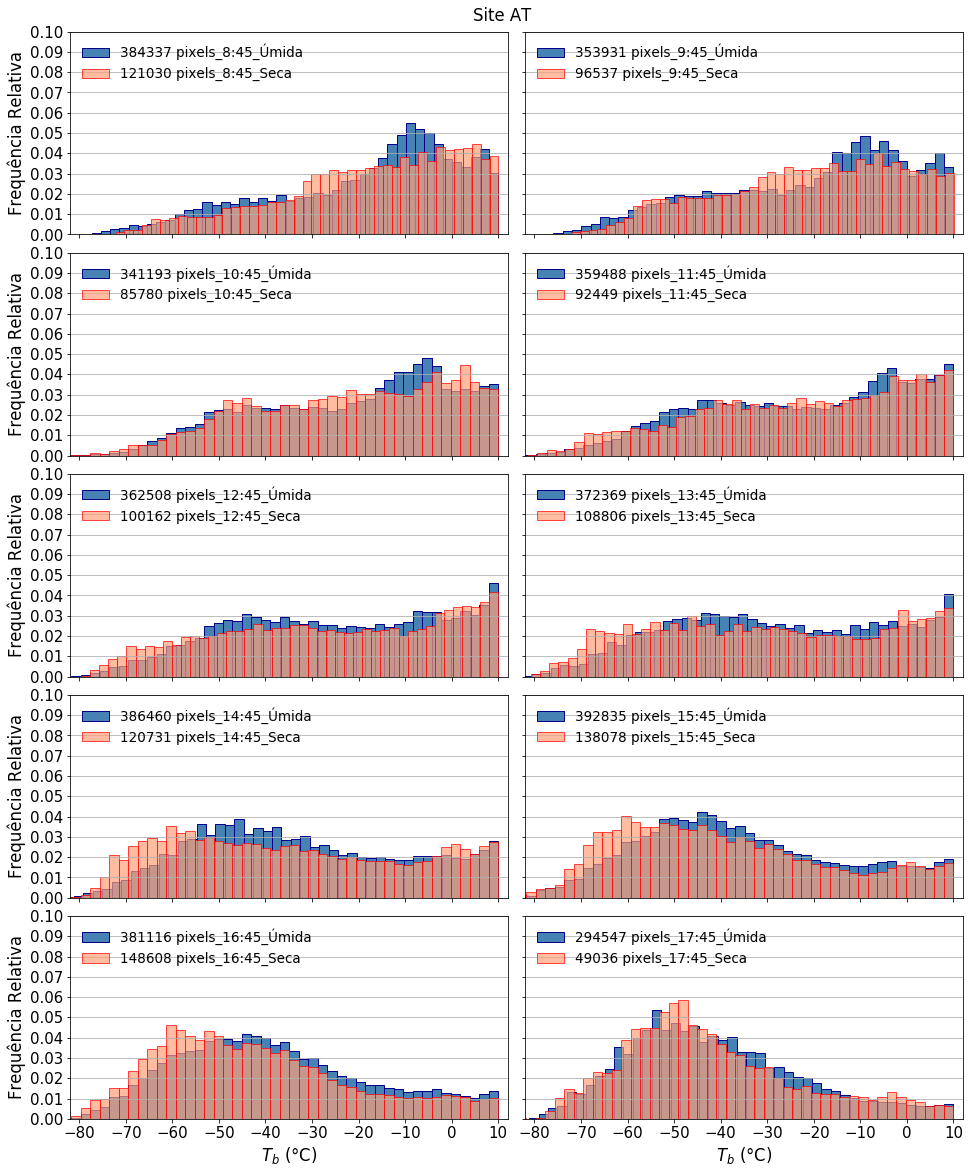

In [24]:
###################################### Hists Temp Site 2 #######################
numberofbins=47
yl = [0,0.10]
xl = [-82,12]
xyl = (xl[0], xl[1], yl[0], yl[1])  
tam_eixos = 15
divis_eixos = 10
loc_legendas = 2
Y = 16
X = 20

# 8:45....
mymin7_s1_u=min([min(temp_U11_s1_um)])
mymax7_s1_u=max([max(temp_U11_s1_um)])
xbins7_s1_u=np.linspace(mymin7_s1_u, mymax7_s1_u, numberofbins)
mymin7_s1_s=min([min(temp_U11_s1_se)])
mymax7_s1_s=max([max(temp_U11_s1_se)])
xbins7_s1_s=np.linspace(mymin7_s1_s, mymax7_s1_s, numberofbins)
# 9:45....
mymin8_s1_u=min([min(temp_U12_s1_um)])
mymax8_s1_u=max([max(temp_U12_s1_um)])
xbins8_s1_u=np.linspace(mymin8_s1_u, mymax8_s1_u, numberofbins)
mymin8_s1_s=min([min(temp_U12_s1_se)])
mymax8_s1_s=max([max(temp_U12_s1_se)])
xbins8_s1_s=np.linspace(mymin8_s1_s, mymax8_s1_s, numberofbins)
# 10:45....
mymin9_s1_u=min([min(temp_U13_s1_um)])
mymax9_s1_u=max([max(temp_U13_s1_um)])
xbins9_s1_u=np.linspace(mymin9_s1_u, mymax9_s1_u, numberofbins)
mymin9_s1_s=min([min(temp_U13_s1_se)])
mymax9_s1_s=max([max(temp_U13_s1_se)])
xbins9_s1_s=np.linspace(mymin9_s1_s, mymax9_s1_s, numberofbins)
# 11:45....
mymin10_s1_u=min([min(temp_U14_s1_um)])
mymax10_s1_u=max([max(temp_U14_s1_um)])
xbins10_s1_u=np.linspace(mymin10_s1_u, mymax10_s1_u, numberofbins)
mymin10_s1_s=min([min(temp_U14_s1_se)])
mymax10_s1_s=max([max(temp_U14_s1_se)])
xbins10_s1_s=np.linspace(mymin10_s1_s, mymax10_s1_s, numberofbins)
# 12:45....
mymin11_s1_u=min([min(temp_U15_s1_um)])
mymax11_s1_u=max([max(temp_U15_s1_um)])
xbins11_s1_u=np.linspace(mymin11_s1_u, mymax11_s1_u, numberofbins)
mymin11_s1_s=min([min(temp_U15_s1_se)])
mymax11_s1_s=max([max(temp_U15_s1_se)])
xbins11_s1_s=np.linspace(mymin11_s1_s, mymax11_s1_s, numberofbins)
# 13:45....
mymin12_s1_u=min([min(temp_U16_s1_um)])
mymax12_s1_u=max([max(temp_U16_s1_um)])
xbins12_s1_u=np.linspace(mymin12_s1_u, mymax12_s1_u, numberofbins)
mymin12_s1_s=min([min(temp_U16_s1_se)])
mymax12_s1_s=max([max(temp_U16_s1_se)])
xbins12_s1_s=np.linspace(mymin12_s1_s, mymax12_s1_s, numberofbins)
# 14:45....
mymin13_s1_u=min([min(temp_U17_s1_um)])
mymax13_s1_u=max([max(temp_U17_s1_um)])
xbins13_s1_u=np.linspace(mymin13_s1_u, mymax13_s1_u, numberofbins)
mymin13_s1_s=min([min(temp_U17_s1_se)])
mymax13_s1_s=max([max(temp_U17_s1_se)])
xbins13_s1_s=np.linspace(mymin13_s1_s, mymax13_s1_s, numberofbins)
# 15:45....
mymin14_s1_u=min([min(temp_U18_s1_um)])
mymax14_s1_u=max([max(temp_U18_s1_um)])
xbins14_s1_u=np.linspace(mymin14_s1_u, mymax14_s1_u, numberofbins)
mymin14_s1_s=min([min(temp_U18_s1_se)])
mymax14_s1_s=max([max(temp_U18_s1_se)])
xbins14_s1_s=np.linspace(mymin14_s1_s, mymax14_s1_s, numberofbins)
# 16:45....
mymin15_s1_u=min([min(temp_U19_s1_um)])
mymax15_s1_u=max([max(temp_U19_s1_um)])
xbins15_s1_u=np.linspace(mymin15_s1_u, mymax15_s1_u, numberofbins)
mymin15_s1_s=min([min(temp_U19_s1_se)])
mymax15_s1_s=max([max(temp_U19_s1_se)])
xbins15_s1_s=np.linspace(mymin15_s1_s, mymax15_s1_s, numberofbins)
# 17:45....
mymin16_s1_u=min([min(temp_U20_s1_um)])
mymax16_s1_u=max([max(temp_U20_s1_um)])
xbins16_s1_u=np.linspace(mymin16_s1_u, mymax16_s1_u, numberofbins)
if len(temp_U20_s1_se) == 0:
    mymin16_s1_s=0
    mymax16_s1_s=0
else:
    mymin16_s1_s=min([min(temp_U20_s1_se)])
    mymax16_s1_s=max([max(temp_U20_s1_se)])
xbins16_s1_s=np.linspace(mymin16_s1_s, mymax16_s1_s, numberofbins)

# Histograma de freq. absoluta para 8:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax7_u = plt.subplot(5, 2, 1)
y7_u, bins7_u, patches7_u = ax7_u.hist(temp_U11_s1_um, bins=xbins7_s1_u, normed=False, alpha=1, cumulative=0)        
y7_u=y7_u/(y7_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax7_s = plt.subplot(5, 2, 1)
y7_s, bins7_s, patches7_s = ax7_s.hist(temp_U11_s1_se, bins=xbins7_s1_s, normed=False, alpha=1, cumulative=0)        
y7_s=y7_s/(y7_s.sum())
plt.clf()
# Histograma de freq. absoluta para 9:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax8_u = plt.subplot(5, 2, 2)
y8_u, bins8_u, patches8_u = ax8_u.hist(temp_U12_s1_um, bins=xbins8_s1_u, normed=False, alpha=1, cumulative=0)        
y8_u=y8_u/(y8_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax8_s = plt.subplot(5, 2, 2)
y8_s, bins8_s, patches8_s = ax8_s.hist(temp_U12_s1_se, bins=xbins8_s1_s, normed=False, alpha=1, cumulative=0)        
y8_s=y8_s/(y8_s.sum())
plt.clf()
# Histograma de freq. absoluta para 10:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax9_u = plt.subplot(5, 2, 3)
y9_u, bins9_u, patches9_u = ax9_u.hist(temp_U13_s1_um, bins=xbins9_s1_u, normed=False, alpha=1, cumulative=0)        
y9_u=y9_u/(y9_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax9_s = plt.subplot(5, 2, 3)
y9_s, bins9_s, patches9_s = ax9_s.hist(temp_U13_s1_se, bins=xbins9_s1_s, normed=False, alpha=1, cumulative=0)        
y9_s=y9_s/(y9_s.sum())
plt.clf()
# Histograma de freq. absoluta para 11:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax10_u = plt.subplot(5, 2, 4)
y10_u, bins10_u, patches10_u = ax10_u.hist(temp_U14_s1_um, bins=xbins10_s1_u, normed=False, alpha=1, cumulative=0)        
y10_u=y10_u/(y10_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax10_s = plt.subplot(5, 2, 4)
y10_s, bins10_s, patches10_s = ax10_s.hist(temp_U14_s1_se, bins=xbins10_s1_s, normed=False, alpha=1, cumulative=0)        
y10_s=y10_s/(y10_s.sum())
plt.clf()
# Histograma de freq. absoluta para 12:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax11_u = plt.subplot(5, 2, 5)
y11_u, bins11_u, patches11_u = ax11_u.hist(temp_U15_s1_um, bins=xbins11_s1_u, normed=False, alpha=1, cumulative=0)        
y11_u=y11_u/(y11_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax11_s = plt.subplot(5, 2, 5)
y11_s, bins11_s, patches11_s = ax11_s.hist(temp_U15_s1_se, bins=xbins11_s1_s, normed=False, alpha=1, cumulative=0)        
y11_s=y11_s/(y11_s.sum())
plt.clf()
# Histograma de freq. absoluta para 13:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax12_u = plt.subplot(5, 2, 6)
y12_u, bins12_u, patches12_u = ax12_u.hist(temp_U16_s1_um, bins=xbins12_s1_u, normed=False, alpha=1, cumulative=0)        
y12_u=y12_u/(y12_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax12_s = plt.subplot(5, 2, 6)
y12_s, bins12_s, patches12_s = ax12_s.hist(temp_U16_s1_se, bins=xbins12_s1_s, normed=False, alpha=1, cumulative=0)        
y12_s=y12_s/(y12_s.sum())
plt.clf()
# Histograma de freq. absoluta para 14:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax13_u = plt.subplot(5, 2, 7)
y13_u, bins13_u, patches13_u = ax13_u.hist(temp_U17_s1_um, bins=xbins13_s1_u, normed=False, alpha=1, cumulative=0)        
y13_u=y13_u/(y13_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax13_s = plt.subplot(5, 2, 7)
y13_s, bins13_s, patches13_s = ax13_s.hist(temp_U17_s1_se, bins=xbins13_s1_s, normed=False, alpha=1, cumulative=0)        
y13_s=y13_s/(y13_s.sum())
plt.clf()
# Histograma de freq. absoluta para 15:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax14_u = plt.subplot(5, 2, 8)
y14_u, bins14_u, patches14_u = ax14_u.hist(temp_U18_s1_um, bins=xbins14_s1_u, normed=False, alpha=1, cumulative=0)        
y14_u=y14_u/(y14_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax14_s = plt.subplot(5, 2, 8)
y14_s, bins14_s, patches14_s = ax14_s.hist(temp_U18_s1_se, bins=xbins14_s1_s, normed=False, alpha=1, cumulative=0)        
y14_s=y14_s/(y14_s.sum())
plt.clf()
# Histograma de freq. absoluta para 16:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax15_u = plt.subplot(5, 2, 9)
y15_u, bins15_u, patches15_u = ax15_u.hist(temp_U19_s1_um, bins=xbins15_s1_u, normed=False, alpha=1, cumulative=0)        
y15_u=y15_u/(y15_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax15_s = plt.subplot(5, 2, 9)
y15_s, bins15_s, patches15_s = ax15_s.hist(temp_U19_s1_se, bins=xbins15_s1_s, normed=False, alpha=1, cumulative=0)        
y15_s=y15_s/(y15_s.sum())
plt.clf()
# Histograma de freq. absoluta para 17:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax16_u = plt.subplot(5, 2, 10)
y16_u, bins16_u, patches16_u = ax16_u.hist(temp_U20_s1_um, bins=xbins16_s1_u, normed=False, alpha=1, cumulative=0)        
y16_u=y16_u/(y16_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax16_s = plt.subplot(5, 2, 10)
y16_s, bins16_s, patches16_s = ax16_s.hist(temp_U20_s1_se, bins=xbins16_s1_s, normed=False, alpha=1, cumulative=0)        
y16_s=y16_s/(y16_s.sum())
plt.clf()

# Colocando o título na figura toda
fig.suptitle('Site '+str(sites[1]), fontsize=tam_eixos+1.5, y='0.897')
fig.subplots_adjust(wspace=0.04, hspace=0.09)

# Histograma de freq. relativa para 8:45....
fig = plt.figure(1, figsize=(Y,X))
ax7_u = plt.subplot(5, 2, 1)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
ax7_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax7_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
plt.bar(bins7_u[:-1], y7_u, bins7_u[1]-bins7_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_8:45_Úmida'.format(len(temp_U11_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins7_s[:-1], y7_s, bins7_s[1]-bins7_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_8:45_Seca'.format(len(temp_U11_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax7_u.grid(True, axis='y')
ax7_u.set_xticklabels([])

# Histograma de freq. relativa para 9:45....
fig = plt.figure(1, figsize=(Y,X))
ax8_u = plt.subplot(5, 2, 2)
plt.axis(xyl)
ax8_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax8_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
plt.bar(bins8_u[:-1], y8_u, bins8_u[1]-bins8_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_9:45_Úmida'.format(len(temp_U12_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins8_s[:-1], y8_s, bins8_s[1]-bins8_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_9:45_Seca'.format(len(temp_U12_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax8_u.grid(True, axis='y')
ax8_u.set_xticklabels([])
ax8_u.set_yticklabels([])

# Histograma de freq. relativa para 10:45....
fig = plt.figure(1, figsize=(Y,X))
ax9_u = plt.subplot(5, 2, 3)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
ax9_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax9_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
plt.bar(bins9_u[:-1], y9_u, bins9_u[1]-bins9_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_10:45_Úmida'.format(len(temp_U13_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins9_s[:-1], y9_s, bins9_s[1]-bins9_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_10:45_Seca'.format(len(temp_U13_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax9_u.grid(True, axis='y')
ax9_u.set_xticklabels([])

# Histograma de freq. relativa para 11:45....
fig = plt.figure(1, figsize=(Y,X))
ax10_u = plt.subplot(5, 2, 4)
plt.axis(xyl)
ax10_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax10_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
plt.bar(bins10_u[:-1], y10_u, bins10_u[1]-bins10_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_11:45_Úmida'.format(len(temp_U14_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins10_s[:-1], y10_s, bins10_s[1]-bins10_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_11:45_Seca'.format(len(temp_U14_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax10_u.grid(True, axis='y')
ax10_u.set_xticklabels([])
ax10_u.set_yticklabels([])

# Histograma de freq. relativa para 12:45....
fig = plt.figure(1, figsize=(Y,X))
ax11_u = plt.subplot(5, 2, 5)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
ax11_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax11_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
plt.bar(bins11_u[:-1], y11_u, bins11_u[1]-bins11_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_12:45_Úmida'.format(len(temp_U15_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins11_s[:-1], y11_s, bins11_s[1]-bins11_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_12:45_Seca'.format(len(temp_U15_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax11_u.grid(True, axis='y')
ax11_u.set_xticklabels([])

# Histograma de freq. relativa para 13:45....
fig = plt.figure(1, figsize=(Y,X))
ax12_u = plt.subplot(5, 2, 6)
plt.axis(xyl)
ax12_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax12_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
plt.bar(bins12_u[:-1], y12_u, bins12_u[1]-bins12_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_13:45_Úmida'.format(len(temp_U16_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins12_s[:-1], y12_s, bins12_s[1]-bins12_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_13:45_Seca'.format(len(temp_U16_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax12_u.grid(True, axis='y')
ax12_u.set_xticklabels([])
ax12_u.set_yticklabels([])

# Histograma de freq. relativa para 14:45....
fig = plt.figure(1, figsize=(Y,X))
ax13_u = plt.subplot(5, 2, 7)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
ax13_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax13_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
plt.bar(bins13_u[:-1], y13_u, bins13_u[1]-bins13_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_14:45_Úmida'.format(len(temp_U17_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins13_s[:-1], y13_s, bins13_s[1]-bins13_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_14:45_Seca'.format(len(temp_U17_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax13_u.grid(True, axis='y')
ax13_u.set_xticklabels([])

# Histograma de freq. relativa para 15:45....
fig = plt.figure(1, figsize=(Y,X))
ax14_u = plt.subplot(5, 2, 8)
plt.axis(xyl)
ax14_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax14_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
plt.bar(bins14_u[:-1], y14_u, bins14_u[1]-bins14_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_15:45_Úmida'.format(len(temp_U18_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins14_s[:-1], y14_s, bins14_s[1]-bins14_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_15:45_Seca'.format(len(temp_U18_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax14_u.grid(True, axis='y')
ax14_u.set_xticklabels([])
ax14_u.set_yticklabels([])

# Histograma de freq. relativa para 16:45....
fig = plt.figure(1, figsize=(Y,X))
ax15_u = plt.subplot(5, 2, 9)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.xticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
plt.xlabel('$T_b$ ($\degree$C)', fontsize=tam_eixos+1.5)
ax15_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax15_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
plt.bar(bins15_u[:-1], y15_u, bins15_u[1]-bins15_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_16:45_Úmida'.format(len(temp_U19_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins15_s[:-1], y15_s, bins15_s[1]-bins15_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_16:45_Seca'.format(len(temp_U19_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax15_u.grid(True, axis='y')

# Histograma de freq. relativa para 17:45....
fig = plt.figure(1, figsize=(Y,X))
ax16_u = plt.subplot(5, 2, 10)
plt.axis(xyl)
plt.xticks(fontsize=tam_eixos)
plt.xlabel('$T_b$ ($\degree$C)', fontsize=tam_eixos+1.5)
ax16_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax16_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
plt.bar(bins16_u[:-1], y16_u, bins16_u[1]-bins16_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_17:45_Úmida'.format(len(temp_U20_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
if len(temp_U20_s1_se) == 0:
    plt.plot((-90, 30), (0, 0), color='red', linewidth=0.9, 
             label=u'Não há pixels de nuvens às 17:45_Seca')
if len(temp_U20_s1_se) != 0:
    plt.bar(bins16_s[:-1], y16_s, bins16_s[1]-bins16_s[0], alpha=0.7, color='lightsalmon', 
            edgecolor='red', label=u'{} pixels_17:45_Seca'.format(len(temp_U20_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax16_u.grid(True, axis='y')
ax16_u.set_yticklabels([])

fig.savefig('/home/andre/Desktop/Resultados_3/Plotagens/Hists_temp_'+str(sites[1])+'.png', 
            orientation='landscape', bbox_inches='tight', dpi=100)
# plt.close(fig)

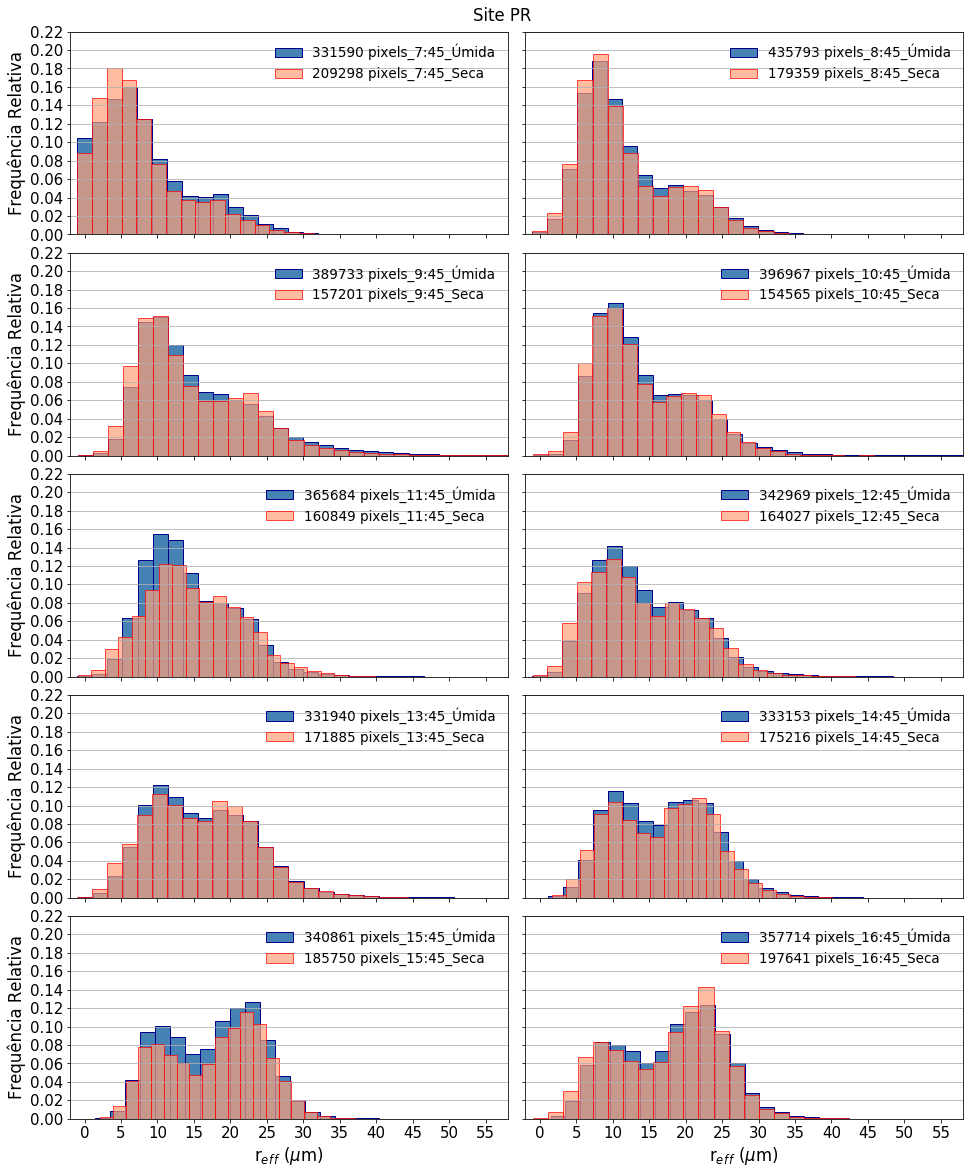

In [25]:
###################################### Hists reff Site 1 #######################
numberofbins=30
yl = [0,0.22]
xl = [-2,58]
xyl = (xl[0], xl[1], yl[0], yl[1]) 
tam_eixos = 15
divis_eixos = 12
loc_legendas = 1
Y = 16
X = 20

# 7:45....
mymin7_s0_u=min([min(reff_U11_s0_um)])
mymax7_s0_u=max([max(reff_U11_s0_um)])
xbins7_s0_u=np.linspace(mymin7_s0_u, mymax7_s0_u, numberofbins)
mymin7_s0_s=min([min(reff_U11_s0_se)])
mymax7_s0_s=max([max(reff_U11_s0_se)])
xbins7_s0_s=np.linspace(mymin7_s0_s, mymax7_s0_s, numberofbins)
# 8:45....
mymin8_s0_u=min([min(reff_U12_s0_um)])
mymax8_s0_u=max([max(reff_U12_s0_um)])
xbins8_s0_u=np.linspace(mymin8_s0_u, mymax8_s0_u, numberofbins)
mymin8_s0_s=min([min(reff_U12_s0_se)])
mymax8_s0_s=max([max(reff_U12_s0_se)])
xbins8_s0_s=np.linspace(mymin8_s0_s, mymax8_s0_s, numberofbins)
# 9:45....
mymin9_s0_u=min([min(reff_U13_s0_um)])
mymax9_s0_u=max([max(reff_U13_s0_um)])
xbins9_s0_u=np.linspace(mymin9_s0_u, mymax9_s0_u, numberofbins)
mymin9_s0_s=min([min(reff_U13_s0_se)])
mymax9_s0_s=max([max(reff_U13_s0_se)])
xbins9_s0_s=np.linspace(mymin9_s0_s, mymax9_s0_s, numberofbins)
# 10:45....
mymin10_s0_u=min([min(reff_U14_s0_um)])
mymax10_s0_u=max([max(reff_U14_s0_um)])
xbins10_s0_u=np.linspace(mymin10_s0_u, mymax10_s0_u, numberofbins)
mymin10_s0_s=min([min(reff_U14_s0_se)])
mymax10_s0_s=max([max(reff_U14_s0_se)])
xbins10_s0_s=np.linspace(mymin10_s0_s, mymax10_s0_s, numberofbins)
# 11:45....
mymin11_s0_u=min([min(reff_U15_s0_um)])
mymax11_s0_u=max([max(reff_U15_s0_um)])
xbins11_s0_u=np.linspace(mymin11_s0_u, mymax11_s0_u, numberofbins)
mymin11_s0_s=min([min(reff_U15_s0_se)])
mymax11_s0_s=max([max(reff_U15_s0_se)])
xbins11_s0_s=np.linspace(mymin11_s0_s, mymax11_s0_s, numberofbins)
# 12:45....
mymin12_s0_u=min([min(reff_U16_s0_um)])
mymax12_s0_u=max([max(reff_U16_s0_um)])
xbins12_s0_u=np.linspace(mymin12_s0_u, mymax12_s0_u, numberofbins)
mymin12_s0_s=min([min(reff_U16_s0_se)])
mymax12_s0_s=max([max(reff_U16_s0_se)])
xbins12_s0_s=np.linspace(mymin12_s0_s, mymax12_s0_s, numberofbins)
# 13:45....
mymin13_s0_u=min([min(reff_U17_s0_um)])
mymax13_s0_u=max([max(reff_U17_s0_um)])
xbins13_s0_u=np.linspace(mymin13_s0_u, mymax13_s0_u, numberofbins)
mymin13_s0_s=min([min(reff_U17_s0_se)])
mymax13_s0_s=max([max(reff_U17_s0_se)])
xbins13_s0_s=np.linspace(mymin13_s0_s, mymax13_s0_s, numberofbins)
# 14:45....
mymin14_s0_u=min([min(reff_U18_s0_um)])
mymax14_s0_u=max([max(reff_U18_s0_um)])
xbins14_s0_u=np.linspace(mymin14_s0_u, mymax14_s0_u, numberofbins)
mymin14_s0_s=min([min(reff_U18_s0_se)])
mymax14_s0_s=max([max(reff_U18_s0_se)])
xbins14_s0_s=np.linspace(mymin14_s0_s, mymax14_s0_s, numberofbins)
# 15:45....
mymin15_s0_u=min([min(reff_U19_s0_um)])
mymax15_s0_u=max([max(reff_U19_s0_um)])
xbins15_s0_u=np.linspace(mymin15_s0_u, mymax15_s0_u, numberofbins)
mymin15_s0_s=min([min(reff_U19_s0_se)])
mymax15_s0_s=max([max(reff_U19_s0_se)])
xbins15_s0_s=np.linspace(mymin15_s0_s, mymax15_s0_s, numberofbins)
# 16:45....
mymin16_s0_u=min([min(reff_U20_s0_um)])
mymax16_s0_u=max([max(reff_U20_s0_um)])
xbins16_s0_u=np.linspace(mymin16_s0_u, mymax16_s0_u, numberofbins)
mymin16_s0_s=min([min(reff_U20_s0_se)])
mymax16_s0_s=max([max(reff_U20_s0_se)])
xbins16_s0_s=np.linspace(mymin16_s0_s, mymax16_s0_s, numberofbins)

# Histograma de freq. absoluta para 7:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax7_u = plt.subplot(5, 2, 1)
y7_u, bins7_u, patches7_u = ax7_u.hist(reff_U11_s0_um, bins=xbins7_s0_u, normed=False, alpha=1, cumulative=0)        
y7_u=y7_u/(y7_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax7_s = plt.subplot(5, 2, 1)
y7_s, bins7_s, patches7_s = ax7_s.hist(reff_U11_s0_se, bins=xbins7_s0_s, normed=False, alpha=1, cumulative=0)        
y7_s=y7_s/(y7_s.sum())
plt.clf()
# Histograma de freq. absoluta para 8:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax8_u = plt.subplot(5, 2, 2)
y8_u, bins8_u, patches8_u = ax8_u.hist(reff_U12_s0_um, bins=xbins8_s0_u, normed=False, alpha=1, cumulative=0)        
y8_u=y8_u/(y8_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax8_s = plt.subplot(5, 2, 2)
y8_s, bins8_s, patches8_s = ax8_s.hist(reff_U12_s0_se, bins=xbins8_s0_s, normed=False, alpha=1, cumulative=0)        
y8_s=y8_s/(y8_s.sum())
plt.clf()
# Histograma de freq. absoluta para 9:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax9_u = plt.subplot(5, 2, 3)
y9_u, bins9_u, patches9_u = ax9_u.hist(reff_U13_s0_um, bins=xbins9_s0_u, normed=False, alpha=1, cumulative=0)        
y9_u=y9_u/(y9_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax9_s = plt.subplot(5, 2, 3)
y9_s, bins9_s, patches9_s = ax9_s.hist(reff_U13_s0_se, bins=xbins9_s0_s, normed=False, alpha=1, cumulative=0)        
y9_s=y9_s/(y9_s.sum())
plt.clf()
# Histograma de freq. absoluta para 10:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax10_u = plt.subplot(5, 2, 4)
y10_u, bins10_u, patches10_u = ax10_u.hist(reff_U14_s0_um, bins=xbins10_s0_u, normed=False, alpha=1, cumulative=0)        
y10_u=y10_u/(y10_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax10_s = plt.subplot(5, 2, 4)
y10_s, bins10_s, patches10_s = ax10_s.hist(reff_U14_s0_se, bins=xbins10_s0_s, normed=False, alpha=1, cumulative=0)        
y10_s=y10_s/(y10_s.sum())
plt.clf()
# Histograma de freq. absoluta para 11:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax11_u = plt.subplot(5, 2, 5)
y11_u, bins11_u, patches11_u = ax11_u.hist(reff_U15_s0_um, bins=xbins11_s0_u, normed=False, alpha=1, cumulative=0)        
y11_u=y11_u/(y11_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax11_s = plt.subplot(5, 2, 5)
y11_s, bins11_s, patches11_s = ax11_s.hist(reff_U15_s0_se, bins=xbins11_s0_s, normed=False, alpha=1, cumulative=0)        
y11_s=y11_s/(y11_s.sum())
plt.clf()
# Histograma de freq. absoluta para 12:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax12_u = plt.subplot(5, 2, 6)
y12_u, bins12_u, patches12_u = ax12_u.hist(reff_U16_s0_um, bins=xbins12_s0_u, normed=False, alpha=1, cumulative=0)        
y12_u=y12_u/(y12_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax12_s = plt.subplot(5, 2, 6)
y12_s, bins12_s, patches12_s = ax12_s.hist(reff_U16_s0_se, bins=xbins12_s0_s, normed=False, alpha=1, cumulative=0)        
y12_s=y12_s/(y12_s.sum())
plt.clf()
# Histograma de freq. absoluta para 13:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax13_u = plt.subplot(5, 2, 7)
y13_u, bins13_u, patches13_u = ax13_u.hist(reff_U17_s0_um, bins=xbins13_s0_u, normed=False, alpha=1, cumulative=0)        
y13_u=y13_u/(y13_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax13_s = plt.subplot(5, 2, 7)
y13_s, bins13_s, patches13_s = ax13_s.hist(reff_U17_s0_se, bins=xbins13_s0_s, normed=False, alpha=1, cumulative=0)        
y13_s=y13_s/(y13_s.sum())
plt.clf()
# Histograma de freq. absoluta para 14:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax14_u = plt.subplot(5, 2, 8)
y14_u, bins14_u, patches14_u = ax14_u.hist(reff_U18_s0_um, bins=xbins14_s0_u, normed=False, alpha=1, cumulative=0)        
y14_u=y14_u/(y14_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax14_s = plt.subplot(5, 2, 8)
y14_s, bins14_s, patches14_s = ax14_s.hist(reff_U18_s0_se, bins=xbins14_s0_s, normed=False, alpha=1, cumulative=0)        
y14_s=y14_s/(y14_s.sum())
plt.clf()
# Histograma de freq. absoluta para 15:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax15_u = plt.subplot(5, 2, 9)
y15_u, bins15_u, patches15_u = ax15_u.hist(reff_U19_s0_um, bins=xbins15_s0_u, normed=False, alpha=1, cumulative=0)        
y15_u=y15_u/(y15_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax15_s = plt.subplot(5, 2, 9)
y15_s, bins15_s, patches15_s = ax15_s.hist(reff_U19_s0_se, bins=xbins15_s0_s, normed=False, alpha=1, cumulative=0)        
y15_s=y15_s/(y15_s.sum())
plt.clf()
# Histograma de freq. absoluta para 16:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax16_u = plt.subplot(5, 2, 10)
y16_u, bins16_u, patches16_u = ax16_u.hist(reff_U20_s0_um, bins=xbins16_s0_u, normed=False, alpha=1, cumulative=0)        
y16_u=y16_u/(y16_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax16_s = plt.subplot(5, 2, 10)
y16_s, bins16_s, patches16_s = ax16_s.hist(reff_U20_s0_se, bins=xbins16_s0_s, normed=False, alpha=1, cumulative=0)        
y16_s=y16_s/(y16_s.sum())
plt.clf()

# Colocando o título na figura toda
fig.suptitle('Site '+str(sites[0]), fontsize=tam_eixos+1.5, y='0.897')
fig.subplots_adjust(wspace=0.04, hspace=0.09)

# Histograma de freq. relativa para 7:45....
fig = plt.figure(1, figsize=(Y,X))
ax7_u = plt.subplot(5, 2, 1)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
ax7_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax7_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-1))
plt.bar(bins7_u[:-1], y7_u, bins7_u[1]-bins7_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_7:45_Úmida'.format(len(reff_U11_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins7_s[:-1], y7_s, bins7_s[1]-bins7_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_7:45_Seca'.format(len(reff_U11_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax7_u.grid(True, axis='y')
ax7_u.set_xticklabels([])

# Histograma de freq. relativa para 8:45....
fig = plt.figure(1, figsize=(Y,X))
ax8_u = plt.subplot(5, 2, 2)
plt.axis(xyl)
ax8_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax8_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-1))
plt.bar(bins8_u[:-1], y8_u, bins8_u[1]-bins8_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_8:45_Úmida'.format(len(reff_U12_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins8_s[:-1], y8_s, bins8_s[1]-bins8_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_8:45_Seca'.format(len(reff_U12_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax8_u.grid(True, axis='y')
ax8_u.set_xticklabels([])
ax8_u.set_yticklabels([])

# Histograma de freq. relativa para 9:45....
fig = plt.figure(1, figsize=(Y,X))
ax9_u = plt.subplot(5, 2, 3)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
ax9_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax9_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-1))
plt.bar(bins9_u[:-1], y9_u, bins9_u[1]-bins9_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_9:45_Úmida'.format(len(reff_U13_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins9_s[:-1], y9_s, bins9_s[1]-bins9_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_9:45_Seca'.format(len(reff_U13_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax9_u.grid(True, axis='y')
ax9_u.set_xticklabels([])

# Histograma de freq. relativa para 10:45....
fig = plt.figure(1, figsize=(Y,X))
ax10_u = plt.subplot(5, 2, 4)
plt.axis(xyl)
ax10_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax10_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-1))
plt.bar(bins10_u[:-1], y10_u, bins10_u[1]-bins10_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_10:45_Úmida'.format(len(reff_U14_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins10_s[:-1], y10_s, bins10_s[1]-bins10_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_10:45_Seca'.format(len(reff_U14_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax10_u.grid(True, axis='y')
ax10_u.set_xticklabels([])
ax10_u.set_yticklabels([])

# Histograma de freq. relativa para 11:45....
fig = plt.figure(1, figsize=(Y,X))
ax11_u = plt.subplot(5, 2, 5)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
ax11_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax11_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-1))
plt.bar(bins11_u[:-1], y11_u, bins11_u[1]-bins11_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_11:45_Úmida'.format(len(reff_U15_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins11_s[:-1], y11_s, bins11_s[1]-bins11_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_11:45_Seca'.format(len(reff_U15_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax11_u.grid(True, axis='y')
ax11_u.set_xticklabels([])

# Histograma de freq. relativa para 12:45....
fig = plt.figure(1, figsize=(Y,X))
ax12_u = plt.subplot(5, 2, 6)
plt.axis(xyl)
ax12_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax12_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-1))
plt.bar(bins12_u[:-1], y12_u, bins12_u[1]-bins12_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_12:45_Úmida'.format(len(reff_U16_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins12_s[:-1], y12_s, bins12_s[1]-bins12_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_12:45_Seca'.format(len(reff_U16_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax12_u.grid(True, axis='y')
ax12_u.set_xticklabels([])
ax12_u.set_yticklabels([])

# Histograma de freq. relativa para 13:45....
fig = plt.figure(1, figsize=(Y,X))
ax13_u = plt.subplot(5, 2, 7)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
ax13_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax13_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-1))
plt.bar(bins13_u[:-1], y13_u, bins13_u[1]-bins13_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_13:45_Úmida'.format(len(reff_U17_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins13_s[:-1], y13_s, bins13_s[1]-bins13_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_13:45_Seca'.format(len(reff_U17_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax13_u.grid(True, axis='y')
ax13_u.set_xticklabels([])

# Histograma de freq. relativa para 14:45....
fig = plt.figure(1, figsize=(Y,X))
ax14_u = plt.subplot(5, 2, 8)
plt.axis(xyl)
ax14_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax14_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-1))
plt.bar(bins14_u[:-1], y14_u, bins14_u[1]-bins14_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_14:45_Úmida'.format(len(reff_U18_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins14_s[:-1], y14_s, bins14_s[1]-bins14_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_14:45_Seca'.format(len(reff_U18_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax14_u.grid(True, axis='y')
ax14_u.set_xticklabels([])
ax14_u.set_yticklabels([])

# Histograma de freq. relativa para 15:45....
fig = plt.figure(1, figsize=(Y,X))
ax15_u = plt.subplot(5, 2, 9)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.xticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
plt.xlabel(u'r$_e$$_f$$_f$ ($\mu$m)', fontsize=tam_eixos+1.5)
ax15_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax15_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-1))
plt.bar(bins15_u[:-1], y15_u, bins15_u[1]-bins15_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_15:45_Úmida'.format(len(reff_U19_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins15_s[:-1], y15_s, bins15_s[1]-bins15_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_15:45_Seca'.format(len(reff_U19_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax15_u.grid(True, axis='y')

# Histograma de freq. relativa para 16:45....
fig = plt.figure(1, figsize=(Y,X))
ax16_u = plt.subplot(5, 2, 10)
plt.axis(xyl)
plt.xticks(fontsize=tam_eixos)
plt.xlabel(u'r$_e$$_f$$_f$ ($\mu$m)', fontsize=tam_eixos+1.5)
ax16_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax16_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-1))
plt.bar(bins16_u[:-1], y16_u, bins16_u[1]-bins16_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_16:45_Úmida'.format(len(reff_U20_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins16_s[:-1], y16_s, bins16_s[1]-bins16_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_16:45_Seca'.format(len(reff_U20_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax16_u.grid(True, axis='y')
ax16_u.set_yticklabels([])

fig.savefig('/home/andre/Desktop/Resultados_3/Plotagens/Hists_reff_'+str(sites[0])+'.png', 
            orientation='landscape', bbox_inches='tight', dpi=100)
# plt.close(fig)

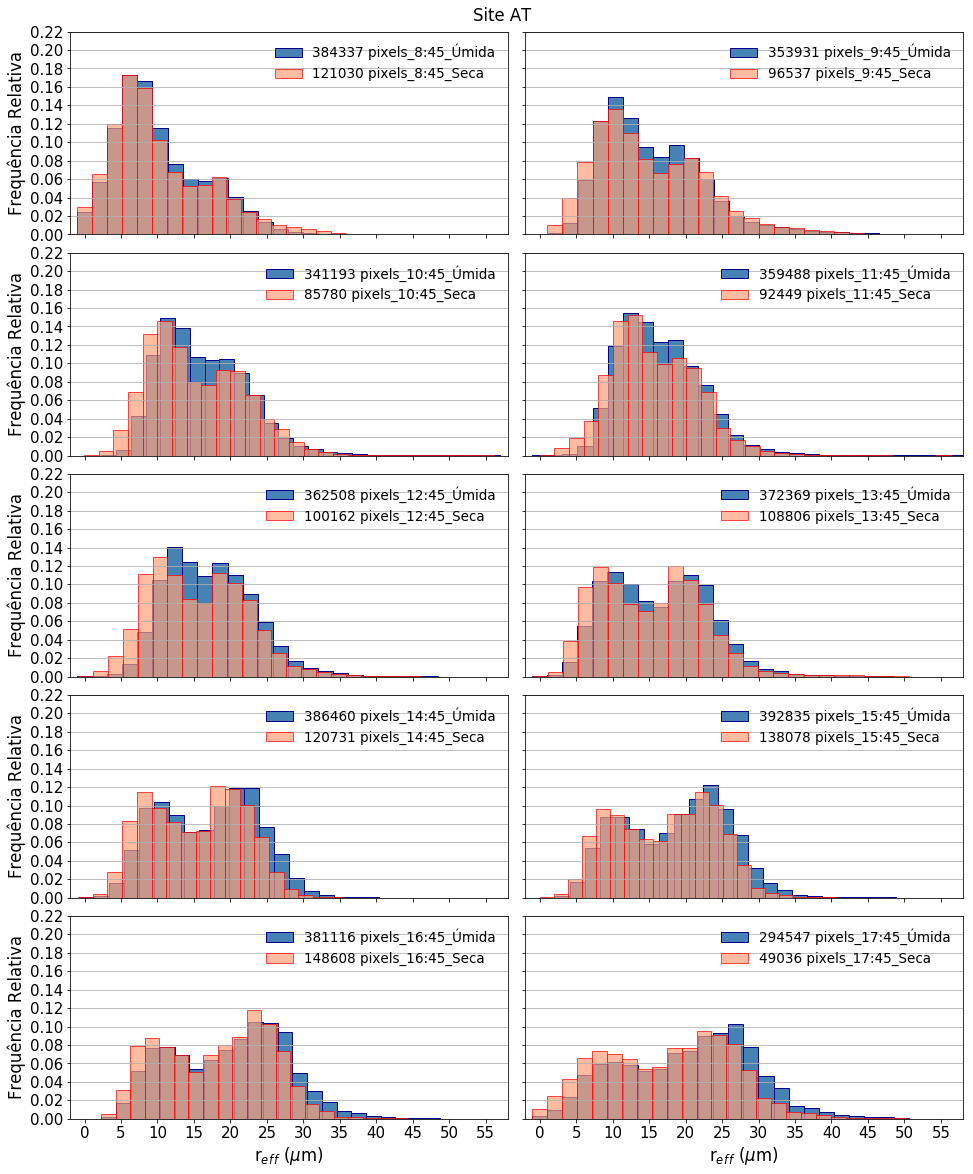

In [26]:
###################################### Hists reff Site 2 #######################
numberofbins=30
yl = [0,0.22]
xl = [-2,58]
xyl = (xl[0], xl[1], yl[0], yl[1]) 
tam_eixos = 15
divis_eixos = 12
loc_legendas = 1
Y = 16
X = 20

# 8:45....
mymin7_s1_u=min([min(reff_U11_s1_um)])
mymax7_s1_u=max([max(reff_U11_s1_um)])
xbins7_s1_u=np.linspace(mymin7_s1_u, mymax7_s1_u, numberofbins)
mymin7_s1_s=min([min(reff_U11_s1_se)])
mymax7_s1_s=max([max(reff_U11_s1_se)])
xbins7_s1_s=np.linspace(mymin7_s1_s, mymax7_s1_s, numberofbins)
# 9:45....
mymin8_s1_u=min([min(reff_U12_s1_um)])
mymax8_s1_u=max([max(reff_U12_s1_um)])
xbins8_s1_u=np.linspace(mymin8_s1_u, mymax8_s1_u, numberofbins)
mymin8_s1_s=min([min(reff_U12_s1_se)])
mymax8_s1_s=max([max(reff_U12_s1_se)])
xbins8_s1_s=np.linspace(mymin8_s1_s, mymax8_s1_s, numberofbins)
# 10:45....
mymin9_s1_u=min([min(reff_U13_s1_um)])
mymax9_s1_u=max([max(reff_U13_s1_um)])
xbins9_s1_u=np.linspace(mymin9_s1_u, mymax9_s1_u, numberofbins)
mymin9_s1_s=min([min(reff_U13_s1_se)])
mymax9_s1_s=max([max(reff_U13_s1_se)])
xbins9_s1_s=np.linspace(mymin9_s1_s, mymax9_s1_s, numberofbins)
# 11:45....
mymin10_s1_u=min([min(reff_U14_s1_um)])
mymax10_s1_u=max([max(reff_U14_s1_um)])
xbins10_s1_u=np.linspace(mymin10_s1_u, mymax10_s1_u, numberofbins)
mymin10_s1_s=min([min(reff_U14_s1_se)])
mymax10_s1_s=max([max(reff_U14_s1_se)])
xbins10_s1_s=np.linspace(mymin10_s1_s, mymax10_s1_s, numberofbins)
# 12:45....
mymin11_s1_u=min([min(reff_U15_s1_um)])
mymax11_s1_u=max([max(reff_U15_s1_um)])
xbins11_s1_u=np.linspace(mymin11_s1_u, mymax11_s1_u, numberofbins)
mymin11_s1_s=min([min(reff_U15_s1_se)])
mymax11_s1_s=max([max(reff_U15_s1_se)])
xbins11_s1_s=np.linspace(mymin11_s1_s, mymax11_s1_s, numberofbins)
# 13:45....
mymin12_s1_u=min([min(reff_U16_s1_um)])
mymax12_s1_u=max([max(reff_U16_s1_um)])
xbins12_s1_u=np.linspace(mymin12_s1_u, mymax12_s1_u, numberofbins)
mymin12_s1_s=min([min(reff_U16_s1_se)])
mymax12_s1_s=max([max(reff_U16_s1_se)])
xbins12_s1_s=np.linspace(mymin12_s1_s, mymax12_s1_s, numberofbins)
# 14:45....
mymin13_s1_u=min([min(reff_U17_s1_um)])
mymax13_s1_u=max([max(reff_U17_s1_um)])
xbins13_s1_u=np.linspace(mymin13_s1_u, mymax13_s1_u, numberofbins)
mymin13_s1_s=min([min(reff_U17_s1_se)])
mymax13_s1_s=max([max(reff_U17_s1_se)])
xbins13_s1_s=np.linspace(mymin13_s1_s, mymax13_s1_s, numberofbins)
# 15:45....
mymin14_s1_u=min([min(reff_U18_s1_um)])
mymax14_s1_u=max([max(reff_U18_s1_um)])
xbins14_s1_u=np.linspace(mymin14_s1_u, mymax14_s1_u, numberofbins)
mymin14_s1_s=min([min(reff_U18_s1_se)])
mymax14_s1_s=max([max(reff_U18_s1_se)])
xbins14_s1_s=np.linspace(mymin14_s1_s, mymax14_s1_s, numberofbins)
# 16:45....
mymin15_s1_u=min([min(reff_U19_s1_um)])
mymax15_s1_u=max([max(reff_U19_s1_um)])
xbins15_s1_u=np.linspace(mymin15_s1_u, mymax15_s1_u, numberofbins)
mymin15_s1_s=min([min(reff_U19_s1_se)])
mymax15_s1_s=max([max(reff_U19_s1_se)])
xbins15_s1_s=np.linspace(mymin15_s1_s, mymax15_s1_s, numberofbins)
# 17:45....
mymin16_s1_u=min([min(reff_U20_s1_um)])
mymax16_s1_u=max([max(reff_U20_s1_um)])
xbins16_s1_u=np.linspace(mymin16_s1_u, mymax16_s1_u, numberofbins)
if len(reff_U20_s1_se) == 0:
    mymin16_s1_s=0
    mymax16_s1_s=0
else:
    mymin16_s1_s=min([min(reff_U20_s1_se)])
    mymax16_s1_s=max([max(reff_U20_s1_se)])
xbins16_s1_s=np.linspace(mymin16_s1_s, mymax16_s1_s, numberofbins)

# Histograma de freq. absoluta para 8:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax7_u = plt.subplot(5, 2, 1)
y7_u, bins7_u, patches7_u = ax7_u.hist(reff_U11_s1_um, bins=xbins7_s1_u, normed=False, alpha=1, cumulative=0)        
y7_u=y7_u/(y7_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax7_s = plt.subplot(5, 2, 1)
y7_s, bins7_s, patches7_s = ax7_s.hist(reff_U11_s1_se, bins=xbins7_s1_s, normed=False, alpha=1, cumulative=0)        
y7_s=y7_s/(y7_s.sum())
plt.clf()
# Histograma de freq. absoluta para 9:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax8_u = plt.subplot(5, 2, 2)
y8_u, bins8_u, patches8_u = ax8_u.hist(reff_U12_s1_um, bins=xbins8_s1_u, normed=False, alpha=1, cumulative=0)        
y8_u=y8_u/(y8_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax8_s = plt.subplot(5, 2, 2)
y8_s, bins8_s, patches8_s = ax8_s.hist(reff_U12_s1_se, bins=xbins8_s1_s, normed=False, alpha=1, cumulative=0)        
y8_s=y8_s/(y8_s.sum())
plt.clf()
# Histograma de freq. absoluta para 10:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax9_u = plt.subplot(5, 2, 3)
y9_u, bins9_u, patches9_u = ax9_u.hist(reff_U13_s1_um, bins=xbins9_s1_u, normed=False, alpha=1, cumulative=0)        
y9_u=y9_u/(y9_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax9_s = plt.subplot(5, 2, 3)
y9_s, bins9_s, patches9_s = ax9_s.hist(reff_U13_s1_se, bins=xbins9_s1_s, normed=False, alpha=1, cumulative=0)        
y9_s=y9_s/(y9_s.sum())
plt.clf()
# Histograma de freq. absoluta para 11:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax10_u = plt.subplot(5, 2, 4)
y10_u, bins10_u, patches10_u = ax10_u.hist(reff_U14_s1_um, bins=xbins10_s1_u, normed=False, alpha=1, cumulative=0)        
y10_u=y10_u/(y10_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax10_s = plt.subplot(5, 2, 4)
y10_s, bins10_s, patches10_s = ax10_s.hist(reff_U14_s1_se, bins=xbins10_s1_s, normed=False, alpha=1, cumulative=0)        
y10_s=y10_s/(y10_s.sum())
plt.clf()
# Histograma de freq. absoluta para 12:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax11_u = plt.subplot(5, 2, 5)
y11_u, bins11_u, patches11_u = ax11_u.hist(reff_U15_s1_um, bins=xbins11_s1_u, normed=False, alpha=1, cumulative=0)        
y11_u=y11_u/(y11_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax11_s = plt.subplot(5, 2, 5)
y11_s, bins11_s, patches11_s = ax11_s.hist(reff_U15_s1_se, bins=xbins11_s1_s, normed=False, alpha=1, cumulative=0)        
y11_s=y11_s/(y11_s.sum())
plt.clf()
# Histograma de freq. absoluta para 13:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax12_u = plt.subplot(5, 2, 6)
y12_u, bins12_u, patches12_u = ax12_u.hist(reff_U16_s1_um, bins=xbins12_s1_u, normed=False, alpha=1, cumulative=0)        
y12_u=y12_u/(y12_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax12_s = plt.subplot(5, 2, 6)
y12_s, bins12_s, patches12_s = ax12_s.hist(reff_U16_s1_se, bins=xbins12_s1_s, normed=False, alpha=1, cumulative=0)        
y12_s=y12_s/(y12_s.sum())
plt.clf()
# Histograma de freq. absoluta para 14:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax13_u = plt.subplot(5, 2, 7)
y13_u, bins13_u, patches13_u = ax13_u.hist(reff_U17_s1_um, bins=xbins13_s1_u, normed=False, alpha=1, cumulative=0)        
y13_u=y13_u/(y13_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax13_s = plt.subplot(5, 2, 7)
y13_s, bins13_s, patches13_s = ax13_s.hist(reff_U17_s1_se, bins=xbins13_s1_s, normed=False, alpha=1, cumulative=0)        
y13_s=y13_s/(y13_s.sum())
plt.clf()
# Histograma de freq. absoluta para 15:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax14_u = plt.subplot(5, 2, 8)
y14_u, bins14_u, patches14_u = ax14_u.hist(reff_U18_s1_um, bins=xbins14_s1_u, normed=False, alpha=1, cumulative=0)        
y14_u=y14_u/(y14_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax14_s = plt.subplot(5, 2, 8)
y14_s, bins14_s, patches14_s = ax14_s.hist(reff_U18_s1_se, bins=xbins14_s1_s, normed=False, alpha=1, cumulative=0)        
y14_s=y14_s/(y14_s.sum())
plt.clf()
# Histograma de freq. absoluta para 16:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax15_u = plt.subplot(5, 2, 9)
y15_u, bins15_u, patches15_u = ax15_u.hist(reff_U19_s1_um, bins=xbins15_s1_u, normed=False, alpha=1, cumulative=0)        
y15_u=y15_u/(y15_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax15_s = plt.subplot(5, 2, 9)
y15_s, bins15_s, patches15_s = ax15_s.hist(reff_U19_s1_se, bins=xbins15_s1_s, normed=False, alpha=1, cumulative=0)        
y15_s=y15_s/(y15_s.sum())
plt.clf()
# Histograma de freq. absoluta para 17:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax16_u = plt.subplot(5, 2, 10)
y16_u, bins16_u, patches16_u = ax16_u.hist(reff_U20_s1_um, bins=xbins16_s1_u, normed=False, alpha=1, cumulative=0)        
y16_u=y16_u/(y16_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax16_s = plt.subplot(5, 2, 10)
y16_s, bins16_s, patches16_s = ax16_s.hist(reff_U20_s1_se, bins=xbins16_s1_s, normed=False, alpha=1, cumulative=0)        
y16_s=y16_s/(y16_s.sum())
plt.clf()

# Colocando o título na figura toda
fig.suptitle('Site '+str(sites[1]), fontsize=tam_eixos+1.5, y='0.897')
fig.subplots_adjust(wspace=0.04, hspace=0.09)

# Histograma de freq. relativa para 8:45....
fig = plt.figure(1, figsize=(Y,X))
ax7_u = plt.subplot(5, 2, 1)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
ax7_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax7_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-1))
plt.bar(bins7_u[:-1], y7_u, bins7_u[1]-bins7_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_8:45_Úmida'.format(len(temp_U11_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins7_s[:-1], y7_s, bins7_s[1]-bins7_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_8:45_Seca'.format(len(temp_U11_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax7_u.grid(True, axis='y')
ax7_u.set_xticklabels([])

# Histograma de freq. relativa para 9:45....
fig = plt.figure(1, figsize=(Y,X))
ax8_u = plt.subplot(5, 2, 2)
plt.axis(xyl)
ax8_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax8_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-1))
plt.bar(bins8_u[:-1], y8_u, bins8_u[1]-bins8_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_9:45_Úmida'.format(len(temp_U12_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins8_s[:-1], y8_s, bins8_s[1]-bins8_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_9:45_Seca'.format(len(temp_U12_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax8_u.grid(True, axis='y')
ax8_u.set_xticklabels([])
ax8_u.set_yticklabels([])

# Histograma de freq. relativa para 10:45....
fig = plt.figure(1, figsize=(Y,X))
ax9_u = plt.subplot(5, 2, 3)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
ax9_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax9_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-1))
plt.bar(bins9_u[:-1], y9_u, bins9_u[1]-bins9_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_10:45_Úmida'.format(len(temp_U13_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins9_s[:-1], y9_s, bins9_s[1]-bins9_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_10:45_Seca'.format(len(temp_U13_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax9_u.grid(True, axis='y')
ax9_u.set_xticklabels([])

# Histograma de freq. relativa para 11:45....
fig = plt.figure(1, figsize=(Y,X))
ax10_u = plt.subplot(5, 2, 4)
plt.axis(xyl)
ax10_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax10_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-1))
plt.bar(bins10_u[:-1], y10_u, bins10_u[1]-bins10_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_11:45_Úmida'.format(len(temp_U14_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins10_s[:-1], y10_s, bins10_s[1]-bins10_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_11:45_Seca'.format(len(temp_U14_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax10_u.grid(True, axis='y')
ax10_u.set_xticklabels([])
ax10_u.set_yticklabels([])

# Histograma de freq. relativa para 12:45....
fig = plt.figure(1, figsize=(Y,X))
ax11_u = plt.subplot(5, 2, 5)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
ax11_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax11_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-1))
plt.bar(bins11_u[:-1], y11_u, bins11_u[1]-bins11_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_12:45_Úmida'.format(len(temp_U15_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins11_s[:-1], y11_s, bins11_s[1]-bins11_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_12:45_Seca'.format(len(temp_U15_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax11_u.grid(True, axis='y')
ax11_u.set_xticklabels([])

# Histograma de freq. relativa para 13:45....
fig = plt.figure(1, figsize=(Y,X))
ax12_u = plt.subplot(5, 2, 6)
plt.axis(xyl)
ax12_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax12_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-1))
plt.bar(bins12_u[:-1], y12_u, bins12_u[1]-bins12_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_13:45_Úmida'.format(len(temp_U16_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins12_s[:-1], y12_s, bins12_s[1]-bins12_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_13:45_Seca'.format(len(temp_U16_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax12_u.grid(True, axis='y')
ax12_u.set_xticklabels([])
ax12_u.set_yticklabels([])

# Histograma de freq. relativa para 14:45....
fig = plt.figure(1, figsize=(Y,X))
ax13_u = plt.subplot(5, 2, 7)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
ax13_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax13_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-1))
plt.bar(bins13_u[:-1], y13_u, bins13_u[1]-bins13_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_14:45_Úmida'.format(len(temp_U17_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins13_s[:-1], y13_s, bins13_s[1]-bins13_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_14:45_Seca'.format(len(temp_U17_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax13_u.grid(True, axis='y')
ax13_u.set_xticklabels([])

# Histograma de freq. relativa para 15:45....
fig = plt.figure(1, figsize=(Y,X))
ax14_u = plt.subplot(5, 2, 8)
plt.axis(xyl)
ax14_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax14_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-1))
plt.bar(bins14_u[:-1], y14_u, bins14_u[1]-bins14_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_15:45_Úmida'.format(len(temp_U18_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins14_s[:-1], y14_s, bins14_s[1]-bins14_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_15:45_Seca'.format(len(temp_U18_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax14_u.grid(True, axis='y')
ax14_u.set_xticklabels([])
ax14_u.set_yticklabels([])

# Histograma de freq. relativa para 16:45....
fig = plt.figure(1, figsize=(Y,X))
ax15_u = plt.subplot(5, 2, 9)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.xticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
plt.xlabel(u'r$_e$$_f$$_f$ ($\mu$m)', fontsize=tam_eixos+1.5)
ax15_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax15_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-1))
plt.bar(bins15_u[:-1], y15_u, bins15_u[1]-bins15_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_16:45_Úmida'.format(len(temp_U19_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins15_s[:-1], y15_s, bins15_s[1]-bins15_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_16:45_Seca'.format(len(temp_U19_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax15_u.grid(True, axis='y')

# Histograma de freq. relativa para 17:45....
fig = plt.figure(1, figsize=(Y,X))
ax16_u = plt.subplot(5, 2, 10)
plt.axis(xyl)
plt.xticks(fontsize=tam_eixos)
plt.xlabel(u'r$_e$$_f$$_f$ ($\mu$m)', fontsize=tam_eixos+1.5)
ax16_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax16_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-1))
plt.bar(bins16_u[:-1], y16_u, bins16_u[1]-bins16_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_17:45_Úmida'.format(len(temp_U20_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
if len(reff_U20_s1_se) == 0:
    plt.plot((-90, 30), (0, 0), color='red', linewidth=0.9, 
             label=u'Não há pixels de nuvens às 17:45_Seca')
if len(reff_U20_s1_se) != 0:
    plt.bar(bins16_s[:-1], y16_s, bins16_s[1]-bins16_s[0], alpha=0.7, color='lightsalmon', 
            edgecolor='red', label=u'{} pixels_17:45_Seca'.format(len(temp_U20_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax16_u.grid(True, axis='y')
ax16_u.set_yticklabels([])

fig.savefig('/home/andre/Desktop/Resultados_3/Plotagens/Hists_reff_'+str(sites[1])+'.png', 
            orientation='landscape', bbox_inches='tight', dpi=100)
# plt.close(fig)

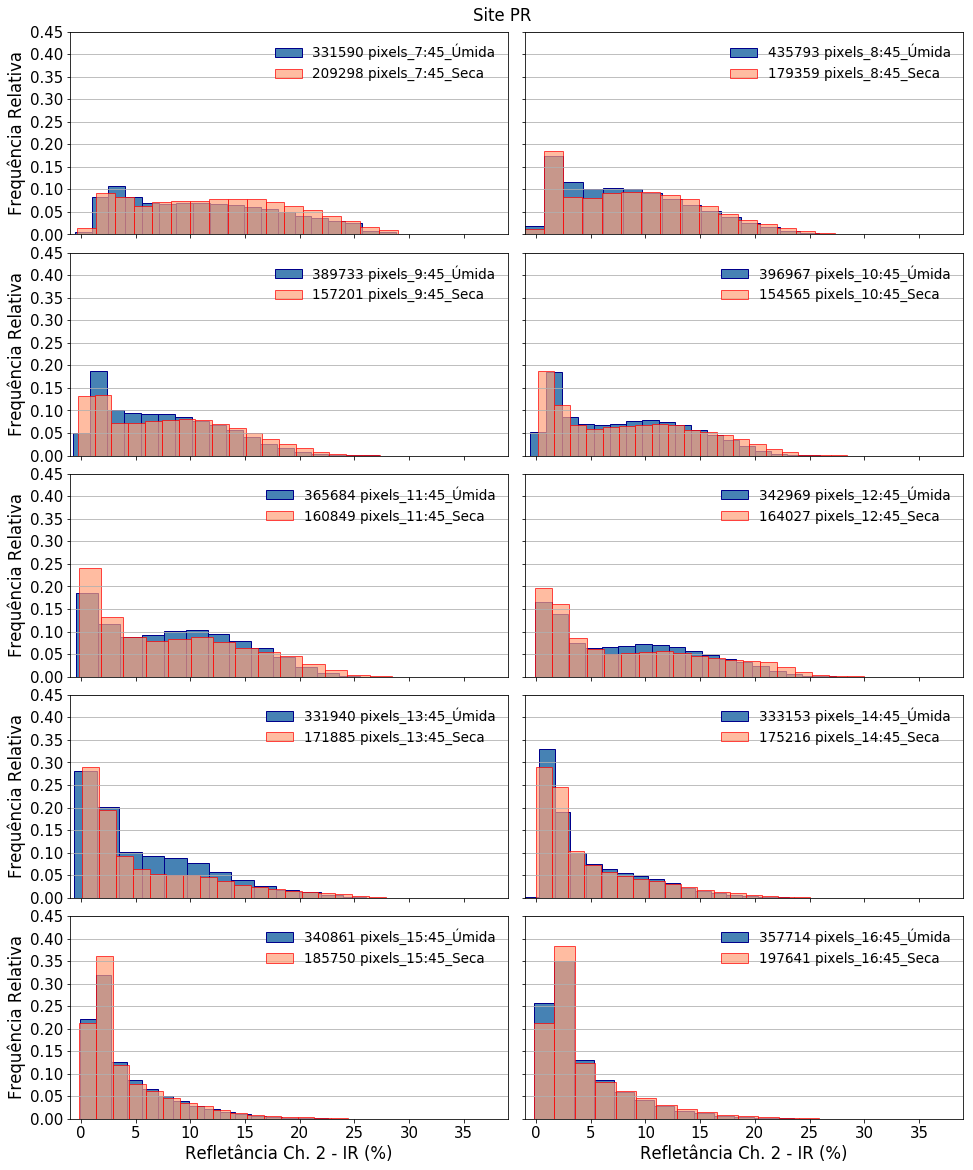

In [27]:
###################################### Hists ir Site 1 #######################
numberofbins=20
yl = [0,0.45]
xl = [-1,39]
xyl = (xl[0], xl[1], yl[0], yl[1]) 
tam_eixos = 15
divis_eixos = 8
loc_legendas = 1
Y = 16
X = 20

# 7:45....
mymin7_s0_u=min([min(ir_U11_s0_um)])
mymax7_s0_u=max([max(ir_U11_s0_um)])
xbins7_s0_u=np.linspace(mymin7_s0_u, mymax7_s0_u, numberofbins)
mymin7_s0_s=min([min(ir_U11_s0_se)])
mymax7_s0_s=max([max(ir_U11_s0_se)])
xbins7_s0_s=np.linspace(mymin7_s0_s, mymax7_s0_s, numberofbins)
# 8:45....
mymin8_s0_u=min([min(ir_U12_s0_um)])
mymax8_s0_u=max([max(ir_U12_s0_um)])
xbins8_s0_u=np.linspace(mymin8_s0_u, mymax8_s0_u, numberofbins)
mymin8_s0_s=min([min(ir_U12_s0_se)])
mymax8_s0_s=max([max(ir_U12_s0_se)])
xbins8_s0_s=np.linspace(mymin8_s0_s, mymax8_s0_s, numberofbins)
# 9:45....
mymin9_s0_u=min([min(ir_U13_s0_um)])
mymax9_s0_u=max([max(ir_U13_s0_um)])
xbins9_s0_u=np.linspace(mymin9_s0_u, mymax9_s0_u, numberofbins)
mymin9_s0_s=min([min(ir_U13_s0_se)])
mymax9_s0_s=max([max(ir_U13_s0_se)])
xbins9_s0_s=np.linspace(mymin9_s0_s, mymax9_s0_s, numberofbins)
# 10:45....
mymin10_s0_u=min([min(ir_U14_s0_um)])
mymax10_s0_u=max([max(ir_U14_s0_um)])
xbins10_s0_u=np.linspace(mymin10_s0_u, mymax10_s0_u, numberofbins)
mymin10_s0_s=min([min(ir_U14_s0_se)])
mymax10_s0_s=max([max(ir_U14_s0_se)])
xbins10_s0_s=np.linspace(mymin10_s0_s, mymax10_s0_s, numberofbins)
# 11:45....
mymin11_s0_u=min([min(ir_U15_s0_um)])
mymax11_s0_u=max([max(ir_U15_s0_um)])
xbins11_s0_u=np.linspace(mymin11_s0_u, mymax11_s0_u, numberofbins)
mymin11_s0_s=min([min(ir_U15_s0_se)])
mymax11_s0_s=max([max(ir_U15_s0_se)])
xbins11_s0_s=np.linspace(mymin11_s0_s, mymax11_s0_s, numberofbins)
# 12:45....
mymin12_s0_u=min([min(ir_U16_s0_um)])
mymax12_s0_u=max([max(ir_U16_s0_um)])
xbins12_s0_u=np.linspace(mymin12_s0_u, mymax12_s0_u, numberofbins)
mymin12_s0_s=min([min(ir_U16_s0_se)])
mymax12_s0_s=max([max(ir_U16_s0_se)])
xbins12_s0_s=np.linspace(mymin12_s0_s, mymax12_s0_s, numberofbins)
# 13:45....
mymin13_s0_u=min([min(ir_U17_s0_um)])
mymax13_s0_u=max([max(ir_U17_s0_um)])
xbins13_s0_u=np.linspace(mymin13_s0_u, mymax13_s0_u, numberofbins)
mymin13_s0_s=min([min(ir_U17_s0_se)])
mymax13_s0_s=max([max(ir_U17_s0_se)])
xbins13_s0_s=np.linspace(mymin13_s0_s, mymax13_s0_s, numberofbins)
# 14:45....
mymin14_s0_u=min([min(ir_U18_s0_um)])
mymax14_s0_u=max([max(ir_U18_s0_um)])
xbins14_s0_u=np.linspace(mymin14_s0_u, mymax14_s0_u, numberofbins)
mymin14_s0_s=min([min(ir_U18_s0_se)])
mymax14_s0_s=max([max(ir_U18_s0_se)])
xbins14_s0_s=np.linspace(mymin14_s0_s, mymax14_s0_s, numberofbins)
# 15:45....
mymin15_s0_u=min([min(ir_U19_s0_um)])
mymax15_s0_u=max([max(ir_U19_s0_um)])
xbins15_s0_u=np.linspace(mymin15_s0_u, mymax15_s0_u, numberofbins)
mymin15_s0_s=min([min(ir_U19_s0_se)])
mymax15_s0_s=max([max(ir_U19_s0_se)])
xbins15_s0_s=np.linspace(mymin15_s0_s, mymax15_s0_s, numberofbins)
# 16:45....
mymin16_s0_u=min([min(ir_U20_s0_um)])
mymax16_s0_u=max([max(ir_U20_s0_um)])
xbins16_s0_u=np.linspace(mymin16_s0_u, mymax16_s0_u, numberofbins)
mymin16_s0_s=min([min(ir_U20_s0_se)])
mymax16_s0_s=max([max(ir_U20_s0_se)])
xbins16_s0_s=np.linspace(mymin16_s0_s, mymax16_s0_s, numberofbins)

# Histograma de freq. absoluta para 7:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax7_u = plt.subplot(5, 2, 1)
y7_u, bins7_u, patches7_u = ax7_u.hist(ir_U11_s0_um, bins=xbins7_s0_u, normed=False, alpha=1, cumulative=0)        
y7_u=y7_u/(y7_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax7_s = plt.subplot(5, 2, 1)
y7_s, bins7_s, patches7_s = ax7_s.hist(ir_U11_s0_se, bins=xbins7_s0_s, normed=False, alpha=1, cumulative=0)        
y7_s=y7_s/(y7_s.sum())
plt.clf()
# Histograma de freq. absoluta para 8:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax8_u = plt.subplot(5, 2, 2)
y8_u, bins8_u, patches8_u = ax8_u.hist(ir_U12_s0_um, bins=xbins8_s0_u, normed=False, alpha=1, cumulative=0)        
y8_u=y8_u/(y8_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax8_s = plt.subplot(5, 2, 2)
y8_s, bins8_s, patches8_s = ax8_s.hist(ir_U12_s0_se, bins=xbins8_s0_s, normed=False, alpha=1, cumulative=0)        
y8_s=y8_s/(y8_s.sum())
plt.clf()
# Histograma de freq. absoluta para 9:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax9_u = plt.subplot(5, 2, 3)
y9_u, bins9_u, patches9_u = ax9_u.hist(ir_U13_s0_um, bins=xbins9_s0_u, normed=False, alpha=1, cumulative=0)        
y9_u=y9_u/(y9_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax9_s = plt.subplot(5, 2, 3)
y9_s, bins9_s, patches9_s = ax9_s.hist(ir_U13_s0_se, bins=xbins9_s0_s, normed=False, alpha=1, cumulative=0)        
y9_s=y9_s/(y9_s.sum())
plt.clf()
# Histograma de freq. absoluta para 10:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax10_u = plt.subplot(5, 2, 4)
y10_u, bins10_u, patches10_u = ax10_u.hist(ir_U14_s0_um, bins=xbins10_s0_u, normed=False, alpha=1, cumulative=0)        
y10_u=y10_u/(y10_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax10_s = plt.subplot(5, 2, 4)
y10_s, bins10_s, patches10_s = ax10_s.hist(ir_U14_s0_se, bins=xbins10_s0_s, normed=False, alpha=1, cumulative=0)        
y10_s=y10_s/(y10_s.sum())
plt.clf()
# Histograma de freq. absoluta para 11:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax11_u = plt.subplot(5, 2, 5)
y11_u, bins11_u, patches11_u = ax11_u.hist(ir_U15_s0_um, bins=xbins11_s0_u, normed=False, alpha=1, cumulative=0)        
y11_u=y11_u/(y11_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax11_s = plt.subplot(5, 2, 5)
y11_s, bins11_s, patches11_s = ax11_s.hist(ir_U15_s0_se, bins=xbins11_s0_s, normed=False, alpha=1, cumulative=0)        
y11_s=y11_s/(y11_s.sum())
plt.clf()
# Histograma de freq. absoluta para 12:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax12_u = plt.subplot(5, 2, 6)
y12_u, bins12_u, patches12_u = ax12_u.hist(ir_U16_s0_um, bins=xbins12_s0_u, normed=False, alpha=1, cumulative=0)        
y12_u=y12_u/(y12_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax12_s = plt.subplot(5, 2, 6)
y12_s, bins12_s, patches12_s = ax12_s.hist(ir_U16_s0_se, bins=xbins12_s0_s, normed=False, alpha=1, cumulative=0)        
y12_s=y12_s/(y12_s.sum())
plt.clf()
# Histograma de freq. absoluta para 13:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax13_u = plt.subplot(5, 2, 7)
y13_u, bins13_u, patches13_u = ax13_u.hist(ir_U17_s0_um, bins=xbins13_s0_u, normed=False, alpha=1, cumulative=0)        
y13_u=y13_u/(y13_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax13_s = plt.subplot(5, 2, 7)
y13_s, bins13_s, patches13_s = ax13_s.hist(ir_U17_s0_se, bins=xbins13_s0_s, normed=False, alpha=1, cumulative=0)        
y13_s=y13_s/(y13_s.sum())
plt.clf()
# Histograma de freq. absoluta para 14:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax14_u = plt.subplot(5, 2, 8)
y14_u, bins14_u, patches14_u = ax14_u.hist(ir_U18_s0_um, bins=xbins14_s0_u, normed=False, alpha=1, cumulative=0)        
y14_u=y14_u/(y14_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax14_s = plt.subplot(5, 2, 8)
y14_s, bins14_s, patches14_s = ax14_s.hist(ir_U18_s0_se, bins=xbins14_s0_s, normed=False, alpha=1, cumulative=0)        
y14_s=y14_s/(y14_s.sum())
plt.clf()
# Histograma de freq. absoluta para 15:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax15_u = plt.subplot(5, 2, 9)
y15_u, bins15_u, patches15_u = ax15_u.hist(ir_U19_s0_um, bins=xbins15_s0_u, normed=False, alpha=1, cumulative=0)        
y15_u=y15_u/(y15_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax15_s = plt.subplot(5, 2, 9)
y15_s, bins15_s, patches15_s = ax15_s.hist(ir_U19_s0_se, bins=xbins15_s0_s, normed=False, alpha=1, cumulative=0)        
y15_s=y15_s/(y15_s.sum())
plt.clf()
# Histograma de freq. absoluta para 16:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax16_u = plt.subplot(5, 2, 10)
y16_u, bins16_u, patches16_u = ax16_u.hist(ir_U20_s0_um, bins=xbins16_s0_u, normed=False, alpha=1, cumulative=0)        
y16_u=y16_u/(y16_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax16_s = plt.subplot(5, 2, 10)
y16_s, bins16_s, patches16_s = ax16_s.hist(ir_U20_s0_se, bins=xbins16_s0_s, normed=False, alpha=1, cumulative=0)        
y16_s=y16_s/(y16_s.sum())
plt.clf()

# Colocando o título na figura toda
fig.suptitle('Site '+str(sites[0]), fontsize=tam_eixos+1.5, y='0.897')
fig.subplots_adjust(wspace=0.04, hspace=0.09)

# Histograma de freq. relativa para 7:45....
fig = plt.figure(1, figsize=(Y,X))
ax7_u = plt.subplot(5, 2, 1)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
ax7_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax7_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos+1))
plt.bar(bins7_u[:-1], y7_u, bins7_u[1]-bins7_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_7:45_Úmida'.format(len(reff_U11_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins7_s[:-1], y7_s, bins7_s[1]-bins7_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_7:45_Seca'.format(len(reff_U11_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax7_u.grid(True, axis='y')
ax7_u.set_xticklabels([])

# Histograma de freq. relativa para 8:45....
fig = plt.figure(1, figsize=(Y,X))
ax8_u = plt.subplot(5, 2, 2)
plt.axis(xyl)
ax8_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax8_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos+1))
plt.bar(bins8_u[:-1], y8_u, bins8_u[1]-bins8_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_8:45_Úmida'.format(len(reff_U12_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins8_s[:-1], y8_s, bins8_s[1]-bins8_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_8:45_Seca'.format(len(reff_U12_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax8_u.grid(True, axis='y')
ax8_u.set_xticklabels([])
ax8_u.set_yticklabels([])

# Histograma de freq. relativa para 9:45....
fig = plt.figure(1, figsize=(Y,X))
ax9_u = plt.subplot(5, 2, 3)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
ax9_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax9_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos+1))
plt.bar(bins9_u[:-1], y9_u, bins9_u[1]-bins9_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_9:45_Úmida'.format(len(reff_U13_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins9_s[:-1], y9_s, bins9_s[1]-bins9_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_9:45_Seca'.format(len(reff_U13_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax9_u.grid(True, axis='y')
ax9_u.set_xticklabels([])

# Histograma de freq. relativa para 10:45....
fig = plt.figure(1, figsize=(Y,X))
ax10_u = plt.subplot(5, 2, 4)
plt.axis(xyl)
ax10_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax10_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos+1))
plt.bar(bins10_u[:-1], y10_u, bins10_u[1]-bins10_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_10:45_Úmida'.format(len(reff_U14_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins10_s[:-1], y10_s, bins10_s[1]-bins10_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_10:45_Seca'.format(len(reff_U14_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax10_u.grid(True, axis='y')
ax10_u.set_xticklabels([])
ax10_u.set_yticklabels([])

# Histograma de freq. relativa para 11:45....
fig = plt.figure(1, figsize=(Y,X))
ax11_u = plt.subplot(5, 2, 5)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
ax11_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax11_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos+1))
plt.bar(bins11_u[:-1], y11_u, bins11_u[1]-bins11_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_11:45_Úmida'.format(len(reff_U15_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins11_s[:-1], y11_s, bins11_s[1]-bins11_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_11:45_Seca'.format(len(reff_U15_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax11_u.grid(True, axis='y')
ax11_u.set_xticklabels([])

# Histograma de freq. relativa para 12:45....
fig = plt.figure(1, figsize=(Y,X))
ax12_u = plt.subplot(5, 2, 6)
plt.axis(xyl)
ax12_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax12_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos+1))
plt.bar(bins12_u[:-1], y12_u, bins12_u[1]-bins12_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_12:45_Úmida'.format(len(reff_U16_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins12_s[:-1], y12_s, bins12_s[1]-bins12_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_12:45_Seca'.format(len(reff_U16_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax12_u.grid(True, axis='y')
ax12_u.set_xticklabels([])
ax12_u.set_yticklabels([])

# Histograma de freq. relativa para 13:45....
fig = plt.figure(1, figsize=(Y,X))
ax13_u = plt.subplot(5, 2, 7)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
ax13_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax13_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos+1))
plt.bar(bins13_u[:-1], y13_u, bins13_u[1]-bins13_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_13:45_Úmida'.format(len(reff_U17_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins13_s[:-1], y13_s, bins13_s[1]-bins13_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_13:45_Seca'.format(len(reff_U17_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax13_u.grid(True, axis='y')
ax13_u.set_xticklabels([])

# Histograma de freq. relativa para 14:45....
fig = plt.figure(1, figsize=(Y,X))
ax14_u = plt.subplot(5, 2, 8)
plt.axis(xyl)
ax14_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax14_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos+1))
plt.bar(bins14_u[:-1], y14_u, bins14_u[1]-bins14_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_14:45_Úmida'.format(len(reff_U18_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins14_s[:-1], y14_s, bins14_s[1]-bins14_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_14:45_Seca'.format(len(reff_U18_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax14_u.grid(True, axis='y')
ax14_u.set_xticklabels([])
ax14_u.set_yticklabels([])

# Histograma de freq. relativa para 15:45....
fig = plt.figure(1, figsize=(Y,X))
ax15_u = plt.subplot(5, 2, 9)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.xticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
plt.xlabel(u'Refletância Ch. 2 - IR (%)', fontsize=tam_eixos+1.5)
ax15_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax15_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos+1))
plt.bar(bins15_u[:-1], y15_u, bins15_u[1]-bins15_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_15:45_Úmida'.format(len(reff_U19_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins15_s[:-1], y15_s, bins15_s[1]-bins15_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_15:45_Seca'.format(len(reff_U19_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax15_u.grid(True, axis='y')

# Histograma de freq. relativa para 16:45....
fig = plt.figure(1, figsize=(Y,X))
ax16_u = plt.subplot(5, 2, 10)
plt.axis(xyl)
plt.xticks(fontsize=tam_eixos)
plt.xlabel(u'Refletância Ch. 2 - IR (%)', fontsize=tam_eixos+1.5)
ax16_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax16_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos+1))
plt.bar(bins16_u[:-1], y16_u, bins16_u[1]-bins16_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_16:45_Úmida'.format(len(reff_U20_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins16_s[:-1], y16_s, bins16_s[1]-bins16_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_16:45_Seca'.format(len(reff_U20_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax16_u.grid(True, axis='y')
ax16_u.set_yticklabels([])

fig.savefig('/home/andre/Desktop/Resultados_3/Plotagens/Hists_ir_'+str(sites[0])+'.png', 
            orientation='landscape', bbox_inches='tight', dpi=100)
# plt.close(fig)

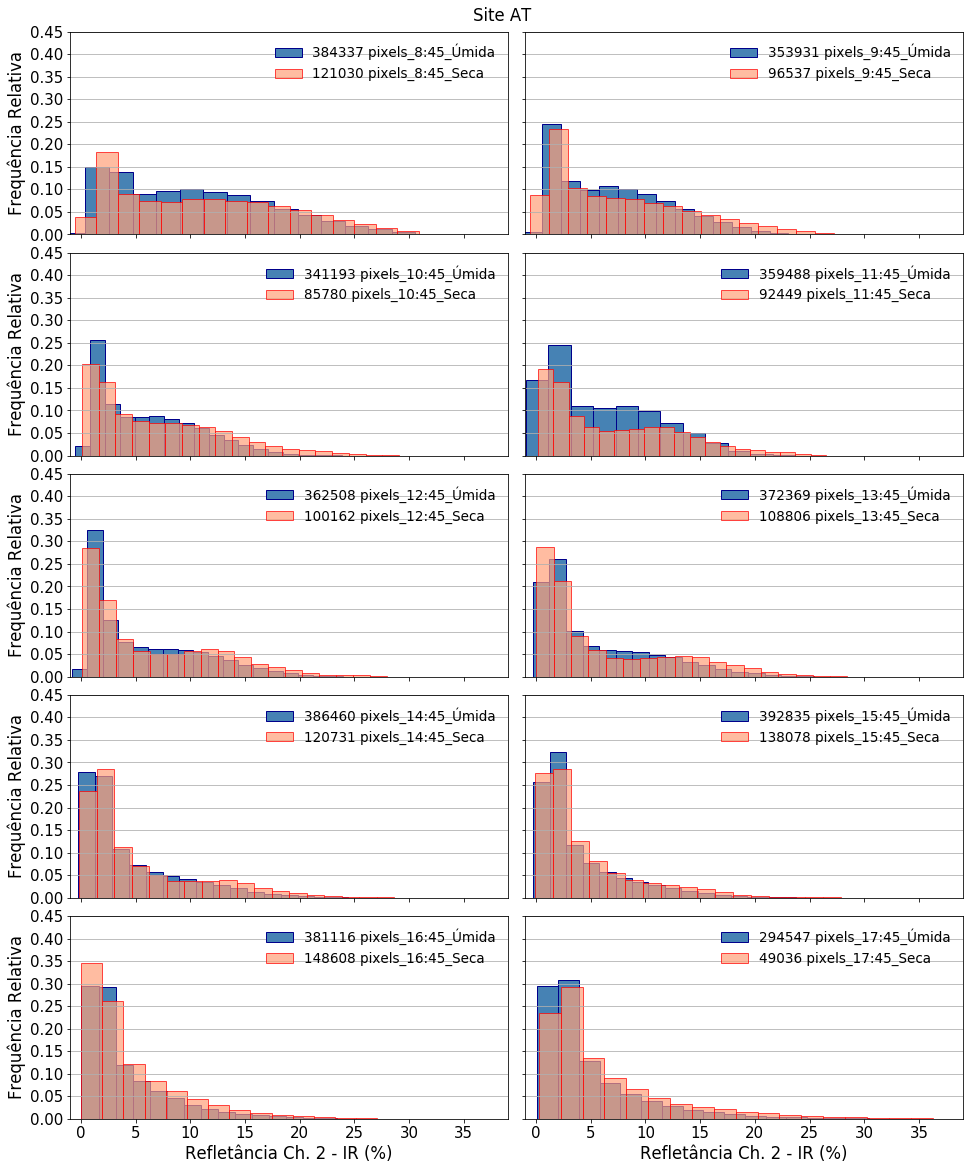

In [28]:
###################################### Hists ir Site 2 #######################
numberofbins=20
yl = [0,0.45]
xl = [-1,39]
xyl = (xl[0], xl[1], yl[0], yl[1]) 
tam_eixos = 15
divis_eixos = 8
loc_legendas = 1
Y = 16
X = 20

# 8:45....
mymin7_s1_u=min([min(ir_U11_s1_um)])
mymax7_s1_u=max([max(ir_U11_s1_um)])
xbins7_s1_u=np.linspace(mymin7_s1_u, mymax7_s1_u, numberofbins)
mymin7_s1_s=min([min(ir_U11_s1_se)])
mymax7_s1_s=max([max(ir_U11_s1_se)])
xbins7_s1_s=np.linspace(mymin7_s1_s, mymax7_s1_s, numberofbins)
# 9:45....
mymin8_s1_u=min([min(ir_U12_s1_um)])
mymax8_s1_u=max([max(ir_U12_s1_um)])
xbins8_s1_u=np.linspace(mymin8_s1_u, mymax8_s1_u, numberofbins)
mymin8_s1_s=min([min(ir_U12_s1_se)])
mymax8_s1_s=max([max(ir_U12_s1_se)])
xbins8_s1_s=np.linspace(mymin8_s1_s, mymax8_s1_s, numberofbins)
# 10:45....
mymin9_s1_u=min([min(ir_U13_s1_um)])
mymax9_s1_u=max([max(ir_U13_s1_um)])
xbins9_s1_u=np.linspace(mymin9_s1_u, mymax9_s1_u, numberofbins)
mymin9_s1_s=min([min(ir_U13_s1_se)])
mymax9_s1_s=max([max(ir_U13_s1_se)])
xbins9_s1_s=np.linspace(mymin9_s1_s, mymax9_s1_s, numberofbins)
# 11:45....
mymin10_s1_u=min([min(ir_U14_s1_um)])
mymax10_s1_u=max([max(ir_U14_s1_um)])
xbins10_s1_u=np.linspace(mymin10_s1_u, mymax10_s1_u, numberofbins)
mymin10_s1_s=min([min(ir_U14_s1_se)])
mymax10_s1_s=max([max(ir_U14_s1_se)])
xbins10_s1_s=np.linspace(mymin10_s1_s, mymax10_s1_s, numberofbins)
# 12:45....
mymin11_s1_u=min([min(ir_U15_s1_um)])
mymax11_s1_u=max([max(ir_U15_s1_um)])
xbins11_s1_u=np.linspace(mymin11_s1_u, mymax11_s1_u, numberofbins)
mymin11_s1_s=min([min(ir_U15_s1_se)])
mymax11_s1_s=max([max(ir_U15_s1_se)])
xbins11_s1_s=np.linspace(mymin11_s1_s, mymax11_s1_s, numberofbins)
# 13:45....
mymin12_s1_u=min([min(ir_U16_s1_um)])
mymax12_s1_u=max([max(ir_U16_s1_um)])
xbins12_s1_u=np.linspace(mymin12_s1_u, mymax12_s1_u, numberofbins)
mymin12_s1_s=min([min(ir_U16_s1_se)])
mymax12_s1_s=max([max(ir_U16_s1_se)])
xbins12_s1_s=np.linspace(mymin12_s1_s, mymax12_s1_s, numberofbins)
# 14:45....
mymin13_s1_u=min([min(ir_U17_s1_um)])
mymax13_s1_u=max([max(ir_U17_s1_um)])
xbins13_s1_u=np.linspace(mymin13_s1_u, mymax13_s1_u, numberofbins)
mymin13_s1_s=min([min(ir_U17_s1_se)])
mymax13_s1_s=max([max(ir_U17_s1_se)])
xbins13_s1_s=np.linspace(mymin13_s1_s, mymax13_s1_s, numberofbins)
# 15:45....
mymin14_s1_u=min([min(ir_U18_s1_um)])
mymax14_s1_u=max([max(ir_U18_s1_um)])
xbins14_s1_u=np.linspace(mymin14_s1_u, mymax14_s1_u, numberofbins)
mymin14_s1_s=min([min(ir_U18_s1_se)])
mymax14_s1_s=max([max(ir_U18_s1_se)])
xbins14_s1_s=np.linspace(mymin14_s1_s, mymax14_s1_s, numberofbins)
# 16:45....
mymin15_s1_u=min([min(ir_U19_s1_um)])
mymax15_s1_u=max([max(ir_U19_s1_um)])
xbins15_s1_u=np.linspace(mymin15_s1_u, mymax15_s1_u, numberofbins)
mymin15_s1_s=min([min(ir_U19_s1_se)])
mymax15_s1_s=max([max(ir_U19_s1_se)])
xbins15_s1_s=np.linspace(mymin15_s1_s, mymax15_s1_s, numberofbins)
# 17:45....
mymin16_s1_u=min([min(ir_U20_s1_um)])
mymax16_s1_u=max([max(ir_U20_s1_um)])
xbins16_s1_u=np.linspace(mymin16_s1_u, mymax16_s1_u, numberofbins)
if len(ir_U20_s1_se) == 0:
    mymin16_s1_s=0
    mymax16_s1_s=0
else:
    mymin16_s1_s=min([min(ir_U20_s1_se)])
    mymax16_s1_s=max([max(ir_U20_s1_se)])
xbins16_s1_s=np.linspace(mymin16_s1_s, mymax16_s1_s, numberofbins)

# Histograma de freq. absoluta para 8:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax7_u = plt.subplot(5, 2, 1)
y7_u, bins7_u, patches7_u = ax7_u.hist(ir_U11_s1_um, bins=xbins7_s1_u, normed=False, alpha=1, cumulative=0)        
y7_u=y7_u/(y7_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax7_s = plt.subplot(5, 2, 1)
y7_s, bins7_s, patches7_s = ax7_s.hist(ir_U11_s1_se, bins=xbins7_s1_s, normed=False, alpha=1, cumulative=0)        
y7_s=y7_s/(y7_s.sum())
plt.clf()
# Histograma de freq. absoluta para 9:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax8_u = plt.subplot(5, 2, 2)
y8_u, bins8_u, patches8_u = ax8_u.hist(ir_U12_s1_um, bins=xbins8_s1_u, normed=False, alpha=1, cumulative=0)        
y8_u=y8_u/(y8_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax8_s = plt.subplot(5, 2, 2)
y8_s, bins8_s, patches8_s = ax8_s.hist(ir_U12_s1_se, bins=xbins8_s1_s, normed=False, alpha=1, cumulative=0)        
y8_s=y8_s/(y8_s.sum())
plt.clf()
# Histograma de freq. absoluta para 10:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax9_u = plt.subplot(5, 2, 3)
y9_u, bins9_u, patches9_u = ax9_u.hist(ir_U13_s1_um, bins=xbins9_s1_u, normed=False, alpha=1, cumulative=0)        
y9_u=y9_u/(y9_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax9_s = plt.subplot(5, 2, 3)
y9_s, bins9_s, patches9_s = ax9_s.hist(ir_U13_s1_se, bins=xbins9_s1_s, normed=False, alpha=1, cumulative=0)        
y9_s=y9_s/(y9_s.sum())
plt.clf()
# Histograma de freq. absoluta para 11:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax10_u = plt.subplot(5, 2, 4)
y10_u, bins10_u, patches10_u = ax10_u.hist(ir_U14_s1_um, bins=xbins10_s1_u, normed=False, alpha=1, cumulative=0)        
y10_u=y10_u/(y10_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax10_s = plt.subplot(5, 2, 4)
y10_s, bins10_s, patches10_s = ax10_s.hist(ir_U14_s1_se, bins=xbins10_s1_s, normed=False, alpha=1, cumulative=0)        
y10_s=y10_s/(y10_s.sum())
plt.clf()
# Histograma de freq. absoluta para 12:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax11_u = plt.subplot(5, 2, 5)
y11_u, bins11_u, patches11_u = ax11_u.hist(ir_U15_s1_um, bins=xbins11_s1_u, normed=False, alpha=1, cumulative=0)        
y11_u=y11_u/(y11_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax11_s = plt.subplot(5, 2, 5)
y11_s, bins11_s, patches11_s = ax11_s.hist(ir_U15_s1_se, bins=xbins11_s1_s, normed=False, alpha=1, cumulative=0)        
y11_s=y11_s/(y11_s.sum())
plt.clf()
# Histograma de freq. absoluta para 13:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax12_u = plt.subplot(5, 2, 6)
y12_u, bins12_u, patches12_u = ax12_u.hist(ir_U16_s1_um, bins=xbins12_s1_u, normed=False, alpha=1, cumulative=0)        
y12_u=y12_u/(y12_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax12_s = plt.subplot(5, 2, 6)
y12_s, bins12_s, patches12_s = ax12_s.hist(ir_U16_s1_se, bins=xbins12_s1_s, normed=False, alpha=1, cumulative=0)        
y12_s=y12_s/(y12_s.sum())
plt.clf()
# Histograma de freq. absoluta para 14:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax13_u = plt.subplot(5, 2, 7)
y13_u, bins13_u, patches13_u = ax13_u.hist(ir_U17_s1_um, bins=xbins13_s1_u, normed=False, alpha=1, cumulative=0)        
y13_u=y13_u/(y13_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax13_s = plt.subplot(5, 2, 7)
y13_s, bins13_s, patches13_s = ax13_s.hist(ir_U17_s1_se, bins=xbins13_s1_s, normed=False, alpha=1, cumulative=0)        
y13_s=y13_s/(y13_s.sum())
plt.clf()
# Histograma de freq. absoluta para 15:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax14_u = plt.subplot(5, 2, 8)
y14_u, bins14_u, patches14_u = ax14_u.hist(ir_U18_s1_um, bins=xbins14_s1_u, normed=False, alpha=1, cumulative=0)        
y14_u=y14_u/(y14_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax14_s = plt.subplot(5, 2, 8)
y14_s, bins14_s, patches14_s = ax14_s.hist(ir_U18_s1_se, bins=xbins14_s1_s, normed=False, alpha=1, cumulative=0)        
y14_s=y14_s/(y14_s.sum())
plt.clf()
# Histograma de freq. absoluta para 16:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax15_u = plt.subplot(5, 2, 9)
y15_u, bins15_u, patches15_u = ax15_u.hist(ir_U19_s1_um, bins=xbins15_s1_u, normed=False, alpha=1, cumulative=0)        
y15_u=y15_u/(y15_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax15_s = plt.subplot(5, 2, 9)
y15_s, bins15_s, patches15_s = ax15_s.hist(ir_U19_s1_se, bins=xbins15_s1_s, normed=False, alpha=1, cumulative=0)        
y15_s=y15_s/(y15_s.sum())
plt.clf()
# Histograma de freq. absoluta para 17:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax16_u = plt.subplot(5, 2, 10)
y16_u, bins16_u, patches16_u = ax16_u.hist(ir_U20_s1_um, bins=xbins16_s1_u, normed=False, alpha=1, cumulative=0)        
y16_u=y16_u/(y16_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax16_s = plt.subplot(5, 2, 10)
y16_s, bins16_s, patches16_s = ax16_s.hist(ir_U20_s1_se, bins=xbins16_s1_s, normed=False, alpha=1, cumulative=0)        
y16_s=y16_s/(y16_s.sum())
plt.clf()

# Colocando o título na figura toda
fig.suptitle('Site '+str(sites[1]), fontsize=tam_eixos+1.5, y='0.897')
fig.subplots_adjust(wspace=0.04, hspace=0.09)

# Histograma de freq. relativa para 8:45....
fig = plt.figure(1, figsize=(Y,X))
ax7_u = plt.subplot(5, 2, 1)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
ax7_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax7_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos+1))
plt.bar(bins7_u[:-1], y7_u, bins7_u[1]-bins7_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_8:45_Úmida'.format(len(temp_U11_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins7_s[:-1], y7_s, bins7_s[1]-bins7_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_8:45_Seca'.format(len(temp_U11_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax7_u.grid(True, axis='y')
ax7_u.set_xticklabels([])

# Histograma de freq. relativa para 9:45....
fig = plt.figure(1, figsize=(Y,X))
ax8_u = plt.subplot(5, 2, 2)
plt.axis(xyl)
ax8_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax8_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos+1))
plt.bar(bins8_u[:-1], y8_u, bins8_u[1]-bins8_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_9:45_Úmida'.format(len(temp_U12_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins8_s[:-1], y8_s, bins8_s[1]-bins8_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_9:45_Seca'.format(len(temp_U12_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax8_u.grid(True, axis='y')
ax8_u.set_xticklabels([])
ax8_u.set_yticklabels([])

# Histograma de freq. relativa para 10:45....
fig = plt.figure(1, figsize=(Y,X))
ax9_u = plt.subplot(5, 2, 3)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
ax9_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax9_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos+1))
plt.bar(bins9_u[:-1], y9_u, bins9_u[1]-bins9_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_10:45_Úmida'.format(len(temp_U13_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins9_s[:-1], y9_s, bins9_s[1]-bins9_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_10:45_Seca'.format(len(temp_U13_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax9_u.grid(True, axis='y')
ax9_u.set_xticklabels([])

# Histograma de freq. relativa para 11:45....
fig = plt.figure(1, figsize=(Y,X))
ax10_u = plt.subplot(5, 2, 4)
plt.axis(xyl)
ax10_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax10_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos+1))
plt.bar(bins10_u[:-1], y10_u, bins10_u[1]-bins10_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_11:45_Úmida'.format(len(temp_U14_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins10_s[:-1], y10_s, bins10_s[1]-bins10_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_11:45_Seca'.format(len(temp_U14_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax10_u.grid(True, axis='y')
ax10_u.set_xticklabels([])
ax10_u.set_yticklabels([])

# Histograma de freq. relativa para 12:45....
fig = plt.figure(1, figsize=(Y,X))
ax11_u = plt.subplot(5, 2, 5)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
ax11_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax11_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos+1))
plt.bar(bins11_u[:-1], y11_u, bins11_u[1]-bins11_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_12:45_Úmida'.format(len(temp_U15_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins11_s[:-1], y11_s, bins11_s[1]-bins11_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_12:45_Seca'.format(len(temp_U15_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax11_u.grid(True, axis='y')
ax11_u.set_xticklabels([])

# Histograma de freq. relativa para 13:45....
fig = plt.figure(1, figsize=(Y,X))
ax12_u = plt.subplot(5, 2, 6)
plt.axis(xyl)
ax12_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax12_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos+1))
plt.bar(bins12_u[:-1], y12_u, bins12_u[1]-bins12_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_13:45_Úmida'.format(len(temp_U16_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins12_s[:-1], y12_s, bins12_s[1]-bins12_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_13:45_Seca'.format(len(temp_U16_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax12_u.grid(True, axis='y')
ax12_u.set_xticklabels([])
ax12_u.set_yticklabels([])

# Histograma de freq. relativa para 14:45....
fig = plt.figure(1, figsize=(Y,X))
ax13_u = plt.subplot(5, 2, 7)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
ax13_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax13_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos+1))
plt.bar(bins13_u[:-1], y13_u, bins13_u[1]-bins13_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_14:45_Úmida'.format(len(temp_U17_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins13_s[:-1], y13_s, bins13_s[1]-bins13_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_14:45_Seca'.format(len(temp_U17_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax13_u.grid(True, axis='y')
ax13_u.set_xticklabels([])

# Histograma de freq. relativa para 15:45....
fig = plt.figure(1, figsize=(Y,X))
ax14_u = plt.subplot(5, 2, 8)
plt.axis(xyl)
ax14_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax14_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos+1))
plt.bar(bins14_u[:-1], y14_u, bins14_u[1]-bins14_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_15:45_Úmida'.format(len(temp_U18_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins14_s[:-1], y14_s, bins14_s[1]-bins14_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_15:45_Seca'.format(len(temp_U18_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax14_u.grid(True, axis='y')
ax14_u.set_xticklabels([])
ax14_u.set_yticklabels([])

# Histograma de freq. relativa para 16:45....
fig = plt.figure(1, figsize=(Y,X))
ax15_u = plt.subplot(5, 2, 9)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.xticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
plt.xlabel(u'Refletância Ch. 2 - IR (%)', fontsize=tam_eixos+1.5)
ax15_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax15_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos+1))
plt.bar(bins15_u[:-1], y15_u, bins15_u[1]-bins15_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_16:45_Úmida'.format(len(temp_U19_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins15_s[:-1], y15_s, bins15_s[1]-bins15_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_16:45_Seca'.format(len(temp_U19_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax15_u.grid(True, axis='y')

# Histograma de freq. relativa para 17:45....
fig = plt.figure(1, figsize=(Y,X))
ax16_u = plt.subplot(5, 2, 10)
plt.axis(xyl)
plt.xticks(fontsize=tam_eixos)
plt.xlabel(u'Refletância Ch. 2 - IR (%)', fontsize=tam_eixos+1.5)
ax16_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax16_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos+1))
plt.bar(bins16_u[:-1], y16_u, bins16_u[1]-bins16_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_17:45_Úmida'.format(len(temp_U20_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
if len(ir_U20_s1_se) == 0:
    plt.plot((-90, 30), (0, 0), color='red', linewidth=0.9, 
             label=u'Não há pixels de nuvens às 17:45_Seca')
if len(ir_U20_s1_se) != 0:
    plt.bar(bins16_s[:-1], y16_s, bins16_s[1]-bins16_s[0], alpha=0.7, color='lightsalmon', 
            edgecolor='red', label=u'{} pixels_17:45_Seca'.format(len(temp_U20_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax16_u.grid(True, axis='y')
ax16_u.set_yticklabels([])

fig.savefig('/home/andre/Desktop/Resultados_3/Plotagens/Hists_ir_'+str(sites[1])+'.png', 
            orientation='landscape', bbox_inches='tight', dpi=100)
# plt.close(fig)

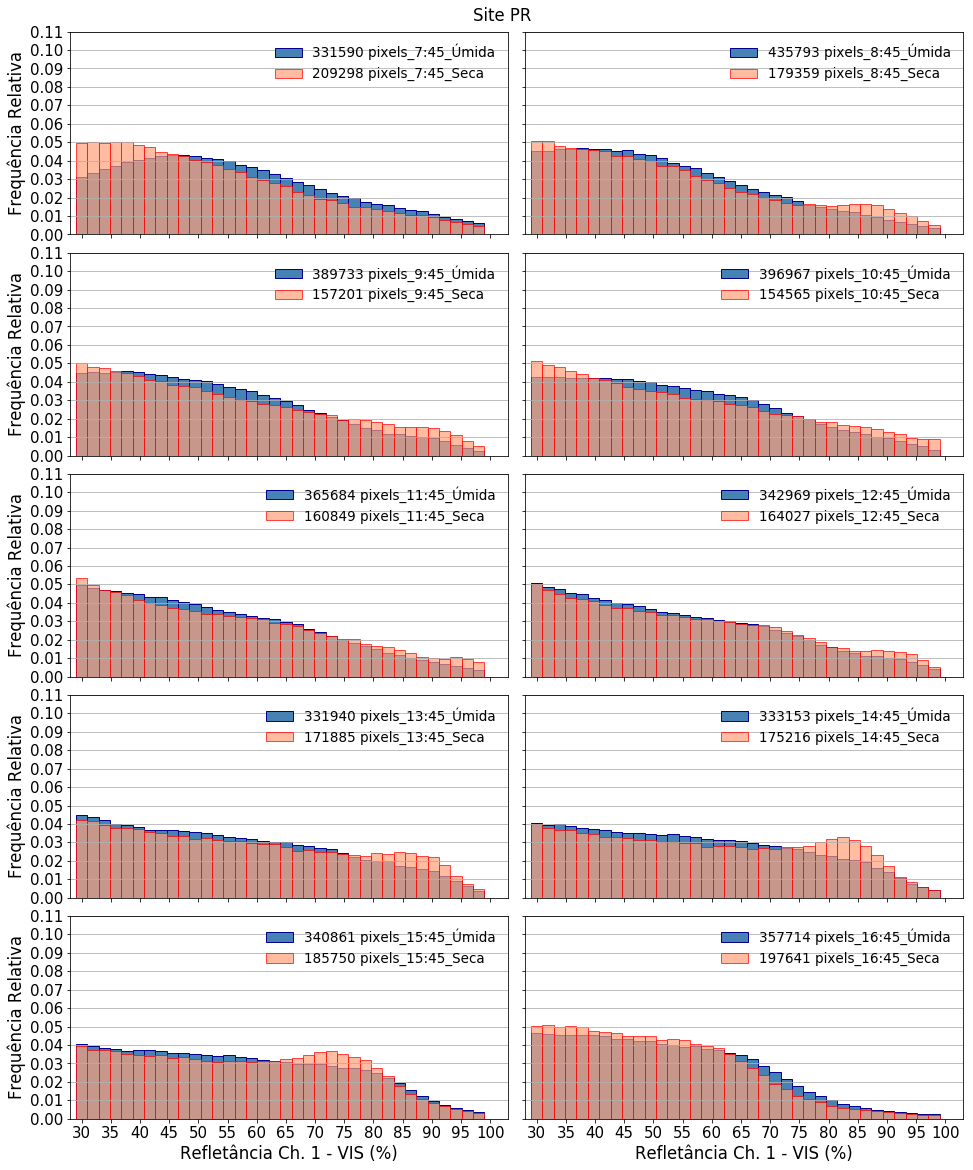

In [33]:
###################################### Hists vis Site 1 #######################
numberofbins=37
yl = [0,0.11]
xl = [28,103]
xyl = (xl[0], xl[1], yl[0], yl[1]) 
tam_eixos = 15
divis_eixos = 15
loc_legendas = 1
Y = 16
X = 20

# 7:45....
mymin7_s0_u=min([min(vis_U11_s0_um)])
mymax7_s0_u=max([max(vis_U11_s0_um)])
xbins7_s0_u=np.linspace(mymin7_s0_u, mymax7_s0_u, numberofbins)
mymin7_s0_s=min([min(vis_U11_s0_se)])
mymax7_s0_s=max([max(vis_U11_s0_se)])
xbins7_s0_s=np.linspace(mymin7_s0_s, mymax7_s0_s, numberofbins)
# 8:45....
mymin8_s0_u=min([min(vis_U12_s0_um)])
mymax8_s0_u=max([max(vis_U12_s0_um)])
xbins8_s0_u=np.linspace(mymin8_s0_u, mymax8_s0_u, numberofbins)
mymin8_s0_s=min([min(vis_U12_s0_se)])
mymax8_s0_s=max([max(vis_U12_s0_se)])
xbins8_s0_s=np.linspace(mymin8_s0_s, mymax8_s0_s, numberofbins)
# 9:45....
mymin9_s0_u=min([min(vis_U13_s0_um)])
mymax9_s0_u=max([max(vis_U13_s0_um)])
xbins9_s0_u=np.linspace(mymin9_s0_u, mymax9_s0_u, numberofbins)
mymin9_s0_s=min([min(vis_U13_s0_se)])
mymax9_s0_s=max([max(vis_U13_s0_se)])
xbins9_s0_s=np.linspace(mymin9_s0_s, mymax9_s0_s, numberofbins)
# 10:45....
mymin10_s0_u=min([min(vis_U14_s0_um)])
mymax10_s0_u=max([max(vis_U14_s0_um)])
xbins10_s0_u=np.linspace(mymin10_s0_u, mymax10_s0_u, numberofbins)
mymin10_s0_s=min([min(vis_U14_s0_se)])
mymax10_s0_s=max([max(vis_U14_s0_se)])
xbins10_s0_s=np.linspace(mymin10_s0_s, mymax10_s0_s, numberofbins)
# 11:45....
mymin11_s0_u=min([min(vis_U15_s0_um)])
mymax11_s0_u=max([max(vis_U15_s0_um)])
xbins11_s0_u=np.linspace(mymin11_s0_u, mymax11_s0_u, numberofbins)
mymin11_s0_s=min([min(vis_U15_s0_se)])
mymax11_s0_s=max([max(vis_U15_s0_se)])
xbins11_s0_s=np.linspace(mymin11_s0_s, mymax11_s0_s, numberofbins)
# 12:45....
mymin12_s0_u=min([min(vis_U16_s0_um)])
mymax12_s0_u=max([max(vis_U16_s0_um)])
xbins12_s0_u=np.linspace(mymin12_s0_u, mymax12_s0_u, numberofbins)
mymin12_s0_s=min([min(vis_U16_s0_se)])
mymax12_s0_s=max([max(vis_U16_s0_se)])
xbins12_s0_s=np.linspace(mymin12_s0_s, mymax12_s0_s, numberofbins)
# 13:45....
mymin13_s0_u=min([min(vis_U17_s0_um)])
mymax13_s0_u=max([max(vis_U17_s0_um)])
xbins13_s0_u=np.linspace(mymin13_s0_u, mymax13_s0_u, numberofbins)
mymin13_s0_s=min([min(vis_U17_s0_se)])
mymax13_s0_s=max([max(vis_U17_s0_se)])
xbins13_s0_s=np.linspace(mymin13_s0_s, mymax13_s0_s, numberofbins)
# 14:45....
mymin14_s0_u=min([min(vis_U18_s0_um)])
mymax14_s0_u=max([max(vis_U18_s0_um)])
xbins14_s0_u=np.linspace(mymin14_s0_u, mymax14_s0_u, numberofbins)
mymin14_s0_s=min([min(vis_U18_s0_se)])
mymax14_s0_s=max([max(vis_U18_s0_se)])
xbins14_s0_s=np.linspace(mymin14_s0_s, mymax14_s0_s, numberofbins)
# 15:45....
mymin15_s0_u=min([min(vis_U19_s0_um)])
mymax15_s0_u=max([max(vis_U19_s0_um)])
xbins15_s0_u=np.linspace(mymin15_s0_u, mymax15_s0_u, numberofbins)
mymin15_s0_s=min([min(vis_U19_s0_se)])
mymax15_s0_s=max([max(vis_U19_s0_se)])
xbins15_s0_s=np.linspace(mymin15_s0_s, mymax15_s0_s, numberofbins)
# 16:45....
mymin16_s0_u=min([min(vis_U20_s0_um)])
mymax16_s0_u=max([max(vis_U20_s0_um)])
xbins16_s0_u=np.linspace(mymin16_s0_u, mymax16_s0_u, numberofbins)
mymin16_s0_s=min([min(vis_U20_s0_se)])
mymax16_s0_s=max([max(vis_U20_s0_se)])
xbins16_s0_s=np.linspace(mymin16_s0_s, mymax16_s0_s, numberofbins)

# Histograma de freq. absoluta para 7:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax7_u = plt.subplot(5, 2, 1)
y7_u, bins7_u, patches7_u = ax7_u.hist(vis_U11_s0_um, bins=xbins7_s0_u, normed=False, alpha=1, cumulative=0)        
y7_u=y7_u/(y7_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax7_s = plt.subplot(5, 2, 1)
y7_s, bins7_s, patches7_s = ax7_s.hist(vis_U11_s0_se, bins=xbins7_s0_s, normed=False, alpha=1, cumulative=0)        
y7_s=y7_s/(y7_s.sum())
plt.clf()
# Histograma de freq. absoluta para 8:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax8_u = plt.subplot(5, 2, 2)
y8_u, bins8_u, patches8_u = ax8_u.hist(vis_U12_s0_um, bins=xbins8_s0_u, normed=False, alpha=1, cumulative=0)        
y8_u=y8_u/(y8_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax8_s = plt.subplot(5, 2, 2)
y8_s, bins8_s, patches8_s = ax8_s.hist(vis_U12_s0_se, bins=xbins8_s0_s, normed=False, alpha=1, cumulative=0)        
y8_s=y8_s/(y8_s.sum())
plt.clf()
# Histograma de freq. absoluta para 9:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax9_u = plt.subplot(5, 2, 3)
y9_u, bins9_u, patches9_u = ax9_u.hist(vis_U13_s0_um, bins=xbins9_s0_u, normed=False, alpha=1, cumulative=0)        
y9_u=y9_u/(y9_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax9_s = plt.subplot(5, 2, 3)
y9_s, bins9_s, patches9_s = ax9_s.hist(vis_U13_s0_se, bins=xbins9_s0_s, normed=False, alpha=1, cumulative=0)        
y9_s=y9_s/(y9_s.sum())
plt.clf()
# Histograma de freq. absoluta para 10:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax10_u = plt.subplot(5, 2, 4)
y10_u, bins10_u, patches10_u = ax10_u.hist(vis_U14_s0_um, bins=xbins10_s0_u, normed=False, alpha=1, cumulative=0)        
y10_u=y10_u/(y10_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax10_s = plt.subplot(5, 2, 4)
y10_s, bins10_s, patches10_s = ax10_s.hist(vis_U14_s0_se, bins=xbins10_s0_s, normed=False, alpha=1, cumulative=0)        
y10_s=y10_s/(y10_s.sum())
plt.clf()
# Histograma de freq. absoluta para 11:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax11_u = plt.subplot(5, 2, 5)
y11_u, bins11_u, patches11_u = ax11_u.hist(vis_U15_s0_um, bins=xbins11_s0_u, normed=False, alpha=1, cumulative=0)        
y11_u=y11_u/(y11_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax11_s = plt.subplot(5, 2, 5)
y11_s, bins11_s, patches11_s = ax11_s.hist(vis_U15_s0_se, bins=xbins11_s0_s, normed=False, alpha=1, cumulative=0)        
y11_s=y11_s/(y11_s.sum())
plt.clf()
# Histograma de freq. absoluta para 12:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax12_u = plt.subplot(5, 2, 6)
y12_u, bins12_u, patches12_u = ax12_u.hist(vis_U16_s0_um, bins=xbins12_s0_u, normed=False, alpha=1, cumulative=0)        
y12_u=y12_u/(y12_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax12_s = plt.subplot(5, 2, 6)
y12_s, bins12_s, patches12_s = ax12_s.hist(vis_U16_s0_se, bins=xbins12_s0_s, normed=False, alpha=1, cumulative=0)        
y12_s=y12_s/(y12_s.sum())
plt.clf()
# Histograma de freq. absoluta para 13:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax13_u = plt.subplot(5, 2, 7)
y13_u, bins13_u, patches13_u = ax13_u.hist(vis_U17_s0_um, bins=xbins13_s0_u, normed=False, alpha=1, cumulative=0)        
y13_u=y13_u/(y13_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax13_s = plt.subplot(5, 2, 7)
y13_s, bins13_s, patches13_s = ax13_s.hist(vis_U17_s0_se, bins=xbins13_s0_s, normed=False, alpha=1, cumulative=0)        
y13_s=y13_s/(y13_s.sum())
plt.clf()
# Histograma de freq. absoluta para 14:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax14_u = plt.subplot(5, 2, 8)
y14_u, bins14_u, patches14_u = ax14_u.hist(vis_U18_s0_um, bins=xbins14_s0_u, normed=False, alpha=1, cumulative=0)        
y14_u=y14_u/(y14_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax14_s = plt.subplot(5, 2, 8)
y14_s, bins14_s, patches14_s = ax14_s.hist(vis_U18_s0_se, bins=xbins14_s0_s, normed=False, alpha=1, cumulative=0)        
y14_s=y14_s/(y14_s.sum())
plt.clf()
# Histograma de freq. absoluta para 15:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax15_u = plt.subplot(5, 2, 9)
y15_u, bins15_u, patches15_u = ax15_u.hist(vis_U19_s0_um, bins=xbins15_s0_u, normed=False, alpha=1, cumulative=0)        
y15_u=y15_u/(y15_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax15_s = plt.subplot(5, 2, 9)
y15_s, bins15_s, patches15_s = ax15_s.hist(vis_U19_s0_se, bins=xbins15_s0_s, normed=False, alpha=1, cumulative=0)        
y15_s=y15_s/(y15_s.sum())
plt.clf()
# Histograma de freq. absoluta para 16:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax16_u = plt.subplot(5, 2, 10)
y16_u, bins16_u, patches16_u = ax16_u.hist(vis_U20_s0_um, bins=xbins16_s0_u, normed=False, alpha=1, cumulative=0)        
y16_u=y16_u/(y16_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax16_s = plt.subplot(5, 2, 10)
y16_s, bins16_s, patches16_s = ax16_s.hist(vis_U20_s0_se, bins=xbins16_s0_s, normed=False, alpha=1, cumulative=0)        
y16_s=y16_s/(y16_s.sum())
plt.clf()

# Colocando o título na figura toda
fig.suptitle('Site '+str(sites[0]), fontsize=tam_eixos+1.5, y='0.897')
fig.subplots_adjust(wspace=0.04, hspace=0.09)

# Histograma de freq. relativa para 7:45....
fig = plt.figure(1, figsize=(Y,X))
ax7_u = plt.subplot(5, 2, 1)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
ax7_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax7_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-4))
plt.bar(bins7_u[:-1], y7_u, bins7_u[1]-bins7_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_7:45_Úmida'.format(len(reff_U11_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins7_s[:-1], y7_s, bins7_s[1]-bins7_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_7:45_Seca'.format(len(reff_U11_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax7_u.grid(True, axis='y')
ax7_u.set_xticklabels([])

# Histograma de freq. relativa para 8:45....
fig = plt.figure(1, figsize=(Y,X))
ax8_u = plt.subplot(5, 2, 2)
plt.axis(xyl)
ax8_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax8_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-4))
plt.bar(bins8_u[:-1], y8_u, bins8_u[1]-bins8_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_8:45_Úmida'.format(len(reff_U12_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins8_s[:-1], y8_s, bins8_s[1]-bins8_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_8:45_Seca'.format(len(reff_U12_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax8_u.grid(True, axis='y')
ax8_u.set_xticklabels([])
ax8_u.set_yticklabels([])

# Histograma de freq. relativa para 9:45....
fig = plt.figure(1, figsize=(Y,X))
ax9_u = plt.subplot(5, 2, 3)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
ax9_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax9_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-4))
plt.bar(bins9_u[:-1], y9_u, bins9_u[1]-bins9_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_9:45_Úmida'.format(len(reff_U13_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins9_s[:-1], y9_s, bins9_s[1]-bins9_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_9:45_Seca'.format(len(reff_U13_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax9_u.grid(True, axis='y')
ax9_u.set_xticklabels([])

# Histograma de freq. relativa para 10:45....
fig = plt.figure(1, figsize=(Y,X))
ax10_u = plt.subplot(5, 2, 4)
plt.axis(xyl)
ax10_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax10_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-4))
plt.bar(bins10_u[:-1], y10_u, bins10_u[1]-bins10_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_10:45_Úmida'.format(len(reff_U14_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins10_s[:-1], y10_s, bins10_s[1]-bins10_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_10:45_Seca'.format(len(reff_U14_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax10_u.grid(True, axis='y')
ax10_u.set_xticklabels([])
ax10_u.set_yticklabels([])

# Histograma de freq. relativa para 11:45....
fig = plt.figure(1, figsize=(Y,X))
ax11_u = plt.subplot(5, 2, 5)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
ax11_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax11_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-4))
plt.bar(bins11_u[:-1], y11_u, bins11_u[1]-bins11_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_11:45_Úmida'.format(len(reff_U15_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins11_s[:-1], y11_s, bins11_s[1]-bins11_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_11:45_Seca'.format(len(reff_U15_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax11_u.grid(True, axis='y')
ax11_u.set_xticklabels([])

# Histograma de freq. relativa para 12:45....
fig = plt.figure(1, figsize=(Y,X))
ax12_u = plt.subplot(5, 2, 6)
plt.axis(xyl)
ax12_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax12_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-4))
plt.bar(bins12_u[:-1], y12_u, bins12_u[1]-bins12_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_12:45_Úmida'.format(len(reff_U16_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins12_s[:-1], y12_s, bins12_s[1]-bins12_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_12:45_Seca'.format(len(reff_U16_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax12_u.grid(True, axis='y')
ax12_u.set_xticklabels([])
ax12_u.set_yticklabels([])

# Histograma de freq. relativa para 13:45....
fig = plt.figure(1, figsize=(Y,X))
ax13_u = plt.subplot(5, 2, 7)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
ax13_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax13_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-4))
plt.bar(bins13_u[:-1], y13_u, bins13_u[1]-bins13_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_13:45_Úmida'.format(len(reff_U17_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins13_s[:-1], y13_s, bins13_s[1]-bins13_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_13:45_Seca'.format(len(reff_U17_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax13_u.grid(True, axis='y')
ax13_u.set_xticklabels([])

# Histograma de freq. relativa para 14:45....
fig = plt.figure(1, figsize=(Y,X))
ax14_u = plt.subplot(5, 2, 8)
plt.axis(xyl)
ax14_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax14_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-4))
plt.bar(bins14_u[:-1], y14_u, bins14_u[1]-bins14_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_14:45_Úmida'.format(len(reff_U18_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins14_s[:-1], y14_s, bins14_s[1]-bins14_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_14:45_Seca'.format(len(reff_U18_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax14_u.grid(True, axis='y')
ax14_u.set_xticklabels([])
ax14_u.set_yticklabels([])

# Histograma de freq. relativa para 15:45....
fig = plt.figure(1, figsize=(Y,X))
ax15_u = plt.subplot(5, 2, 9)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.xticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
plt.xlabel(u'Refletância Ch. 1 - VIS (%)', fontsize=tam_eixos+1.5)
ax15_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax15_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-4))
plt.bar(bins15_u[:-1], y15_u, bins15_u[1]-bins15_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_15:45_Úmida'.format(len(reff_U19_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins15_s[:-1], y15_s, bins15_s[1]-bins15_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_15:45_Seca'.format(len(reff_U19_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax15_u.grid(True, axis='y')

# Histograma de freq. relativa para 16:45....
fig = plt.figure(1, figsize=(Y,X))
ax16_u = plt.subplot(5, 2, 10)
plt.axis(xyl)
plt.xticks(fontsize=tam_eixos)
plt.xlabel(u'Refletância Ch. 1 - VIS (%)', fontsize=tam_eixos+1.5)
ax16_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax16_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-4))
plt.bar(bins16_u[:-1], y16_u, bins16_u[1]-bins16_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_16:45_Úmida'.format(len(reff_U20_s0_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins16_s[:-1], y16_s, bins16_s[1]-bins16_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_16:45_Seca'.format(len(reff_U20_s0_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax16_u.grid(True, axis='y')
ax16_u.set_yticklabels([])

fig.savefig('/home/andre/Desktop/Resultados_3/Plotagens/Hists_vis_'+str(sites[0])+'.png', 
            orientation='landscape', bbox_inches='tight', dpi=100)
# plt.close(fig)

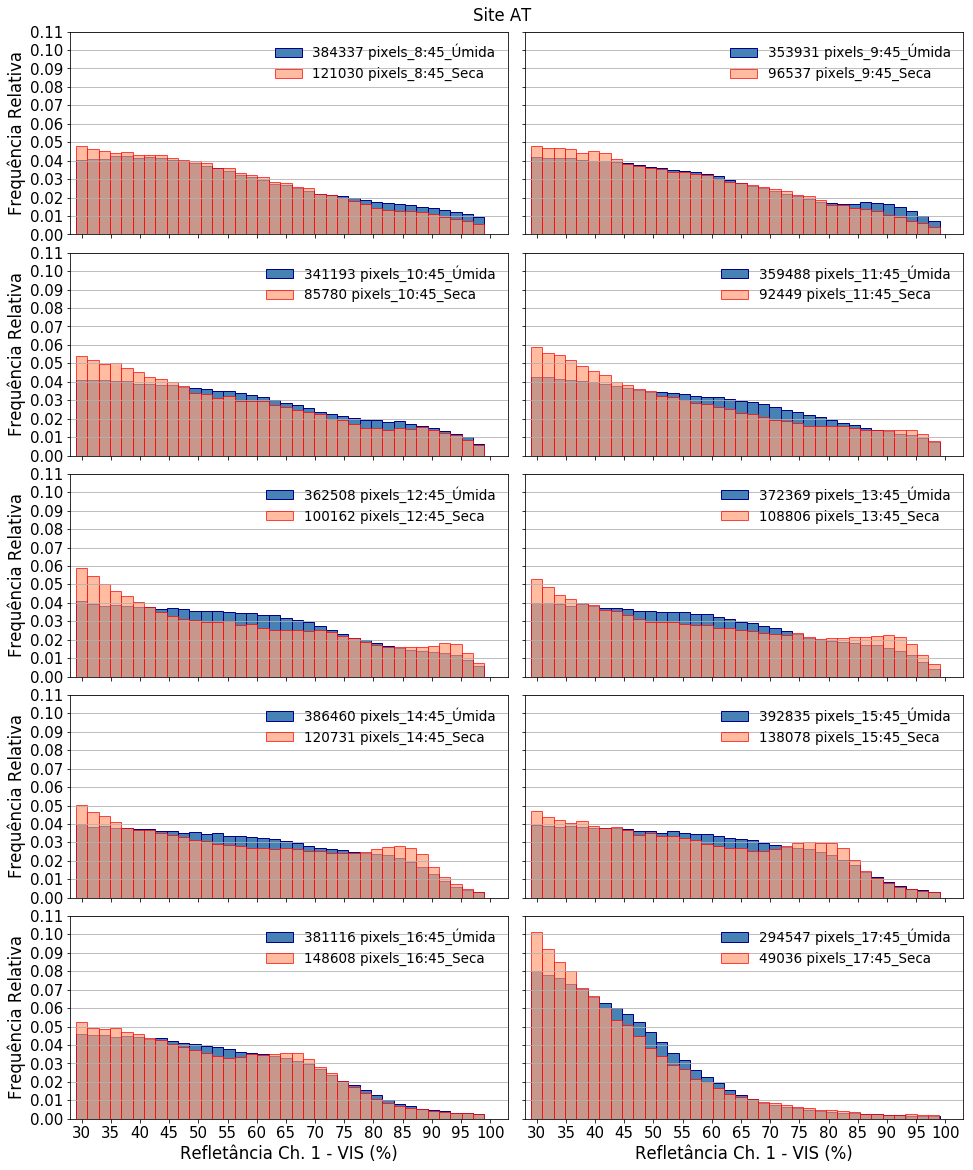

In [34]:
###################################### Hists vis Site 2 #######################
numberofbins=37
yl = [0,0.11]
xl = [28,103]
xyl = (xl[0], xl[1], yl[0], yl[1]) 
tam_eixos = 15
divis_eixos = 15
loc_legendas = 1
Y = 16
X = 20

# 8:45....
mymin7_s1_u=min([min(vis_U11_s1_um)])
mymax7_s1_u=max([max(vis_U11_s1_um)])
xbins7_s1_u=np.linspace(mymin7_s1_u, mymax7_s1_u, numberofbins)
mymin7_s1_s=min([min(vis_U11_s1_se)])
mymax7_s1_s=max([max(vis_U11_s1_se)])
xbins7_s1_s=np.linspace(mymin7_s1_s, mymax7_s1_s, numberofbins)
# 9:45....
mymin8_s1_u=min([min(vis_U12_s1_um)])
mymax8_s1_u=max([max(vis_U12_s1_um)])
xbins8_s1_u=np.linspace(mymin8_s1_u, mymax8_s1_u, numberofbins)
mymin8_s1_s=min([min(vis_U12_s1_se)])
mymax8_s1_s=max([max(vis_U12_s1_se)])
xbins8_s1_s=np.linspace(mymin8_s1_s, mymax8_s1_s, numberofbins)
# 10:45....
mymin9_s1_u=min([min(vis_U13_s1_um)])
mymax9_s1_u=max([max(vis_U13_s1_um)])
xbins9_s1_u=np.linspace(mymin9_s1_u, mymax9_s1_u, numberofbins)
mymin9_s1_s=min([min(vis_U13_s1_se)])
mymax9_s1_s=max([max(vis_U13_s1_se)])
xbins9_s1_s=np.linspace(mymin9_s1_s, mymax9_s1_s, numberofbins)
# 11:45....
mymin10_s1_u=min([min(vis_U14_s1_um)])
mymax10_s1_u=max([max(vis_U14_s1_um)])
xbins10_s1_u=np.linspace(mymin10_s1_u, mymax10_s1_u, numberofbins)
mymin10_s1_s=min([min(vis_U14_s1_se)])
mymax10_s1_s=max([max(vis_U14_s1_se)])
xbins10_s1_s=np.linspace(mymin10_s1_s, mymax10_s1_s, numberofbins)
# 12:45....
mymin11_s1_u=min([min(vis_U15_s1_um)])
mymax11_s1_u=max([max(vis_U15_s1_um)])
xbins11_s1_u=np.linspace(mymin11_s1_u, mymax11_s1_u, numberofbins)
mymin11_s1_s=min([min(vis_U15_s1_se)])
mymax11_s1_s=max([max(vis_U15_s1_se)])
xbins11_s1_s=np.linspace(mymin11_s1_s, mymax11_s1_s, numberofbins)
# 13:45....
mymin12_s1_u=min([min(vis_U16_s1_um)])
mymax12_s1_u=max([max(vis_U16_s1_um)])
xbins12_s1_u=np.linspace(mymin12_s1_u, mymax12_s1_u, numberofbins)
mymin12_s1_s=min([min(vis_U16_s1_se)])
mymax12_s1_s=max([max(vis_U16_s1_se)])
xbins12_s1_s=np.linspace(mymin12_s1_s, mymax12_s1_s, numberofbins)
# 14:45....
mymin13_s1_u=min([min(vis_U17_s1_um)])
mymax13_s1_u=max([max(vis_U17_s1_um)])
xbins13_s1_u=np.linspace(mymin13_s1_u, mymax13_s1_u, numberofbins)
mymin13_s1_s=min([min(vis_U17_s1_se)])
mymax13_s1_s=max([max(vis_U17_s1_se)])
xbins13_s1_s=np.linspace(mymin13_s1_s, mymax13_s1_s, numberofbins)
# 15:45....
mymin14_s1_u=min([min(vis_U18_s1_um)])
mymax14_s1_u=max([max(vis_U18_s1_um)])
xbins14_s1_u=np.linspace(mymin14_s1_u, mymax14_s1_u, numberofbins)
mymin14_s1_s=min([min(vis_U18_s1_se)])
mymax14_s1_s=max([max(vis_U18_s1_se)])
xbins14_s1_s=np.linspace(mymin14_s1_s, mymax14_s1_s, numberofbins)
# 16:45....
mymin15_s1_u=min([min(vis_U19_s1_um)])
mymax15_s1_u=max([max(vis_U19_s1_um)])
xbins15_s1_u=np.linspace(mymin15_s1_u, mymax15_s1_u, numberofbins)
mymin15_s1_s=min([min(vis_U19_s1_se)])
mymax15_s1_s=max([max(vis_U19_s1_se)])
xbins15_s1_s=np.linspace(mymin15_s1_s, mymax15_s1_s, numberofbins)
# 17:45....
mymin16_s1_u=min([min(vis_U20_s1_um)])
mymax16_s1_u=max([max(vis_U20_s1_um)])
xbins16_s1_u=np.linspace(mymin16_s1_u, mymax16_s1_u, numberofbins)
if len(vis_U20_s1_se) == 0:
    mymin16_s1_s=0
    mymax16_s1_s=0
else:
    mymin16_s1_s=min([min(vis_U20_s1_se)])
    mymax16_s1_s=max([max(vis_U20_s1_se)])
xbins16_s1_s=np.linspace(mymin16_s1_s, mymax16_s1_s, numberofbins)

# Histograma de freq. absoluta para 8:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax7_u = plt.subplot(5, 2, 1)
y7_u, bins7_u, patches7_u = ax7_u.hist(vis_U11_s1_um, bins=xbins7_s1_u, normed=False, alpha=1, cumulative=0)        
y7_u=y7_u/(y7_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax7_s = plt.subplot(5, 2, 1)
y7_s, bins7_s, patches7_s = ax7_s.hist(vis_U11_s1_se, bins=xbins7_s1_s, normed=False, alpha=1, cumulative=0)        
y7_s=y7_s/(y7_s.sum())
plt.clf()
# Histograma de freq. absoluta para 9:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax8_u = plt.subplot(5, 2, 2)
y8_u, bins8_u, patches8_u = ax8_u.hist(vis_U12_s1_um, bins=xbins8_s1_u, normed=False, alpha=1, cumulative=0)        
y8_u=y8_u/(y8_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax8_s = plt.subplot(5, 2, 2)
y8_s, bins8_s, patches8_s = ax8_s.hist(vis_U12_s1_se, bins=xbins8_s1_s, normed=False, alpha=1, cumulative=0)        
y8_s=y8_s/(y8_s.sum())
plt.clf()
# Histograma de freq. absoluta para 10:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax9_u = plt.subplot(5, 2, 3)
y9_u, bins9_u, patches9_u = ax9_u.hist(vis_U13_s1_um, bins=xbins9_s1_u, normed=False, alpha=1, cumulative=0)        
y9_u=y9_u/(y9_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax9_s = plt.subplot(5, 2, 3)
y9_s, bins9_s, patches9_s = ax9_s.hist(vis_U13_s1_se, bins=xbins9_s1_s, normed=False, alpha=1, cumulative=0)        
y9_s=y9_s/(y9_s.sum())
plt.clf()
# Histograma de freq. absoluta para 11:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax10_u = plt.subplot(5, 2, 4)
y10_u, bins10_u, patches10_u = ax10_u.hist(vis_U14_s1_um, bins=xbins10_s1_u, normed=False, alpha=1, cumulative=0)        
y10_u=y10_u/(y10_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax10_s = plt.subplot(5, 2, 4)
y10_s, bins10_s, patches10_s = ax10_s.hist(vis_U14_s1_se, bins=xbins10_s1_s, normed=False, alpha=1, cumulative=0)        
y10_s=y10_s/(y10_s.sum())
plt.clf()
# Histograma de freq. absoluta para 12:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax11_u = plt.subplot(5, 2, 5)
y11_u, bins11_u, patches11_u = ax11_u.hist(vis_U15_s1_um, bins=xbins11_s1_u, normed=False, alpha=1, cumulative=0)        
y11_u=y11_u/(y11_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax11_s = plt.subplot(5, 2, 5)
y11_s, bins11_s, patches11_s = ax11_s.hist(vis_U15_s1_se, bins=xbins11_s1_s, normed=False, alpha=1, cumulative=0)        
y11_s=y11_s/(y11_s.sum())
plt.clf()
# Histograma de freq. absoluta para 13:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax12_u = plt.subplot(5, 2, 6)
y12_u, bins12_u, patches12_u = ax12_u.hist(vis_U16_s1_um, bins=xbins12_s1_u, normed=False, alpha=1, cumulative=0)        
y12_u=y12_u/(y12_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax12_s = plt.subplot(5, 2, 6)
y12_s, bins12_s, patches12_s = ax12_s.hist(vis_U16_s1_se, bins=xbins12_s1_s, normed=False, alpha=1, cumulative=0)        
y12_s=y12_s/(y12_s.sum())
plt.clf()
# Histograma de freq. absoluta para 14:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax13_u = plt.subplot(5, 2, 7)
y13_u, bins13_u, patches13_u = ax13_u.hist(vis_U17_s1_um, bins=xbins13_s1_u, normed=False, alpha=1, cumulative=0)        
y13_u=y13_u/(y13_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax13_s = plt.subplot(5, 2, 7)
y13_s, bins13_s, patches13_s = ax13_s.hist(vis_U17_s1_se, bins=xbins13_s1_s, normed=False, alpha=1, cumulative=0)        
y13_s=y13_s/(y13_s.sum())
plt.clf()
# Histograma de freq. absoluta para 15:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax14_u = plt.subplot(5, 2, 8)
y14_u, bins14_u, patches14_u = ax14_u.hist(vis_U18_s1_um, bins=xbins14_s1_u, normed=False, alpha=1, cumulative=0)        
y14_u=y14_u/(y14_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax14_s = plt.subplot(5, 2, 8)
y14_s, bins14_s, patches14_s = ax14_s.hist(vis_U18_s1_se, bins=xbins14_s1_s, normed=False, alpha=1, cumulative=0)        
y14_s=y14_s/(y14_s.sum())
plt.clf()
# Histograma de freq. absoluta para 16:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax15_u = plt.subplot(5, 2, 9)
y15_u, bins15_u, patches15_u = ax15_u.hist(vis_U19_s1_um, bins=xbins15_s1_u, normed=False, alpha=1, cumulative=0)        
y15_u=y15_u/(y15_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax15_s = plt.subplot(5, 2, 9)
y15_s, bins15_s, patches15_s = ax15_s.hist(vis_U19_s1_se, bins=xbins15_s1_s, normed=False, alpha=1, cumulative=0)        
y15_s=y15_s/(y15_s.sum())
plt.clf()
# Histograma de freq. absoluta para 17:45....
# Umida
fig = plt.figure(1, figsize=(Y,X))
ax16_u = plt.subplot(5, 2, 10)
y16_u, bins16_u, patches16_u = ax16_u.hist(vis_U20_s1_um, bins=xbins16_s1_u, normed=False, alpha=1, cumulative=0)        
y16_u=y16_u/(y16_u.sum())
plt.clf()
# Seca
fig = plt.figure(1, figsize=(Y,X))
ax16_s = plt.subplot(5, 2, 10)
y16_s, bins16_s, patches16_s = ax16_s.hist(vis_U20_s1_se, bins=xbins16_s1_s, normed=False, alpha=1, cumulative=0)        
y16_s=y16_s/(y16_s.sum())
plt.clf()

# Colocando o título na figura toda
fig.suptitle('Site '+str(sites[1]), fontsize=tam_eixos+1.5, y='0.897')
fig.subplots_adjust(wspace=0.04, hspace=0.09)

# Histograma de freq. relativa para 8:45....
fig = plt.figure(1, figsize=(Y,X))
ax7_u = plt.subplot(5, 2, 1)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
ax7_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax7_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-4))
plt.bar(bins7_u[:-1], y7_u, bins7_u[1]-bins7_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_8:45_Úmida'.format(len(temp_U11_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins7_s[:-1], y7_s, bins7_s[1]-bins7_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_8:45_Seca'.format(len(temp_U11_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax7_u.grid(True, axis='y')
ax7_u.set_xticklabels([])

# Histograma de freq. relativa para 9:45....
fig = plt.figure(1, figsize=(Y,X))
ax8_u = plt.subplot(5, 2, 2)
plt.axis(xyl)
ax8_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax8_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-4))
plt.bar(bins8_u[:-1], y8_u, bins8_u[1]-bins8_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_9:45_Úmida'.format(len(temp_U12_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins8_s[:-1], y8_s, bins8_s[1]-bins8_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_9:45_Seca'.format(len(temp_U12_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax8_u.grid(True, axis='y')
ax8_u.set_xticklabels([])
ax8_u.set_yticklabels([])

# Histograma de freq. relativa para 10:45....
fig = plt.figure(1, figsize=(Y,X))
ax9_u = plt.subplot(5, 2, 3)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
ax9_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax9_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-4))
plt.bar(bins9_u[:-1], y9_u, bins9_u[1]-bins9_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_10:45_Úmida'.format(len(temp_U13_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins9_s[:-1], y9_s, bins9_s[1]-bins9_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_10:45_Seca'.format(len(temp_U13_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax9_u.grid(True, axis='y')
ax9_u.set_xticklabels([])

# Histograma de freq. relativa para 11:45....
fig = plt.figure(1, figsize=(Y,X))
ax10_u = plt.subplot(5, 2, 4)
plt.axis(xyl)
ax10_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax10_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-4))
plt.bar(bins10_u[:-1], y10_u, bins10_u[1]-bins10_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_11:45_Úmida'.format(len(temp_U14_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins10_s[:-1], y10_s, bins10_s[1]-bins10_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_11:45_Seca'.format(len(temp_U14_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax10_u.grid(True, axis='y')
ax10_u.set_xticklabels([])
ax10_u.set_yticklabels([])

# Histograma de freq. relativa para 12:45....
fig = plt.figure(1, figsize=(Y,X))
ax11_u = plt.subplot(5, 2, 5)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
ax11_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax11_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-4))
plt.bar(bins11_u[:-1], y11_u, bins11_u[1]-bins11_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_12:45_Úmida'.format(len(temp_U15_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins11_s[:-1], y11_s, bins11_s[1]-bins11_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_12:45_Seca'.format(len(temp_U15_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax11_u.grid(True, axis='y')
ax11_u.set_xticklabels([])

# Histograma de freq. relativa para 13:45....
fig = plt.figure(1, figsize=(Y,X))
ax12_u = plt.subplot(5, 2, 6)
plt.axis(xyl)
ax12_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax12_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-4))
plt.bar(bins12_u[:-1], y12_u, bins12_u[1]-bins12_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_13:45_Úmida'.format(len(temp_U16_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins12_s[:-1], y12_s, bins12_s[1]-bins12_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_13:45_Seca'.format(len(temp_U16_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax12_u.grid(True, axis='y')
ax12_u.set_xticklabels([])
ax12_u.set_yticklabels([])

# Histograma de freq. relativa para 14:45....
fig = plt.figure(1, figsize=(Y,X))
ax13_u = plt.subplot(5, 2, 7)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
ax13_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax13_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-4))
plt.bar(bins13_u[:-1], y13_u, bins13_u[1]-bins13_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_14:45_Úmida'.format(len(temp_U17_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins13_s[:-1], y13_s, bins13_s[1]-bins13_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_14:45_Seca'.format(len(temp_U17_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax13_u.grid(True, axis='y')
ax13_u.set_xticklabels([])

# Histograma de freq. relativa para 15:45....
fig = plt.figure(1, figsize=(Y,X))
ax14_u = plt.subplot(5, 2, 8)
plt.axis(xyl)
ax14_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax14_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-4))
plt.bar(bins14_u[:-1], y14_u, bins14_u[1]-bins14_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_15:45_Úmida'.format(len(temp_U18_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins14_s[:-1], y14_s, bins14_s[1]-bins14_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_15:45_Seca'.format(len(temp_U18_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax14_u.grid(True, axis='y')
ax14_u.set_xticklabels([])
ax14_u.set_yticklabels([])

# Histograma de freq. relativa para 16:45....
fig = plt.figure(1, figsize=(Y,X))
ax15_u = plt.subplot(5, 2, 9)
plt.axis(xyl)
plt.yticks(fontsize=tam_eixos)
plt.xticks(fontsize=tam_eixos)
plt.ylabel(u'Frequência Relativa', fontsize=tam_eixos+1.5)
plt.xlabel(u'Refletância Ch. 1 - VIS (%)', fontsize=tam_eixos+1.5)
ax15_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax15_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-4))
plt.bar(bins15_u[:-1], y15_u, bins15_u[1]-bins15_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_16:45_Úmida'.format(len(temp_U19_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
plt.bar(bins15_s[:-1], y15_s, bins15_s[1]-bins15_s[0], alpha=0.7, color='lightsalmon', 
        edgecolor='red', label=u'{} pixels_16:45_Seca'.format(len(temp_U19_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax15_u.grid(True, axis='y')

# Histograma de freq. relativa para 17:45....
fig = plt.figure(1, figsize=(Y,X))
ax16_u = plt.subplot(5, 2, 10)
plt.axis(xyl)
plt.xticks(fontsize=tam_eixos)
plt.xlabel(u'Refletância Ch. 1 - VIS (%)', fontsize=tam_eixos+1.5)
ax16_u.xaxis.set_major_locator(plt.MaxNLocator(divis_eixos))
ax16_u.yaxis.set_major_locator(plt.MaxNLocator(divis_eixos-4))
plt.bar(bins16_u[:-1], y16_u, bins16_u[1]-bins16_u[0], alpha=1.0, color='steelblue', 
        edgecolor='darkblue', label=u'{} pixels_17:45_Úmida'.format(len(temp_U20_s1_um)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
if len(vis_U20_s1_se) == 0:
    plt.plot((-90, 30), (0, 0), color='red', linewidth=0.9, 
             label=u'Não há pixels de nuvens às 17:45_Seca')
if len(vis_U20_s1_se) != 0:
    plt.bar(bins16_s[:-1], y16_s, bins16_s[1]-bins16_s[0], alpha=0.7, color='lightsalmon', 
            edgecolor='red', label=u'{} pixels_17:45_Seca'.format(len(temp_U20_s1_se)))
plt.legend(loc=loc_legendas, frameon=False, fontsize=tam_eixos-1.5)
ax16_u.grid(True, axis='y')
ax16_u.set_yticklabels([])

fig.savefig('/home/andre/Desktop/Resultados_3/Plotagens/Hists_vis_'+str(sites[1])+'.png', 
            orientation='landscape', bbox_inches='tight', dpi=100)
# plt.close(fig)